In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Example Data: Simulating financial metrics for analysis
data = {
    'Interest Income %': [4.5, 5.0, 5.5, 6.0],
    'Interest Expense %': [2.0, 2.2, 2.4, 2.5],
    'Net Interest Income Margin (NIM)': [2.5, 2.8, 3.1, 3.5],
    'Credit Loss % (CLR)': [0.5, 0.6, 0.7, 0.8],
    'Risk Adjusted Interest Income (RAII)': [2.0, 2.2, 2.4, 2.7],
    'Non-Interest Revenue % (NIR)': [1.5, 1.7, 1.9, 2.0],
    'Operating Cost % (Opex)': [1.8, 1.9, 2.0, 2.1],
    'Profit Before Tax % (PBT)': [1.2, 1.3, 1.4, 1.6],
    'Tax %': [0.3, 0.4, 0.5, 0.6],
    'Profit After Tax % (PAT) (RoA)': [0.9, 0.9, 0.9, 1.0],
    'Equity Funding %': [50, 55, 60, 65],
    'Return on Equity (RoE)': [10, 12, 14, 15],
    'Hedging Cost': [0.2, 0.25, 0.3, 0.35],
    'Return on Equity (RoE in USD)': [1000, 1200, 1400, 1500],
    'Gross Interest Expense': [20, 22, 24, 25],
    'Liquidity Coverage Ratio (LCR)': [150, 160, 170, 180],
    'Cost-to-Income Ratio': [45, 46, 47, 48],
    'Leverage Ratio': [8.0, 8.5, 9.0, 9.5],
    # External factors
    'GDP Growth %': [2.1, 2.3, 2.4, 2.5],
    'Inflation %': [1.8, 1.9, 2.0, 2.1],
    'Unemployment Rate %': [4.0, 4.1, 4.2, 4.3]
}

In [ ]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Example Calculation Functions
def calculate_net_interest_income_margin(interest_income, interest_expense):
    return interest_income - interest_expense

def calculate_risk_adjusted_interest_income(nim, credit_loss):
    return nim - credit_loss

def calculate_return_on_equity(profit_after_tax, equity_funding):
    return (profit_after_tax / equity_funding) * 100

def calculate_cost_to_income_ratio(operating_cost, non_interest_revenue):
    return (operating_cost / non_interest_revenue) * 100

def calculate_liquidity_ratio(lcr):
    return lcr / 100

# Perform calculations on the DataFrame
df['Calculated NIM'] = df.apply(lambda row: calculate_net_interest_income_margin(row['Interest Income %'], row['Interest Expense %']), axis=1)
df['Calculated RAII'] = df.apply(lambda row: calculate_risk_adjusted_interest_income(row['Net Interest Income Margin (NIM)'], row['Credit Loss % (CLR)']), axis=1)
df['Calculated RoE'] = df.apply(lambda row: calculate_return_on_equity(row['Profit After Tax % (PAT) (RoA)'], row['Equity Funding %']), axis=1)
df['Calculated Cost-to-Income Ratio'] = df.apply(lambda row: calculate_cost_to_income_ratio(row['Operating Cost % (Opex)'], row['Non-Interest Revenue % (NIR)']), axis=1)
df['Liquidity Ratio'] = df['Liquidity Coverage Ratio (LCR)'].apply(calculate_liquidity_ratio)


Updated DataFrame with Calculated Metrics:
   Interest Income %  Interest Expense %  Net Interest Income Margin (NIM)  \
0                4.5                 2.0                               2.5   
1                5.0                 2.2                               2.8   
2                5.5                 2.4                               3.1   
3                6.0                 2.5                               3.5   

   Credit Loss % (CLR)  Risk Adjusted Interest Income (RAII)  \
0                  0.5                                   2.0   
1                  0.6                                   2.2   
2                  0.7                                   2.4   
3                  0.8                                   2.7   

   Non-Interest Revenue % (NIR)  Operating Cost % (Opex)  \
0                           1.5                      1.8   
1                           1.7                      1.9   
2                           1.9                      2.0   
3    

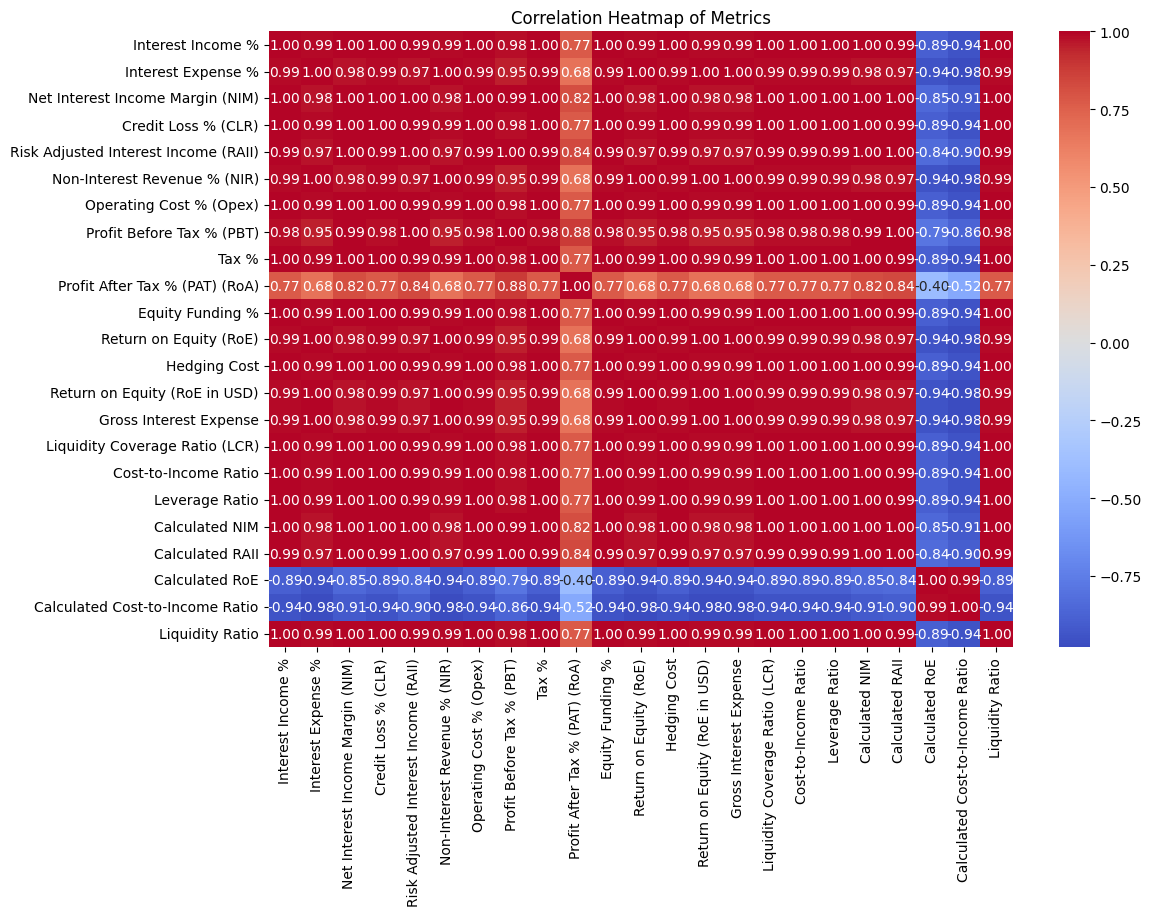

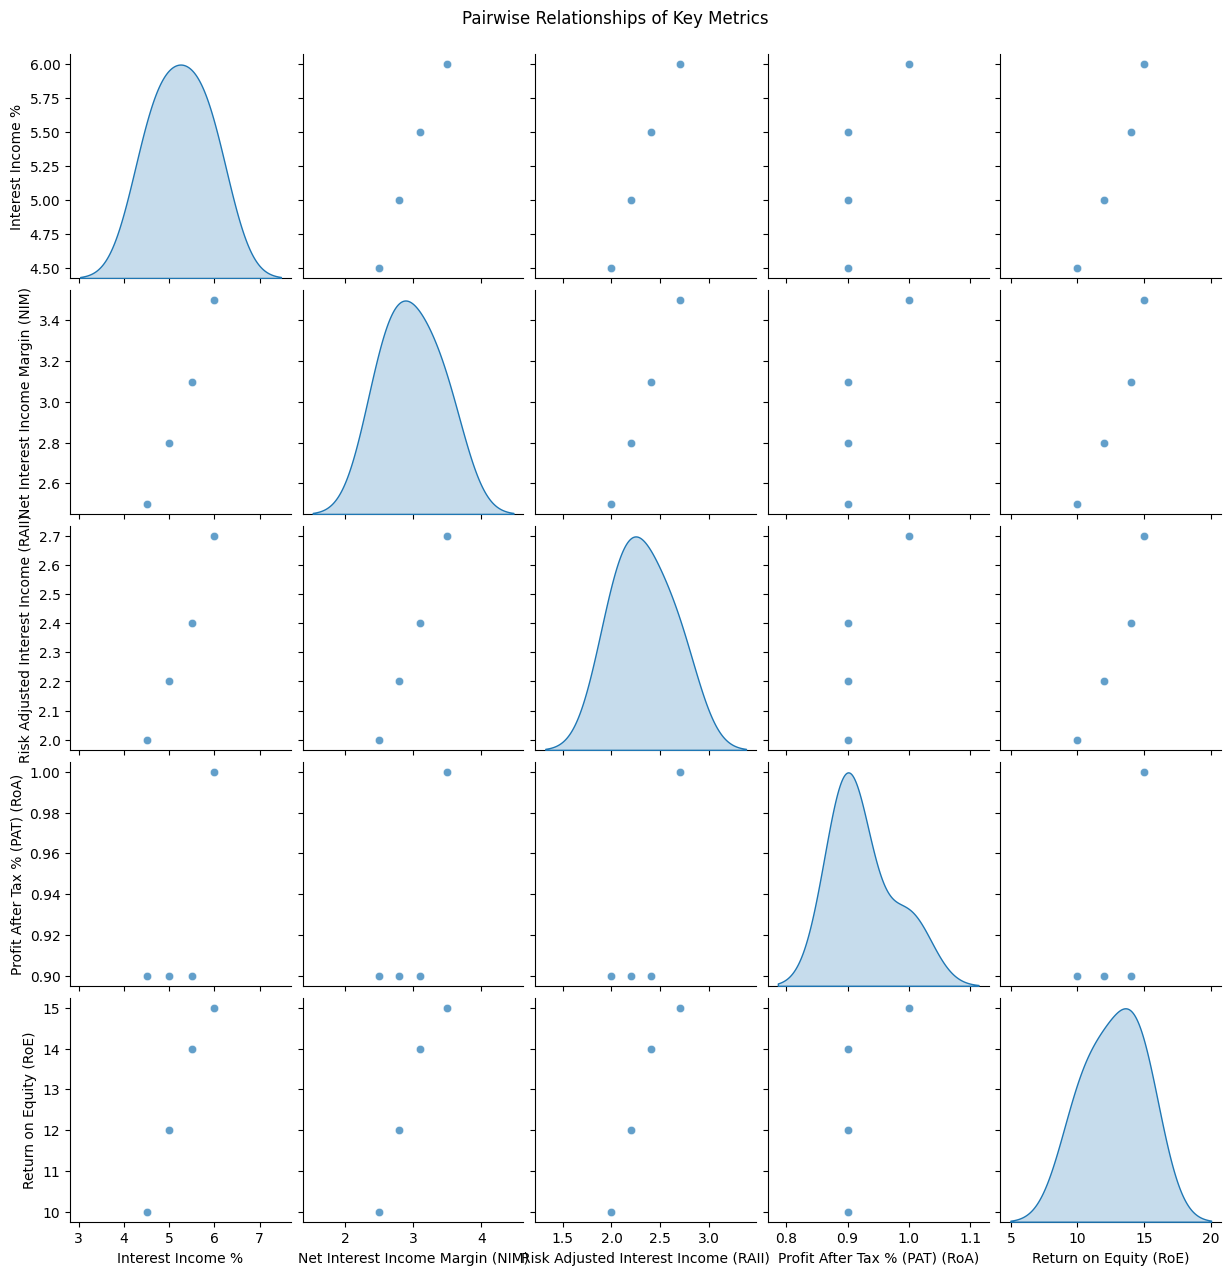

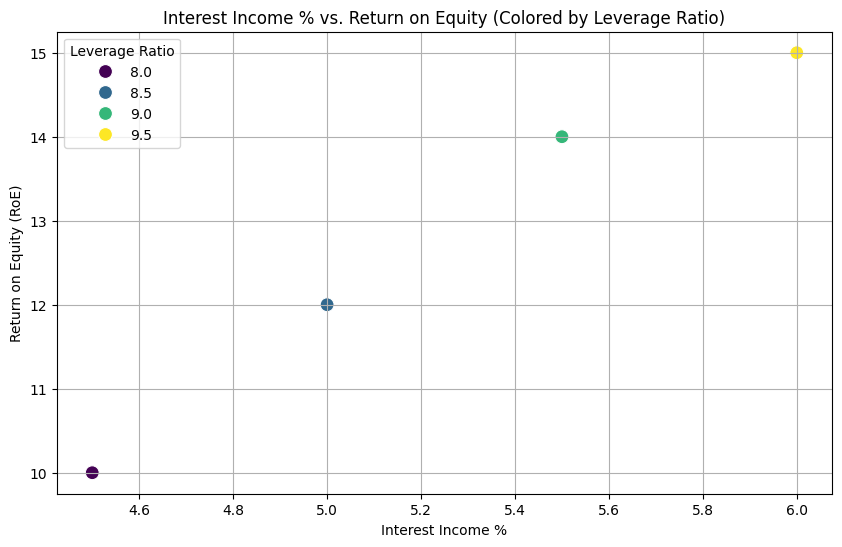

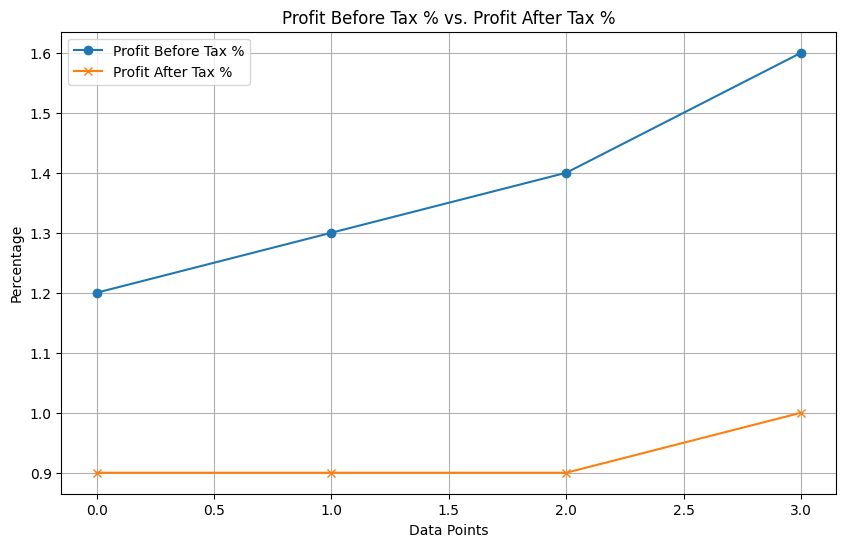

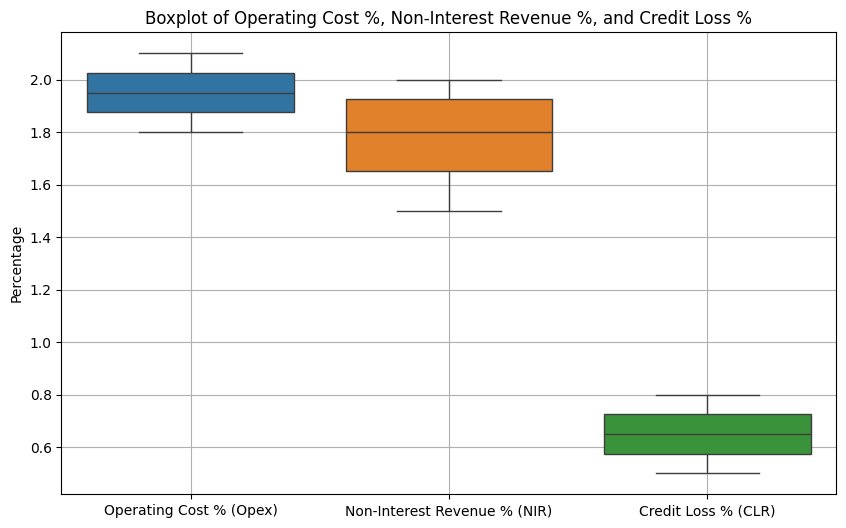

In [ ]:
# Print the updated DataFrame
print("Updated DataFrame with Calculated Metrics:")
print(df)

# Example Analysis: Summarize Key Metrics
print("\nSummary Statistics:")
print(df.describe())

# Visual Analysis
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Metrics')
plt.show()

# Pairplot for selected metrics
selected_columns = ['Interest Income %', 'Net Interest Income Margin (NIM)', 'Risk Adjusted Interest Income (RAII)', 'Profit After Tax % (PAT) (RoA)', 'Return on Equity (RoE)']
sns.pairplot(df[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships of Key Metrics', y=1.02)
plt.show()

# Additional Visualizations
# Scatterplot: Interest Income % vs. Return on Equity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Interest Income %'], y=df['Return on Equity (RoE)'], hue=df['Leverage Ratio'], palette='viridis', s=100)
plt.title('Interest Income % vs. Return on Equity (Colored by Leverage Ratio)')
plt.xlabel('Interest Income %')
plt.ylabel('Return on Equity (RoE)')
plt.grid()
plt.show()

# Line plot: Profit Before Tax % and Profit After Tax %
plt.figure(figsize=(10, 6))
plt.plot(df['Profit Before Tax % (PBT)'], label='Profit Before Tax %', marker='o')
plt.plot(df['Profit After Tax % (PAT) (RoA)'], label='Profit After Tax %', marker='x')
plt.title('Profit Before Tax % vs. Profit After Tax %')
plt.xlabel('Data Points')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.show()

# Boxplot: Operating Cost % across different metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Operating Cost % (Opex)', 'Non-Interest Revenue % (NIR)', 'Credit Loss % (CLR)']])
plt.title('Boxplot of Operating Cost %, Non-Interest Revenue %, and Credit Loss %')
plt.ylabel('Percentage')
plt.grid()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/plots/'

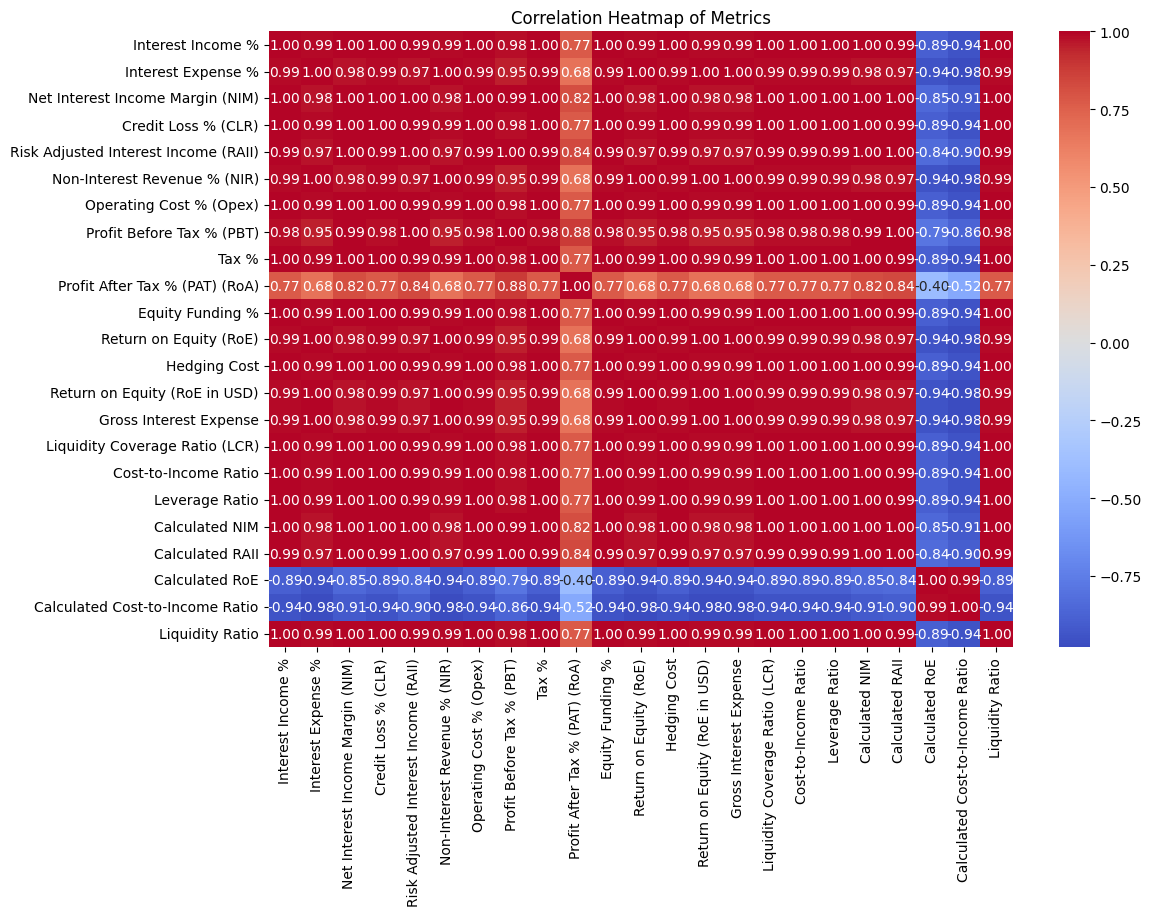

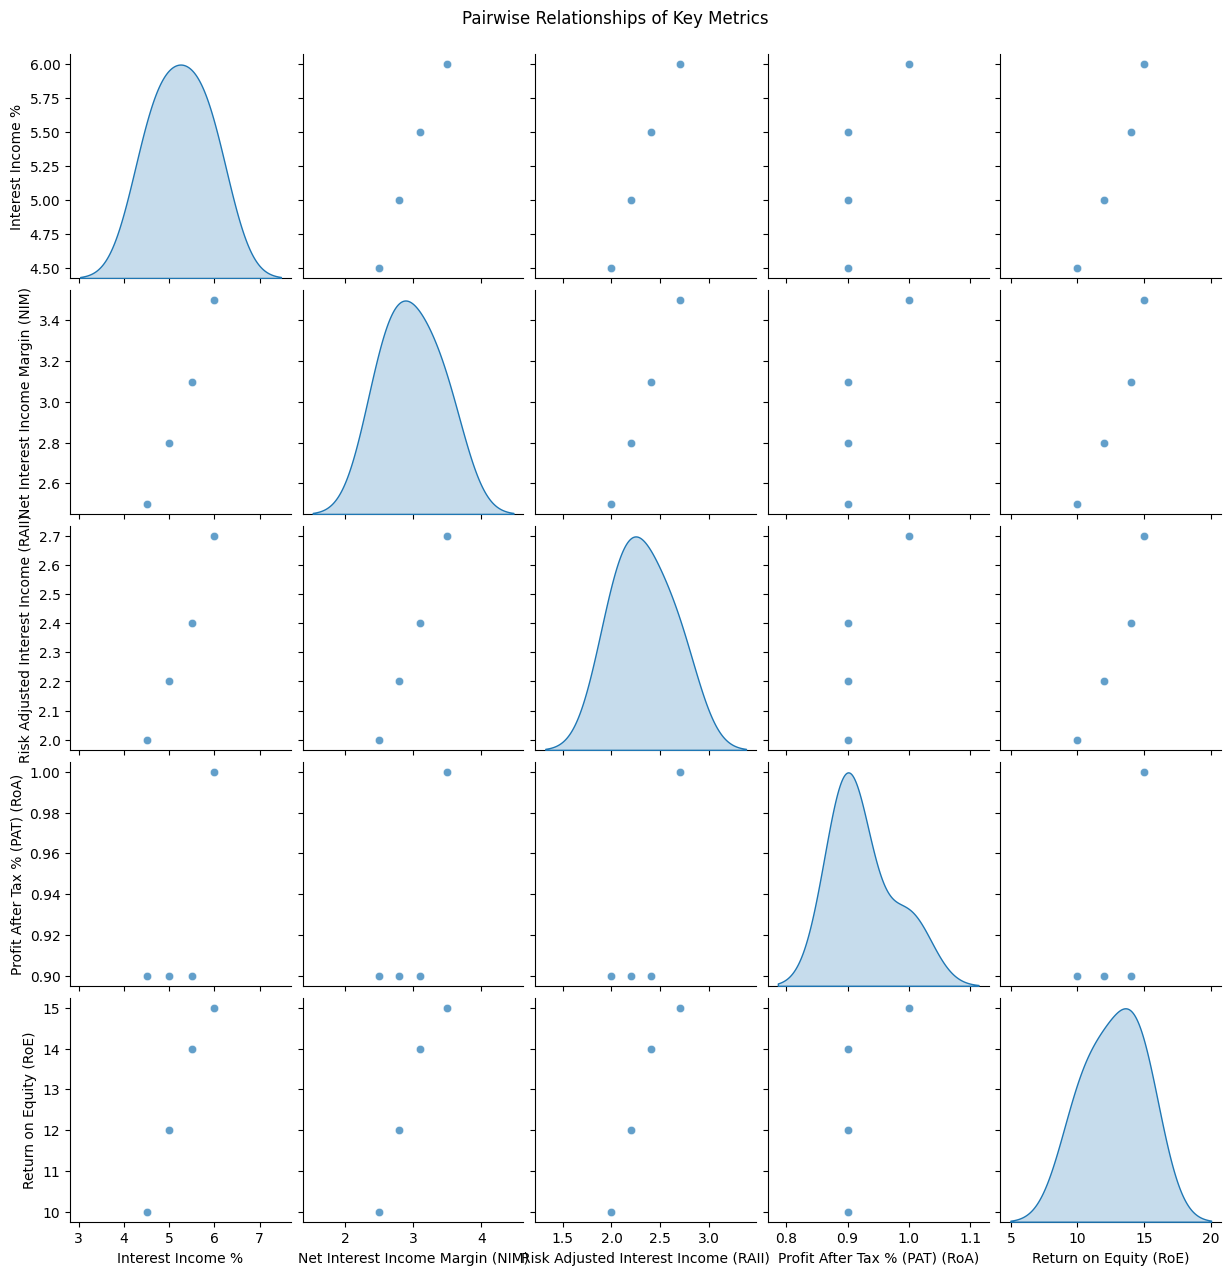

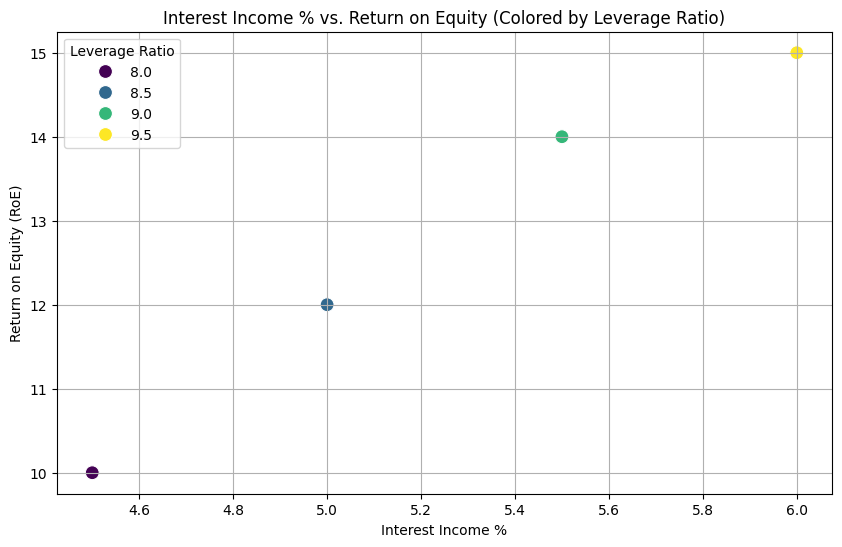

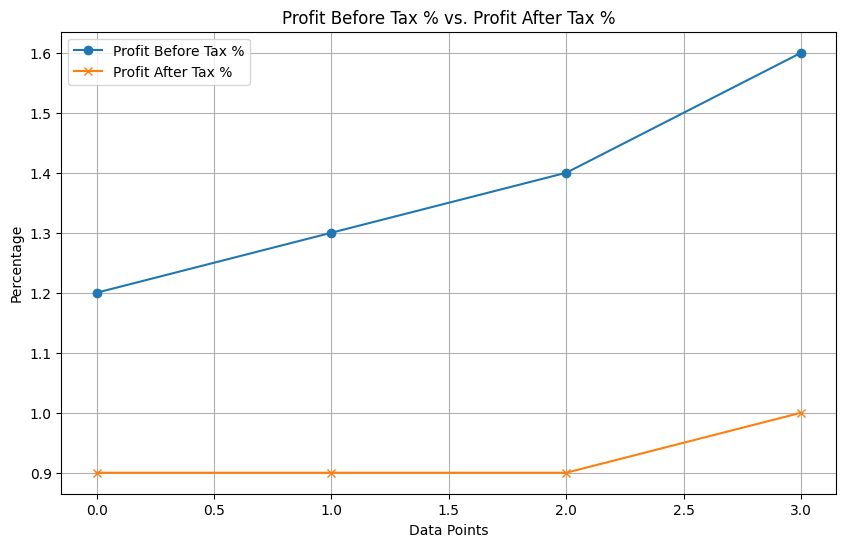

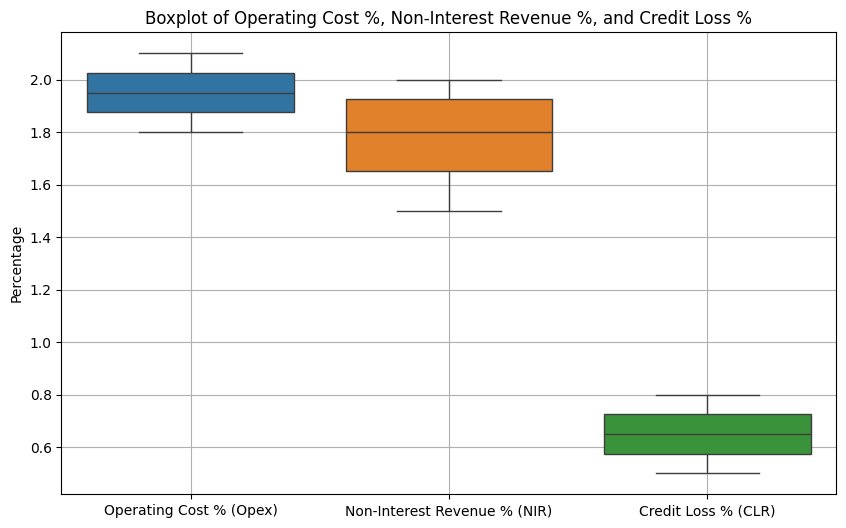

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ... (other code, including data loading and calculations) ...

# Define the save path
save_path = '/content/drive/MyDrive/Colab Notebooks/plots/'
os.makedirs(save_path, exist_ok=True) # Create the directory if it doesn't exist


# Visual Analysis
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Metrics')
plt.savefig(os.path.join(save_path, 'correlation_heatmap.pdf')) # Save before show
plt.show()

# Pairplot for selected metrics
selected_columns = ['Interest Income %', 'Net Interest Income Margin (NIM)', 'Risk Adjusted Interest Income (RAII)', 'Profit After Tax % (PAT) (RoA)', 'Return on Equity (RoE)']
plot = sns.pairplot(df[selected_columns], diag_kind='kde', plot_kws={'alpha': 0.7})  # Assign the pairplot to a variable
plt.suptitle('Pairwise Relationships of Key Metrics', y=1.02)
plot.savefig(os.path.join(save_path, 'pairplot.pdf'))  # Save the pairplot using the variable
plt.show()


# Additional Visualizations
# Scatterplot: Interest Income % vs. Return on Equity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Interest Income %'], y=df['Return on Equity (RoE)'], hue=df['Leverage Ratio'], palette='viridis', s=100)
plt.title('Interest Income % vs. Return on Equity (Colored by Leverage Ratio)')
plt.xlabel('Interest Income %')
plt.ylabel('Return on Equity (RoE)')
plt.grid()
plt.savefig(os.path.join(save_path, 'scatter_plot.pdf'))  # Save before show
plt.show()

# Line plot: Profit Before Tax % and Profit After Tax %
plt.figure(figsize=(10, 6))
plt.plot(df['Profit Before Tax % (PBT)'], label='Profit Before Tax %', marker='o')
plt.plot(df['Profit After Tax % (PAT) (RoA)'], label='Profit After Tax %', marker='x')
plt.title('Profit Before Tax % vs. Profit After Tax %')
plt.xlabel('Data Points')
plt.ylabel('Percentage')
plt.legend()
plt.grid()
plt.savefig(os.path.join(save_path, 'line_plot.pdf'))  # Save before show
plt.show()

# Boxplot: Operating Cost % across different metrics
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Operating Cost % (Opex)', 'Non-Interest Revenue % (NIR)', 'Credit Loss % (CLR)']])
plt.title('Boxplot of Operating Cost %, Non-Interest Revenue %, and Credit Loss %')
plt.ylabel('Percentage')
plt.grid()
plt.savefig(os.path.join(save_path, 'boxplot.pdf'))  # Save before show
plt.show()

Updated DataFrame with Calculated Metrics:
   Interest Income %  Interest Expense %  Net Interest Income Margin (NIM)  \
0                4.5                 2.0                               2.5   
1                5.0                 2.2                               2.8   
2                5.5                 2.4                               3.1   
3                6.0                 2.5                               3.5   

   Credit Loss % (CLR)  Risk Adjusted Interest Income (RAII)  \
0                  0.5                                   2.0   
1                  0.6                                   2.2   
2                  0.7                                   2.4   
3                  0.8                                   2.7   

   Non-Interest Revenue % (NIR)  Operating Cost % (Opex)  \
0                           1.5                      1.8   
1                           1.7                      1.9   
2                           1.9                      2.0   
3    

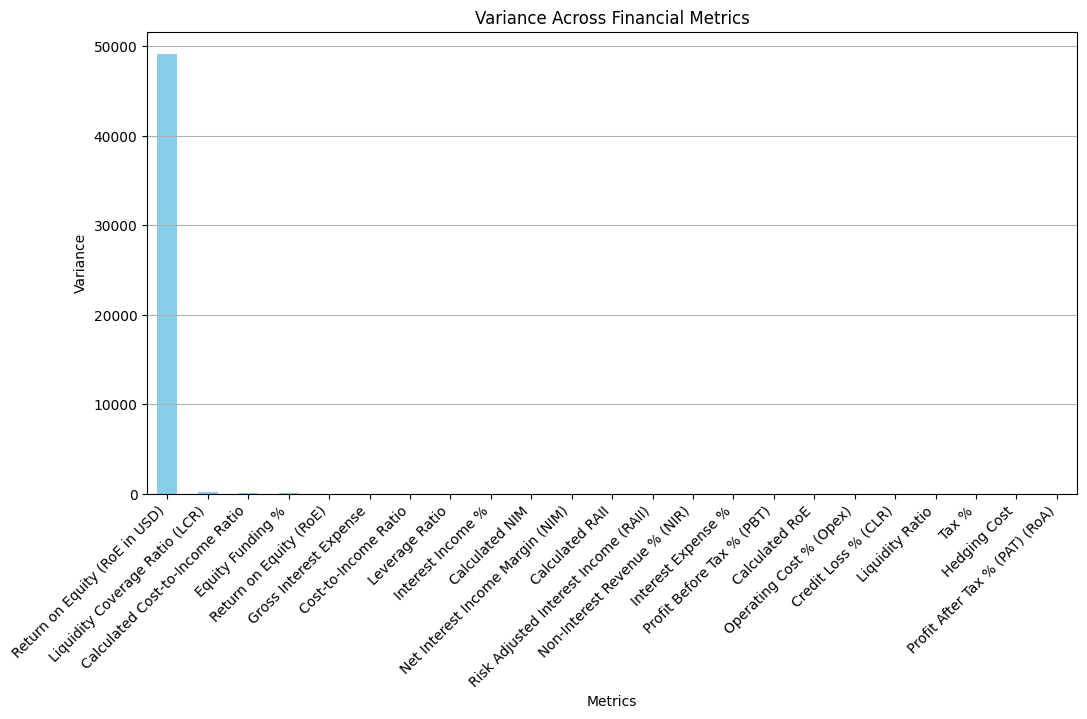


High Variance Metrics (Above Threshold):
Return on Equity (RoE in USD)    49166.666667
dtype: float64


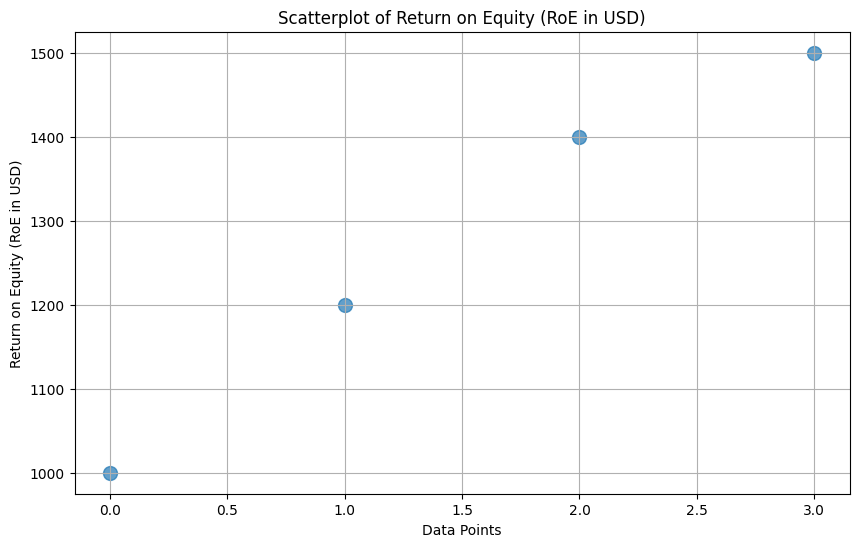

In [ ]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Example Calculation Functions
def calculate_net_interest_income_margin(interest_income, interest_expense):
    return interest_income - interest_expense

def calculate_risk_adjusted_interest_income(nim, credit_loss):
    return nim - credit_loss

def calculate_return_on_equity(profit_after_tax, equity_funding):
    return (profit_after_tax / equity_funding) * 100

def calculate_cost_to_income_ratio(operating_cost, non_interest_revenue):
    return (operating_cost / non_interest_revenue) * 100

def calculate_liquidity_ratio(lcr):
    return lcr / 100

# Perform calculations on the DataFrame
df['Calculated NIM'] = df.apply(lambda row: calculate_net_interest_income_margin(row['Interest Income %'], row['Interest Expense %']), axis=1)
df['Calculated RAII'] = df.apply(lambda row: calculate_risk_adjusted_interest_income(row['Net Interest Income Margin (NIM)'], row['Credit Loss % (CLR)']), axis=1)
df['Calculated RoE'] = df.apply(lambda row: calculate_return_on_equity(row['Profit After Tax % (PAT) (RoA)'], row['Equity Funding %']), axis=1)
df['Calculated Cost-to-Income Ratio'] = df.apply(lambda row: calculate_cost_to_income_ratio(row['Operating Cost % (Opex)'], row['Non-Interest Revenue % (NIR)']), axis=1)
df['Liquidity Ratio'] = df['Liquidity Coverage Ratio (LCR)'].apply(calculate_liquidity_ratio)

# Print the updated DataFrame
print("Updated DataFrame with Calculated Metrics:")
print(df)

# Example Analysis: Summarize Key Metrics
print("\nSummary Statistics:")
print(df.describe())

# Variance Analysis
print("\nVariance Across Metrics:")
metric_variances = df.var()
print(metric_variances)

# Bar Plot for Variance
plt.figure(figsize=(12, 6))
metric_variances.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Variance Across Financial Metrics')
plt.xlabel('Metrics')
plt.ylabel('Variance')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# Highlight High-Variance Metrics
high_variance_threshold = metric_variances.mean()  # Define a threshold as the mean variance
high_variance_metrics = metric_variances[metric_variances > high_variance_threshold]
print("\nHigh Variance Metrics (Above Threshold):")
print(high_variance_metrics)

# Scatterplots for High-Variance Metrics
for metric in high_variance_metrics.index:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(df)), df[metric], alpha=0.7, s=100)
    plt.title(f'Scatterplot of {metric}')
    plt.xlabel('Data Points')
    plt.ylabel(metric)
    plt.grid()
    plt.show()



Correlation Matrix Including External Factors:
                                      Interest Income %  Interest Expense %  \
Interest Income %                              1.000000            0.989778   
Interest Expense %                             0.989778            1.000000   
Net Interest Income Margin (NIM)               0.997257            0.976506   
Credit Loss % (CLR)                            1.000000            0.989778   
Risk Adjusted Interest Income (RAII)           0.994377            0.969109   
Non-Interest Revenue % (NIR)                   0.989778            1.000000   
Operating Cost % (Opex)                        1.000000            0.989778   
Profit Before Tax % (PBT)                      0.982708            0.946256   
Tax %                                          1.000000            0.989778   
Profit After Tax % (PAT) (RoA)                 0.774597            0.676481   
Equity Funding %                               1.000000            0.989778   
Retu

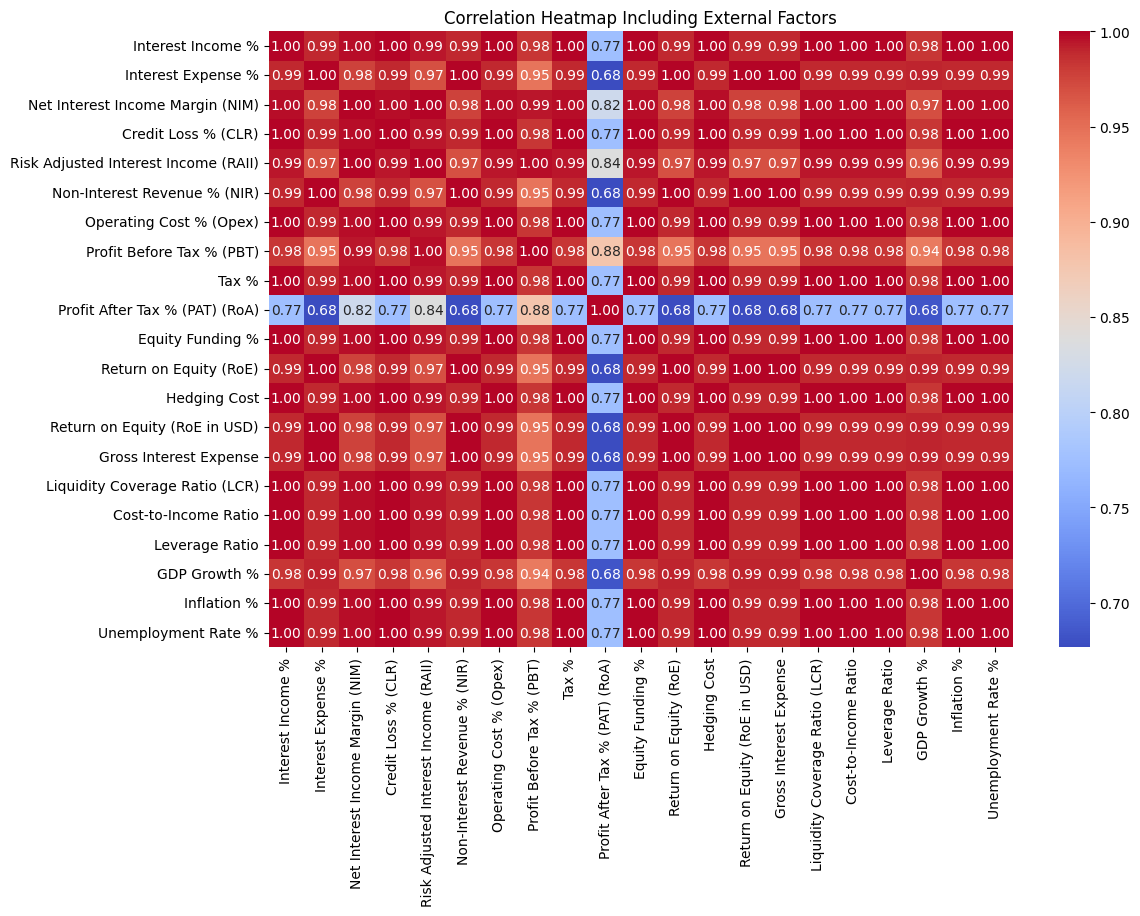

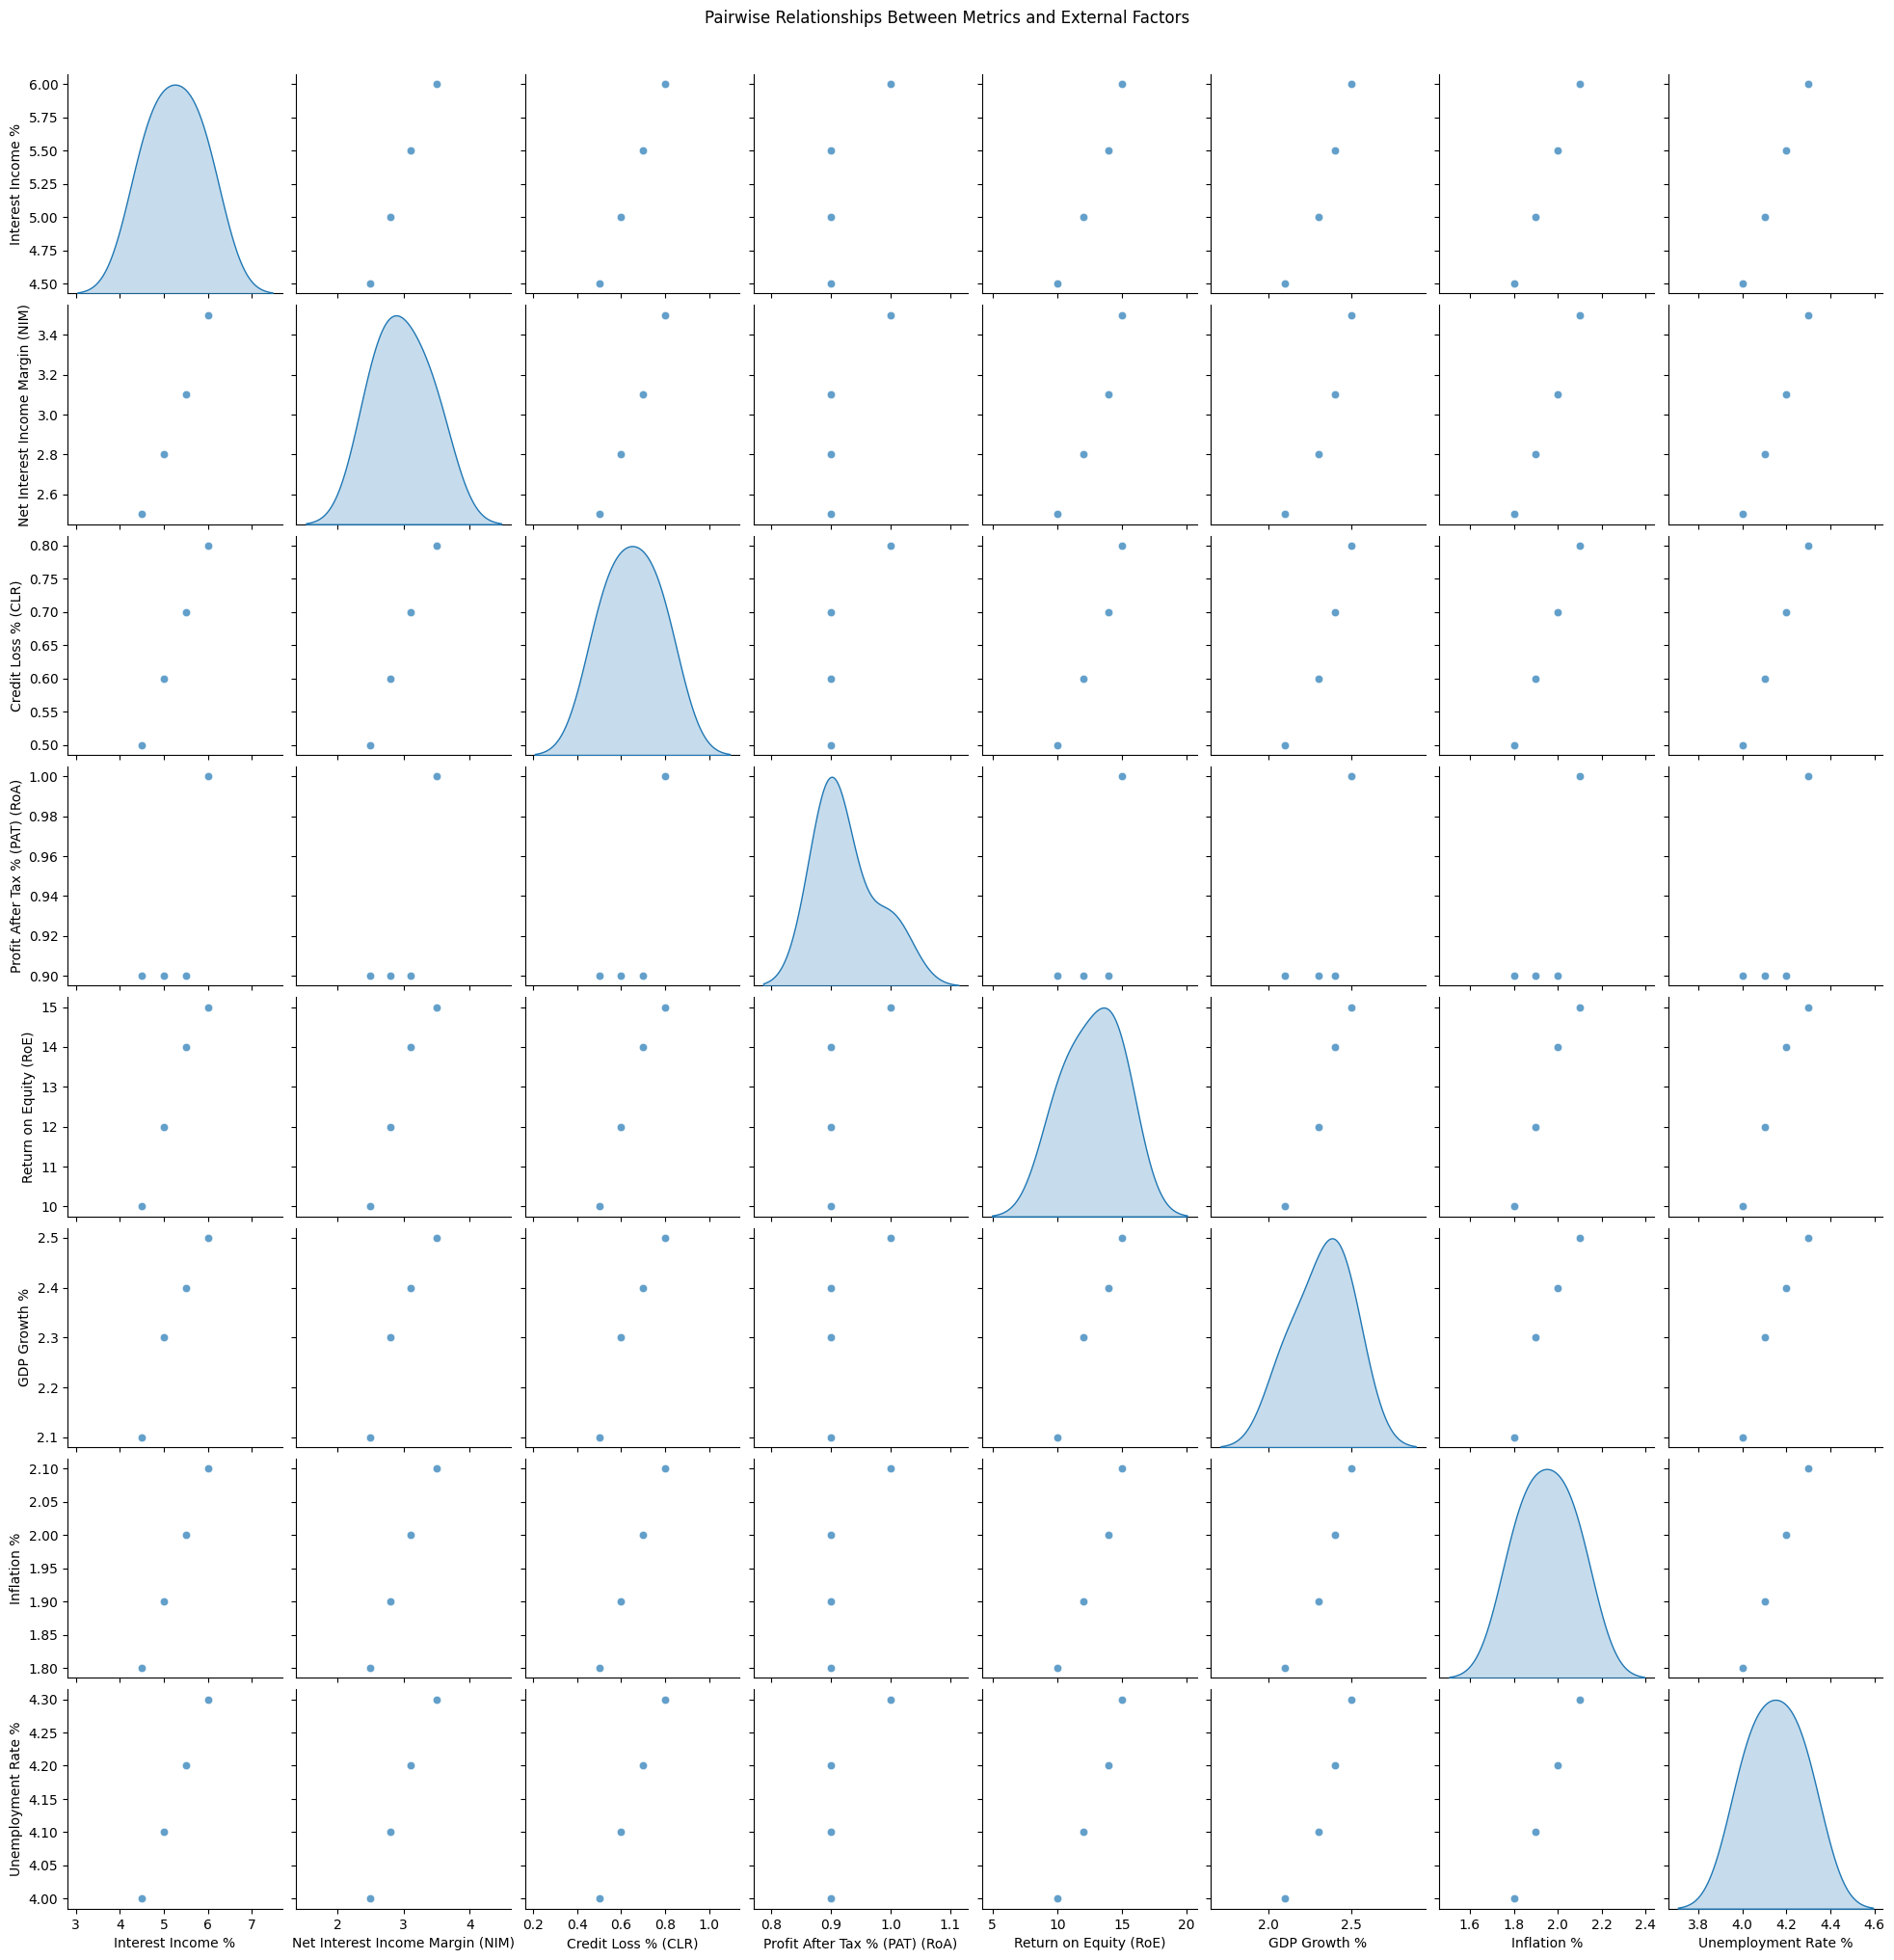

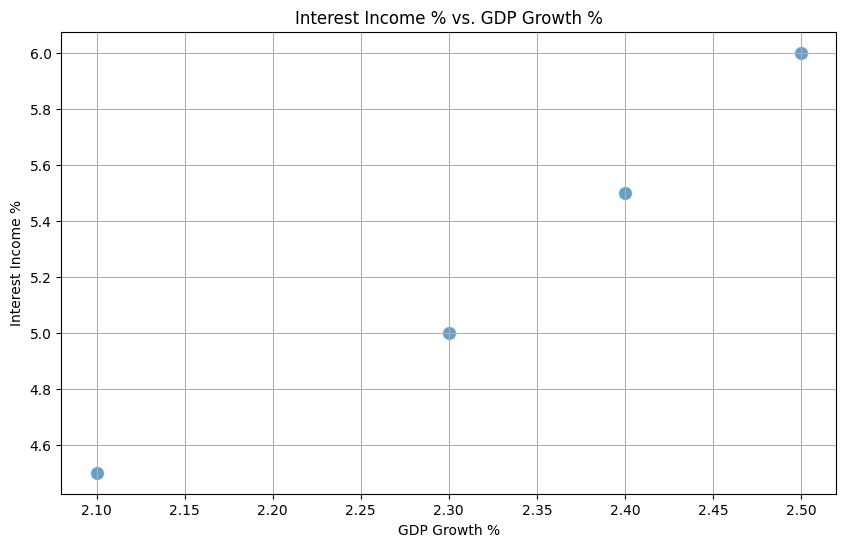

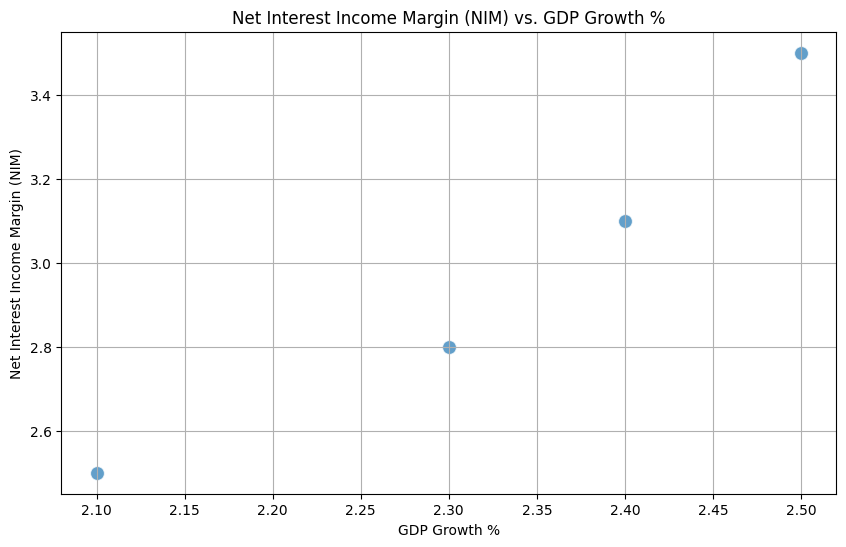

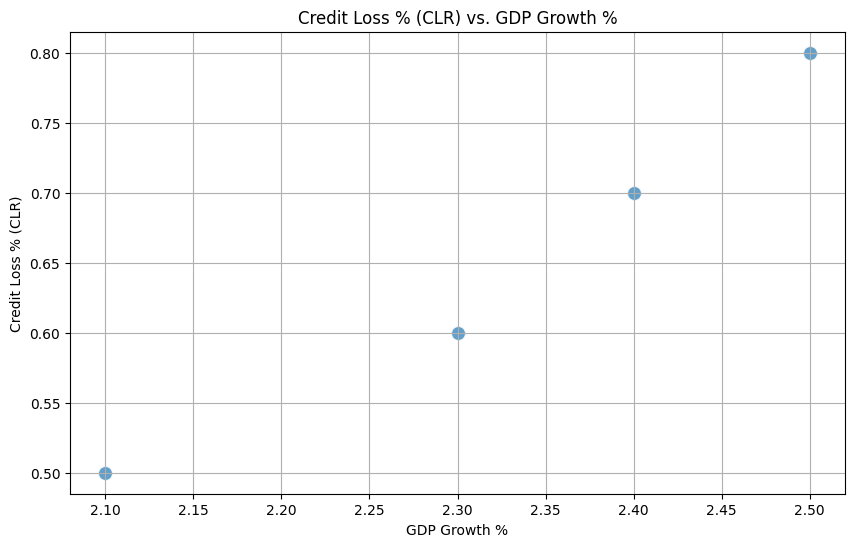

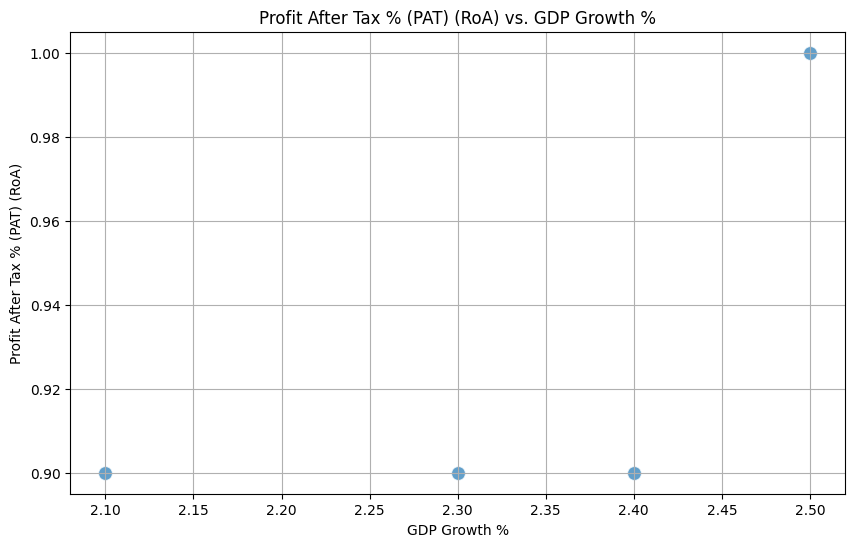

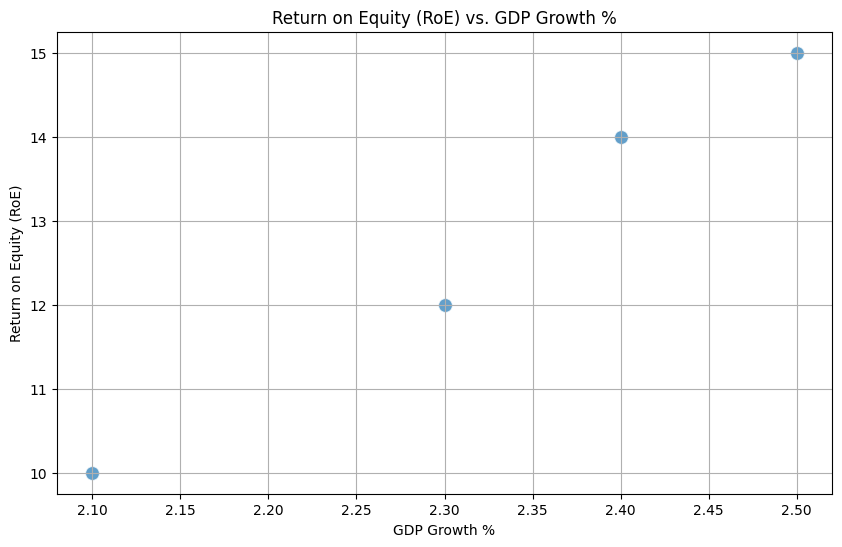

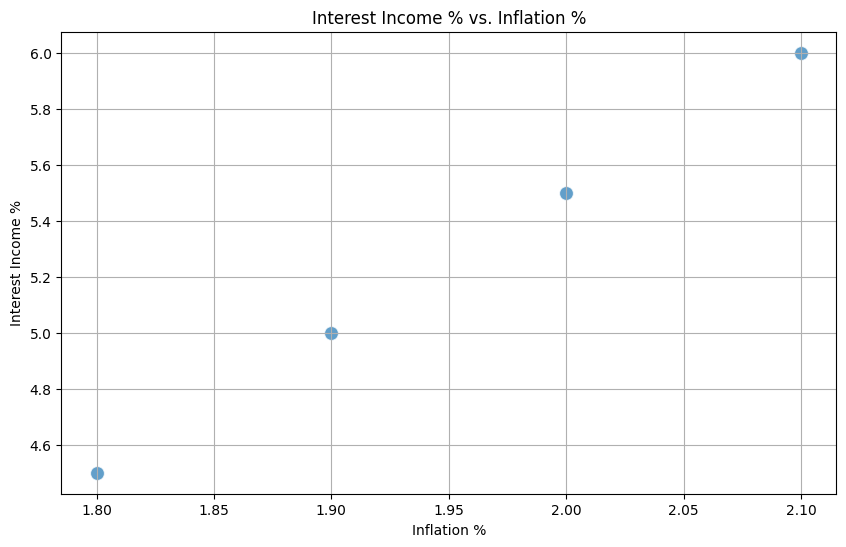

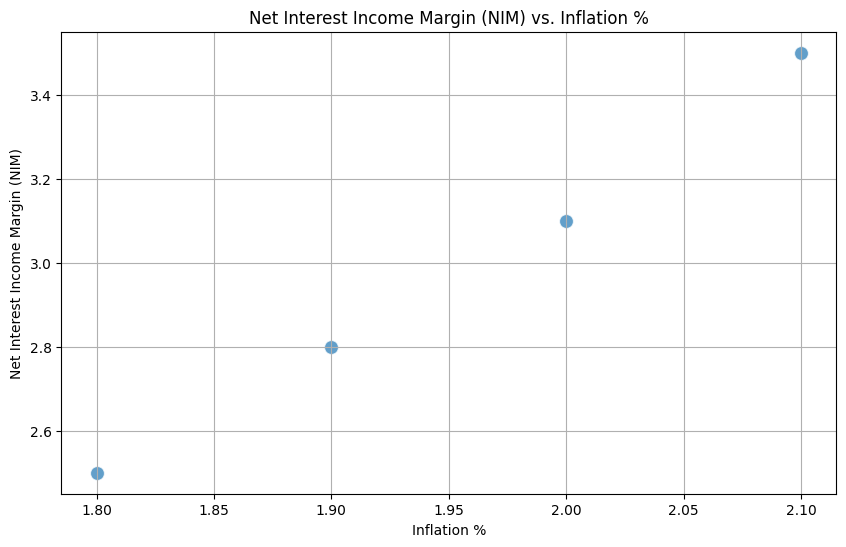

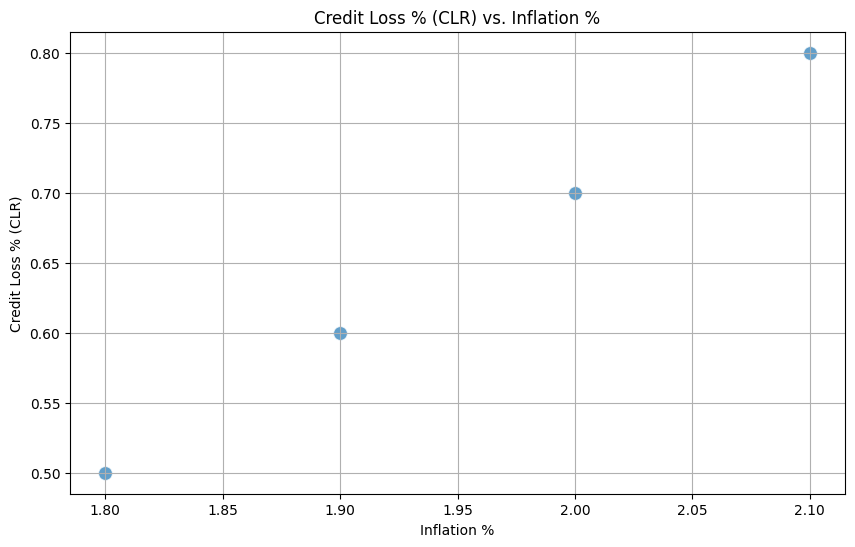

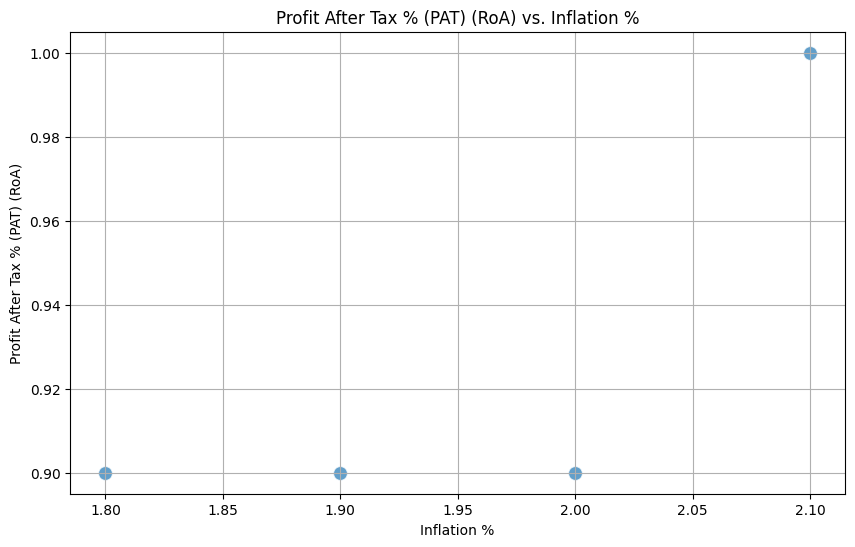

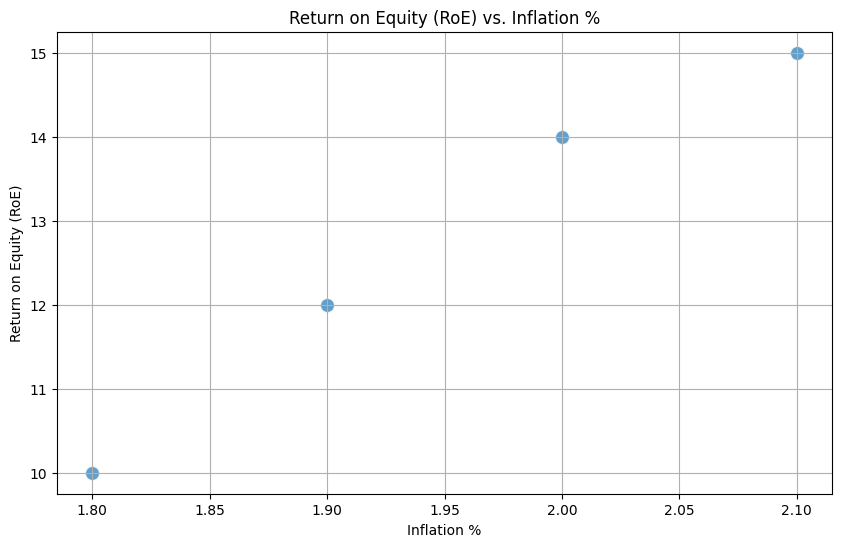

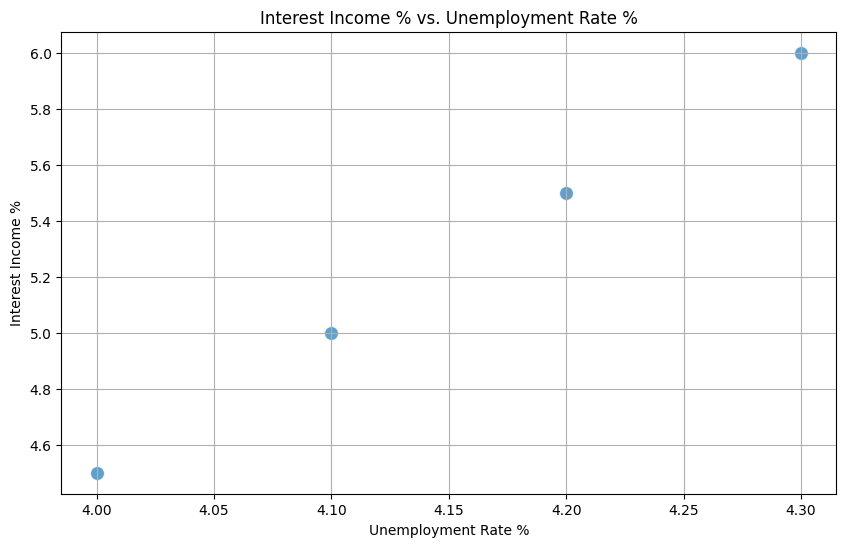

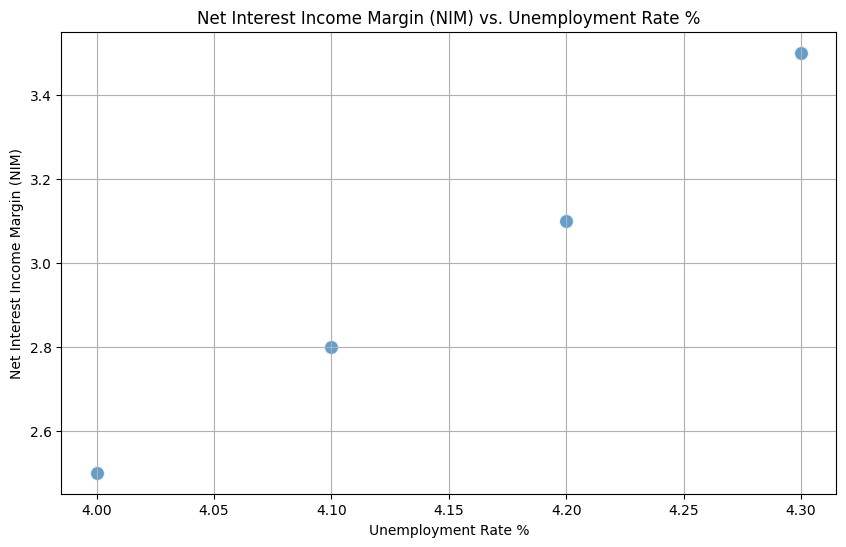

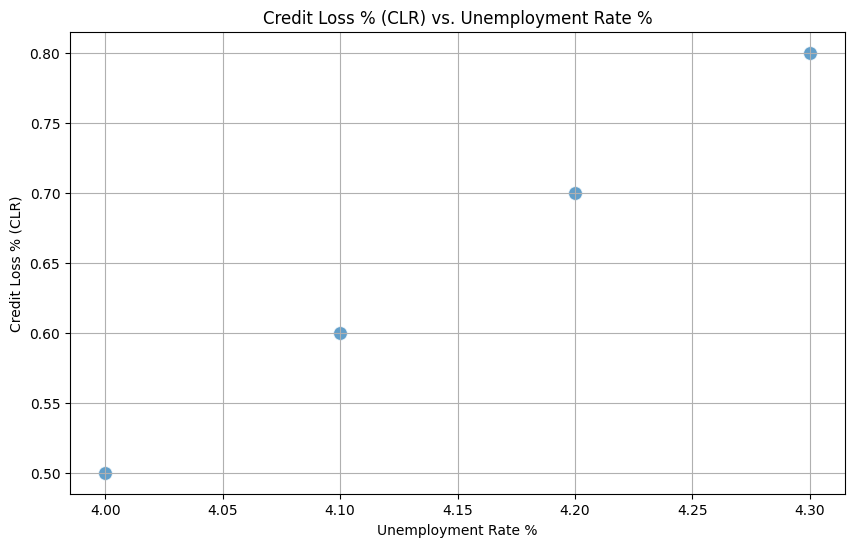

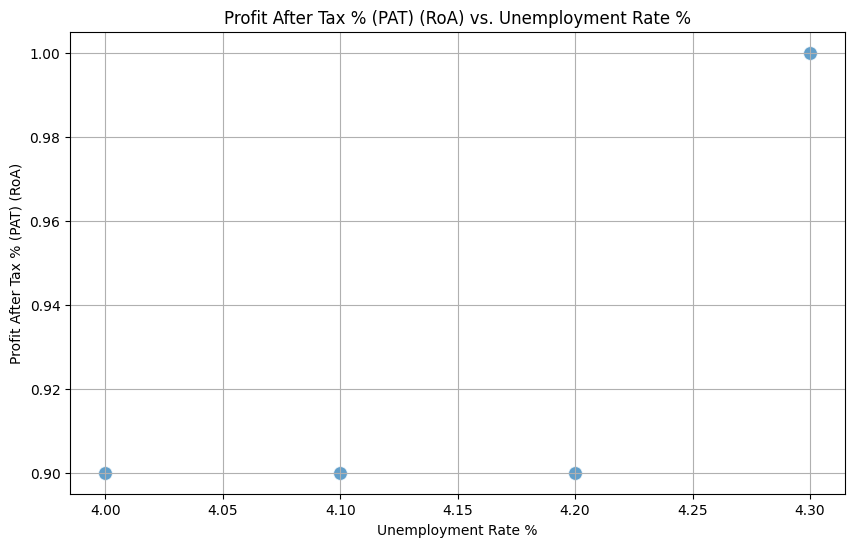

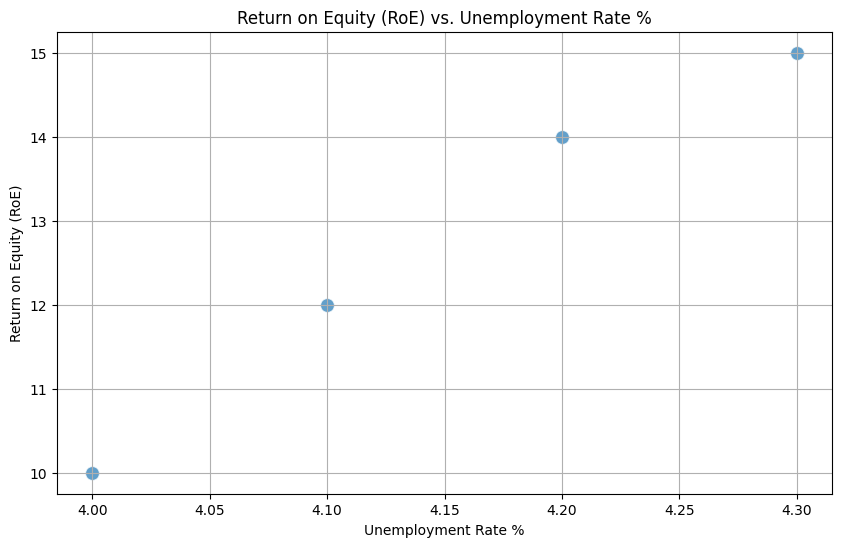

In [ ]:

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Correlation Analysis Including External Factors
print("\nCorrelation Matrix Including External Factors:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap for Correlations with External Factors
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including External Factors')
plt.show()

# Pairplot for Metrics vs. External Factors
external_factors = ['GDP Growth %', 'Inflation %', 'Unemployment Rate %']
metrics = ['Interest Income %', 'Net Interest Income Margin (NIM)', 'Credit Loss % (CLR)',
           'Profit After Tax % (PAT) (RoA)', 'Return on Equity (RoE)']

data_for_pairplot = df[metrics + external_factors]
sns.pairplot(data_for_pairplot, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Metrics and External Factors', y=1.02)
plt.show()

# Scatterplots for Metrics vs. External Factors
for factor in external_factors:
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[factor], y=df[metric], s=100, alpha=0.7)
        plt.title(f'{metric} vs. {factor}')
        plt.xlabel(factor)
        plt.ylabel(metric)
        plt.grid()
        plt.show()


Correlation Matrix Including External Factors:
                                      Interest Income %  Interest Expense %  \
Interest Income %                              1.000000            0.989778   
Interest Expense %                             0.989778            1.000000   
Net Interest Income Margin (NIM)               0.997257            0.976506   
Credit Loss % (CLR)                            1.000000            0.989778   
Risk Adjusted Interest Income (RAII)           0.994377            0.969109   
Non-Interest Revenue % (NIR)                   0.989778            1.000000   
Operating Cost % (Opex)                        1.000000            0.989778   
Profit Before Tax % (PBT)                      0.982708            0.946256   
Tax %                                          1.000000            0.989778   
Profit After Tax % (PAT) (RoA)                 0.774597            0.676481   
Equity Funding %                               1.000000            0.989778   
Retu

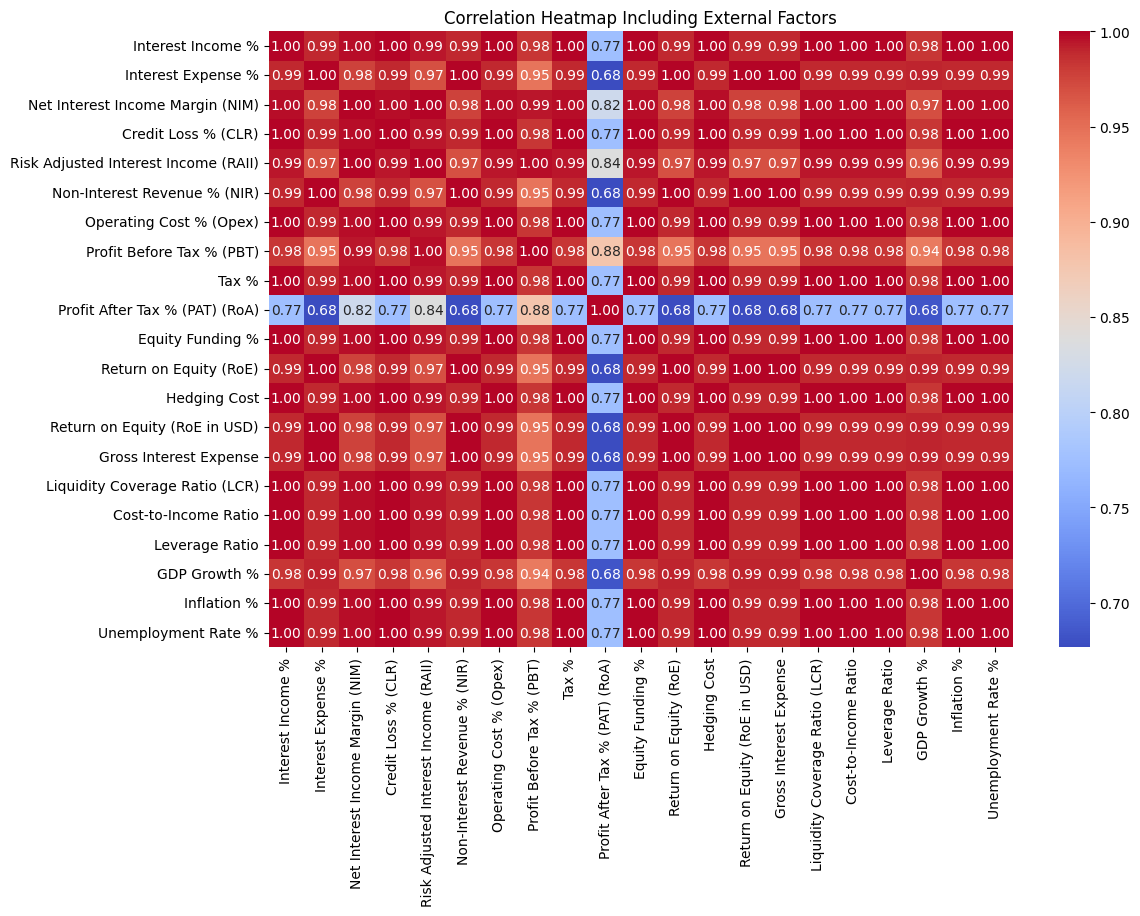

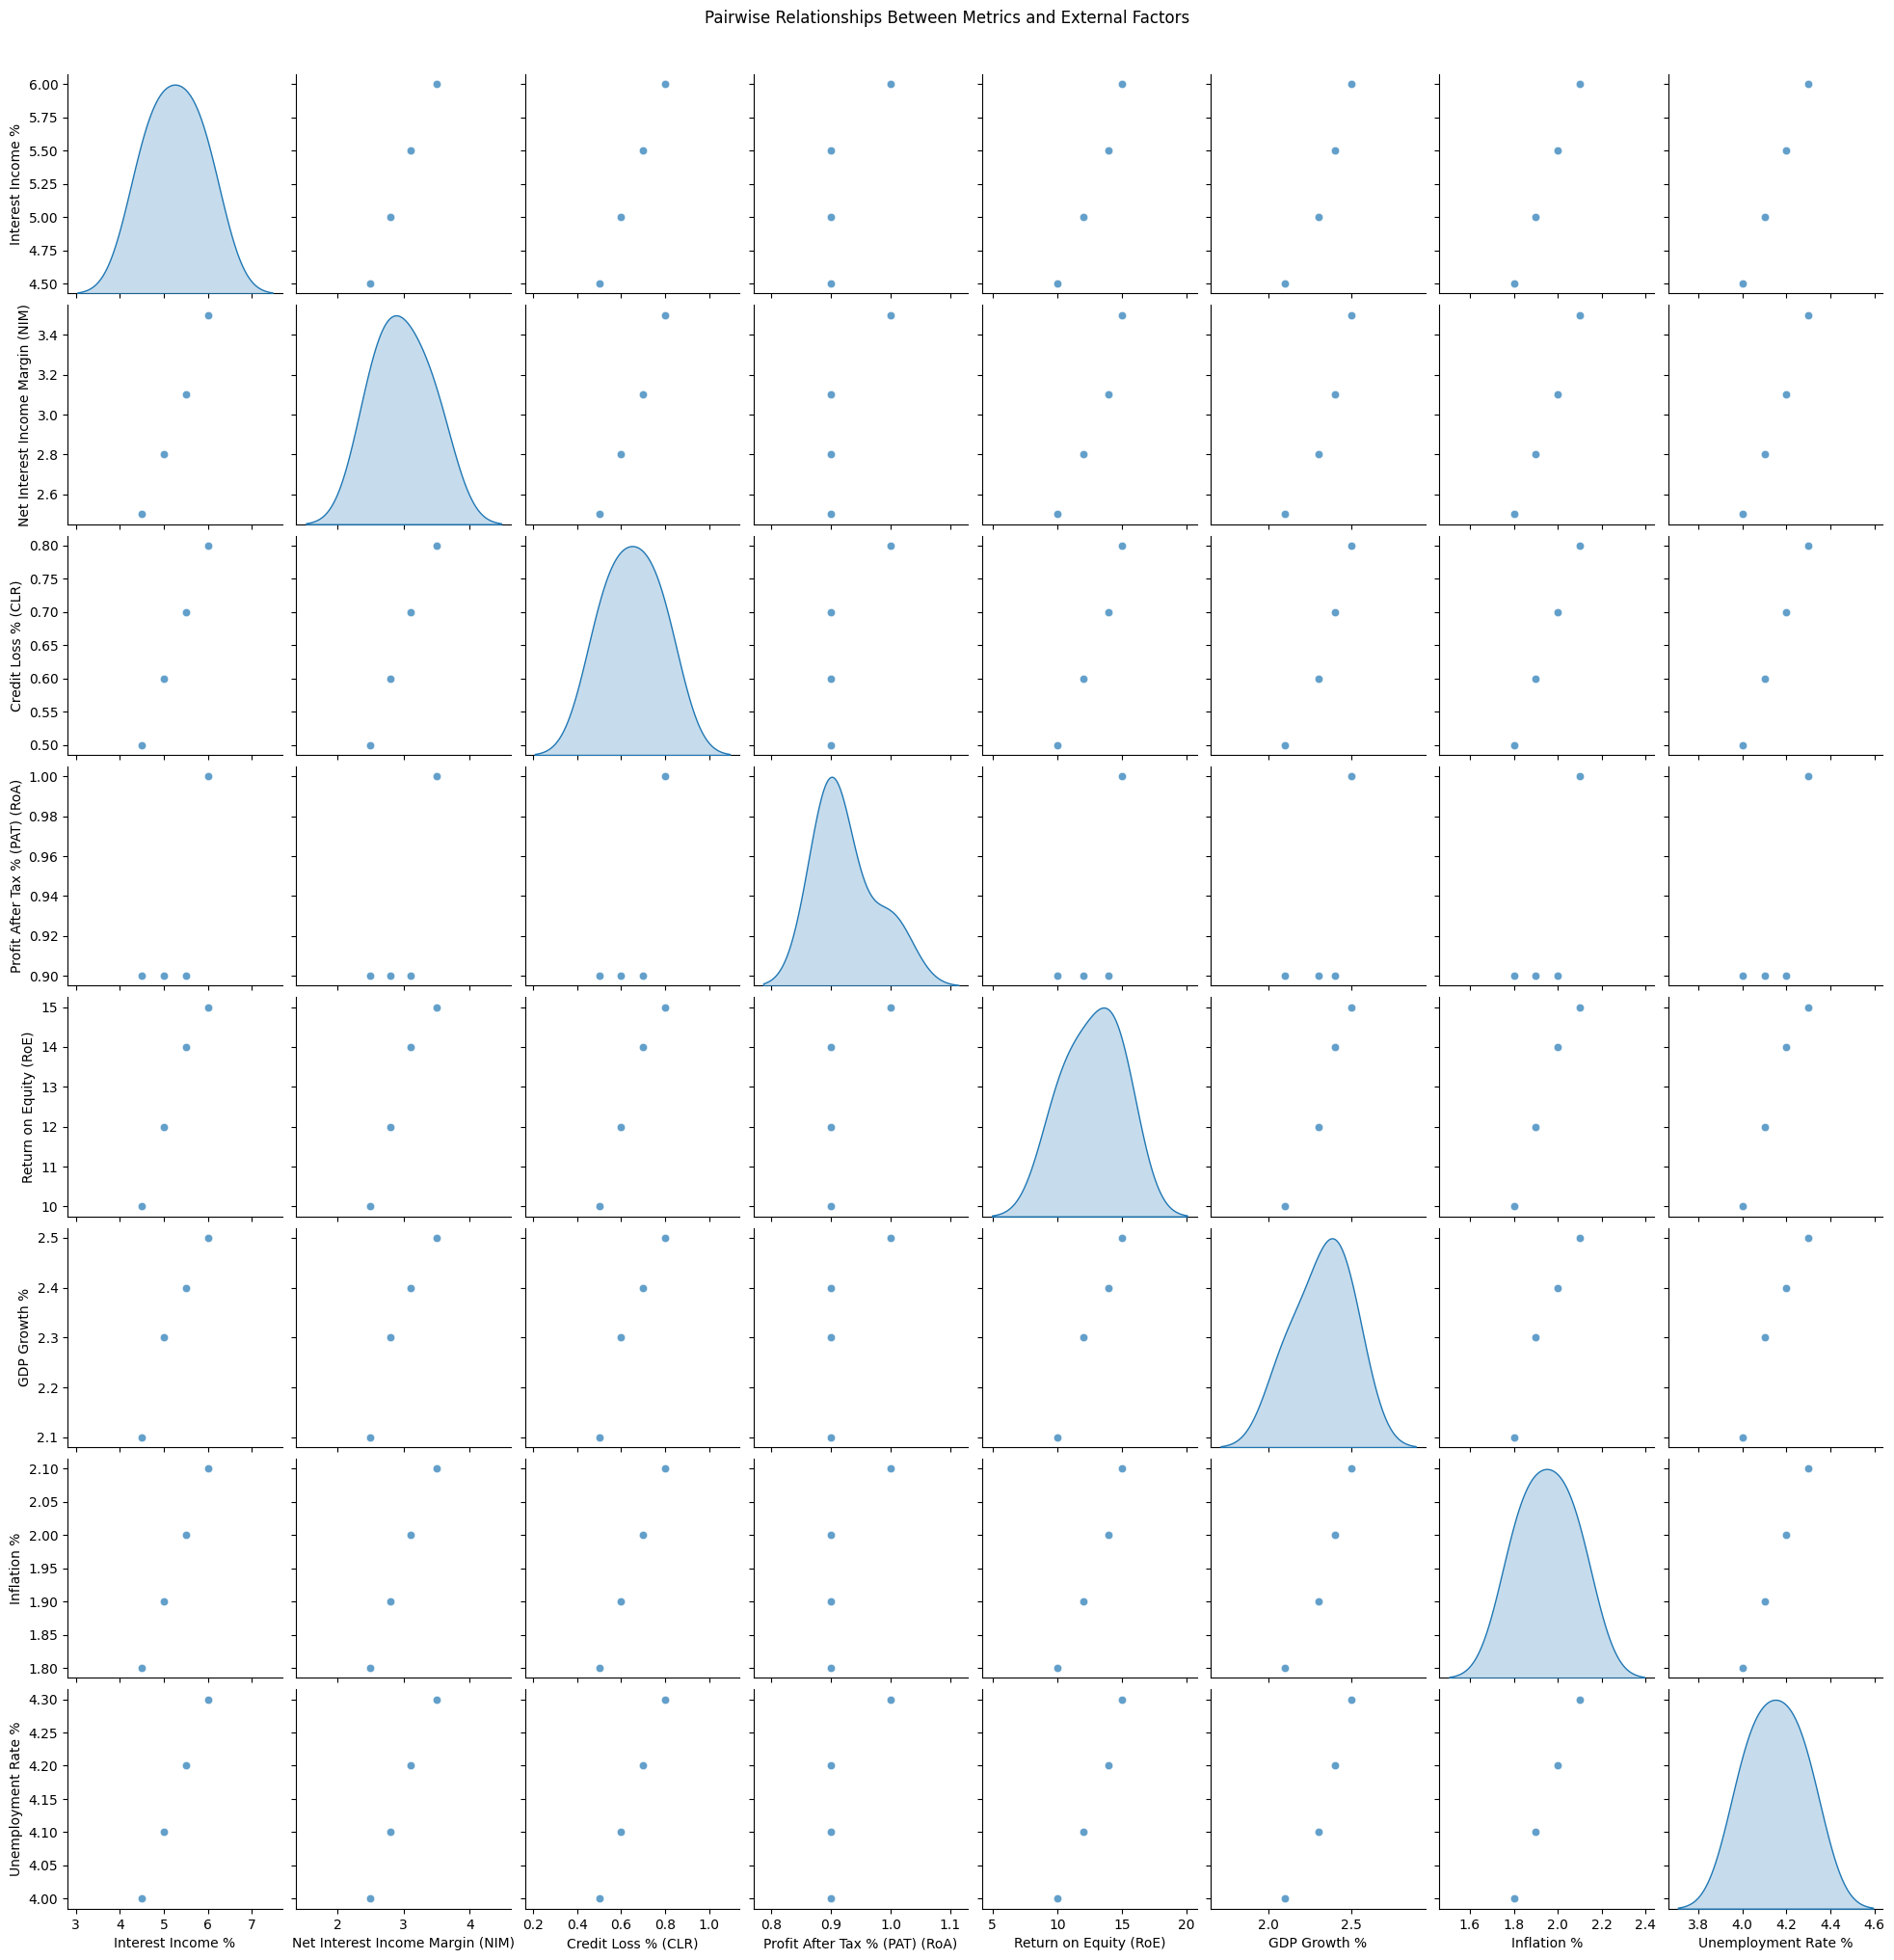

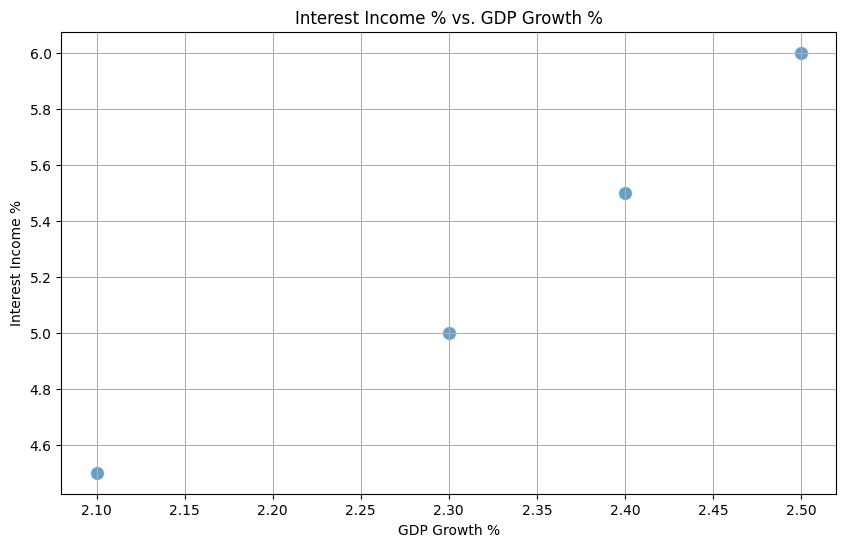

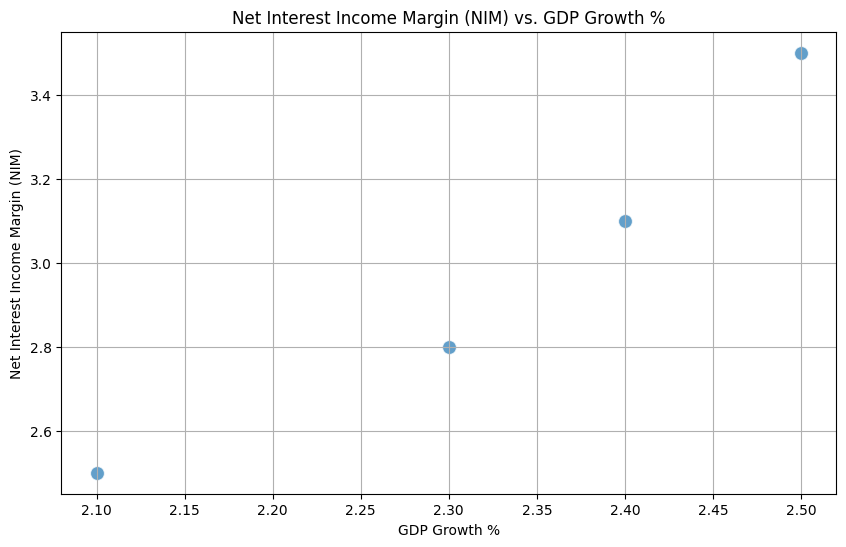

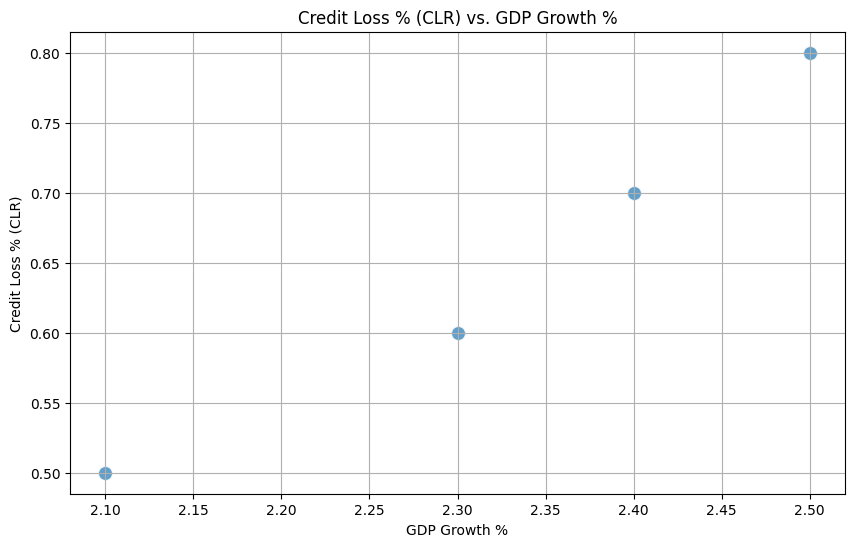

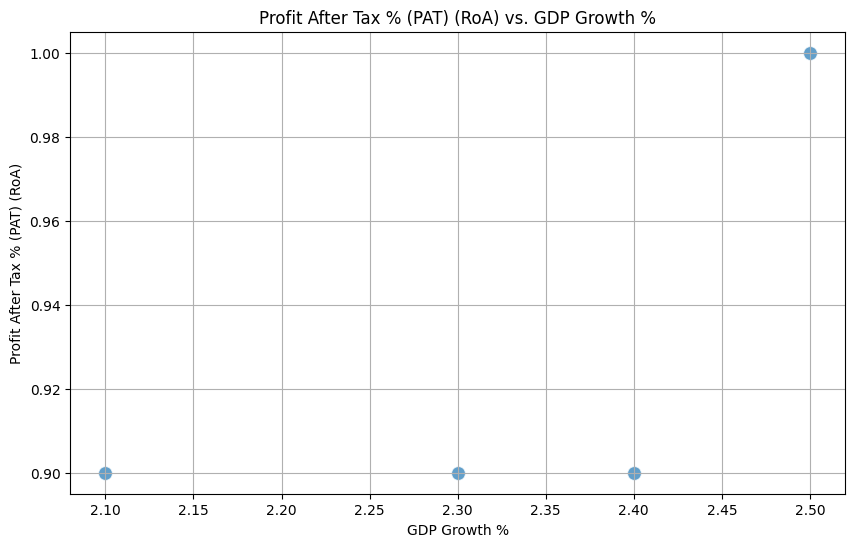

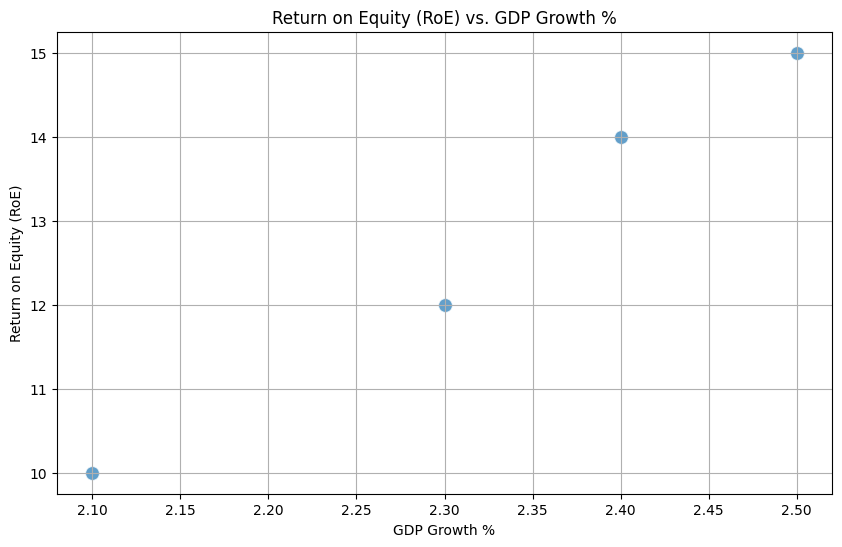

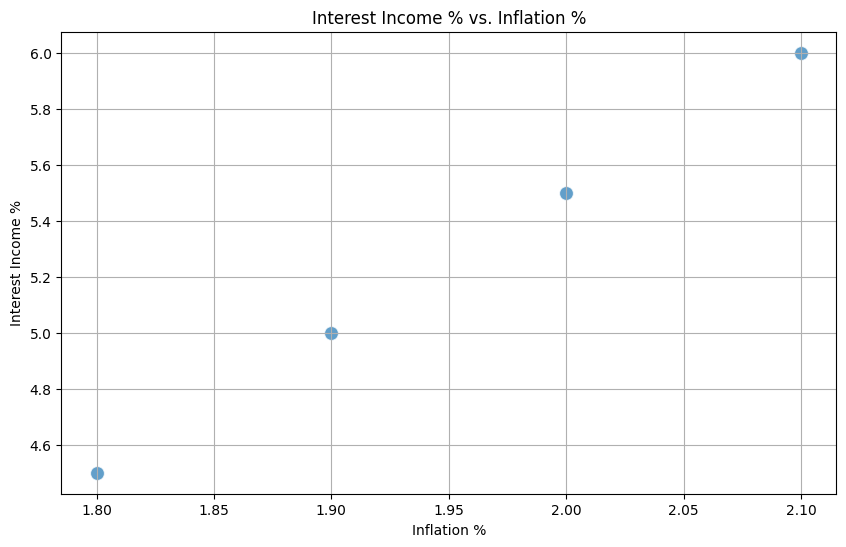

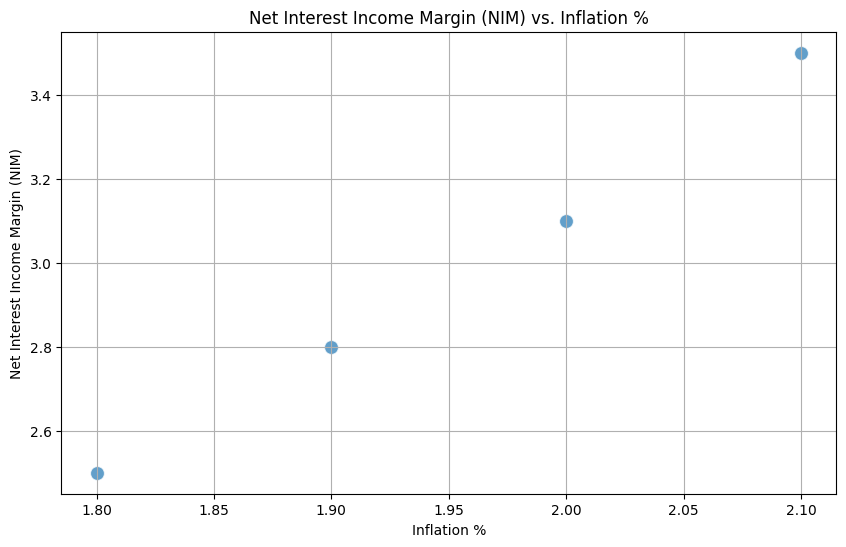

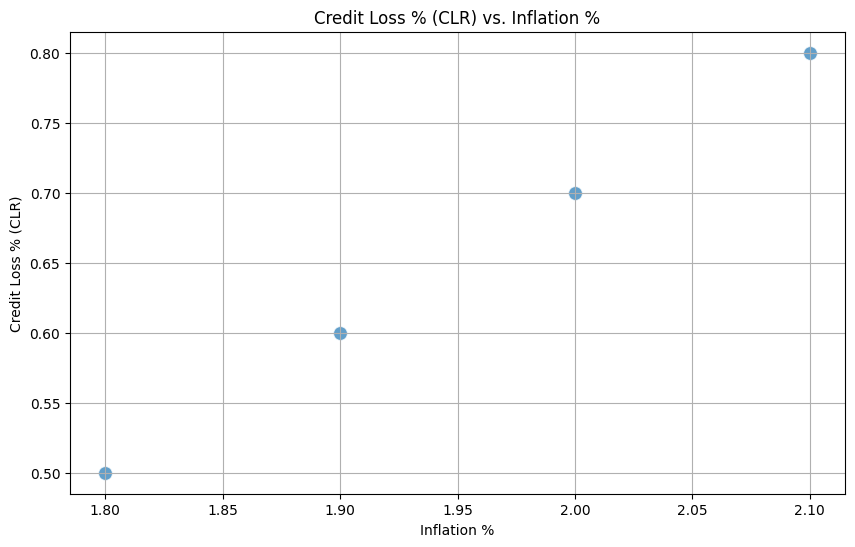

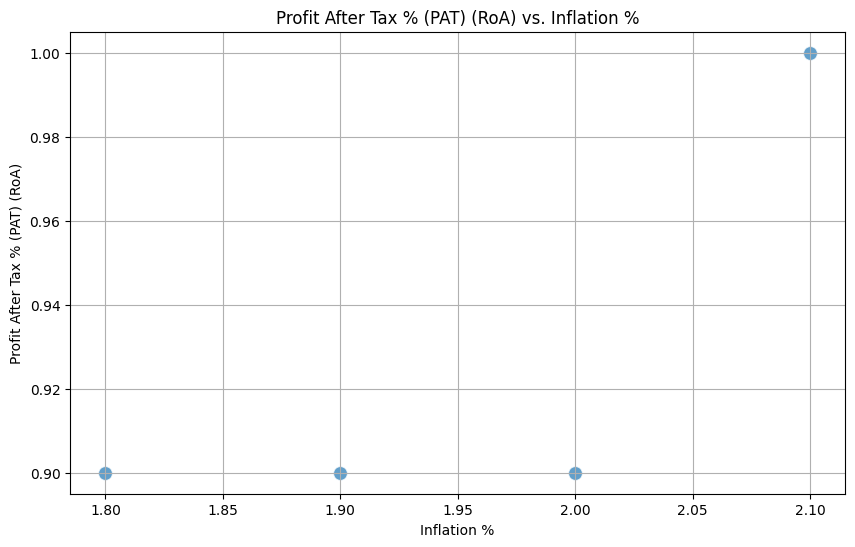

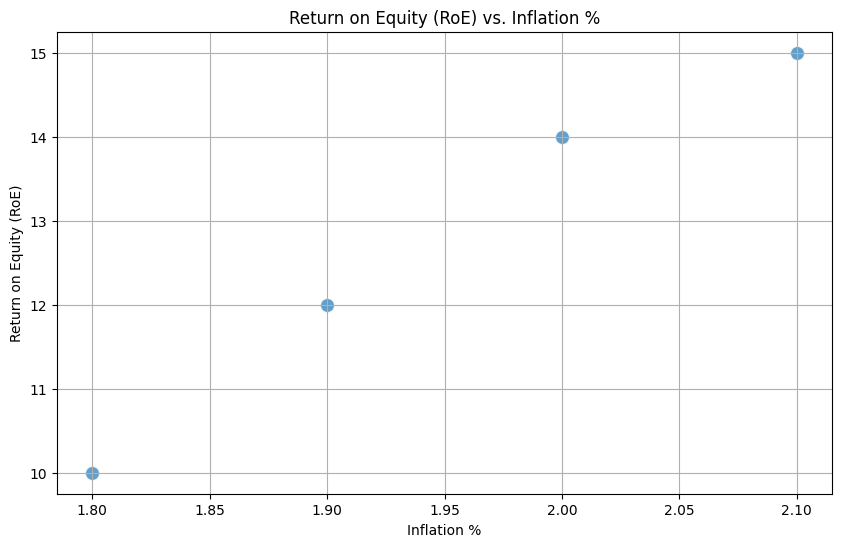

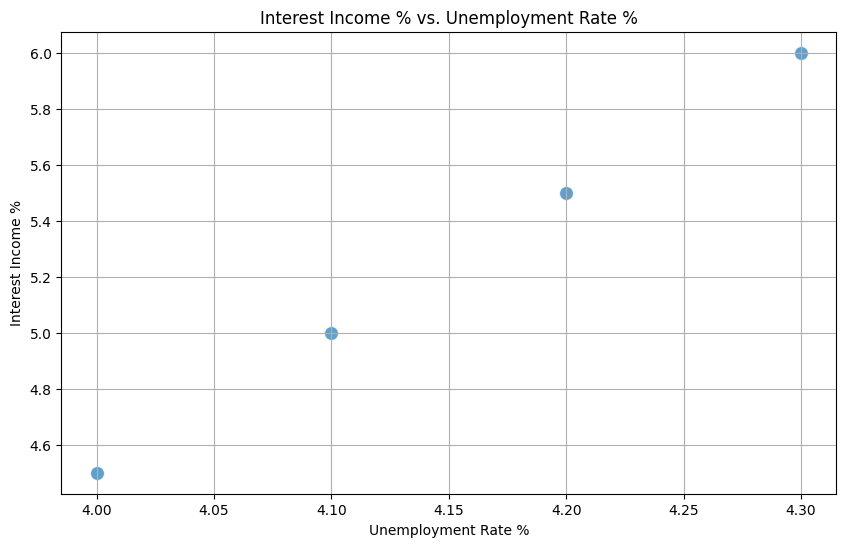

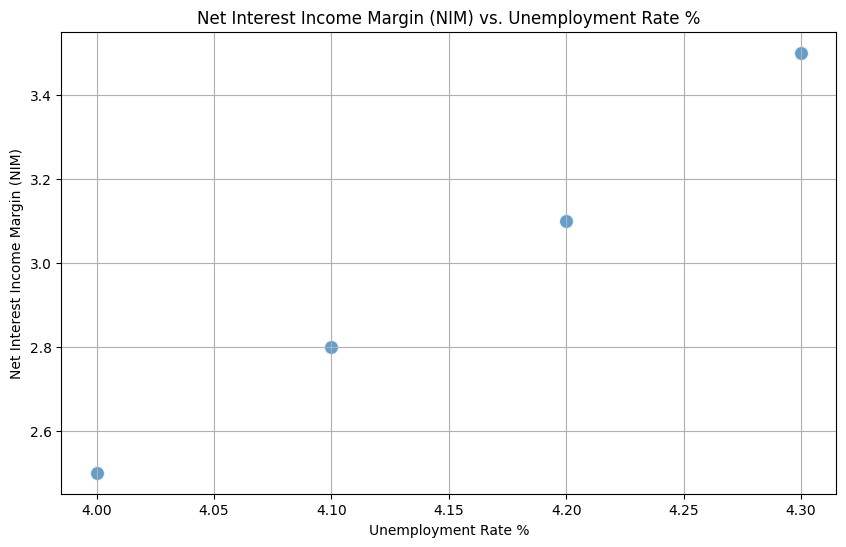

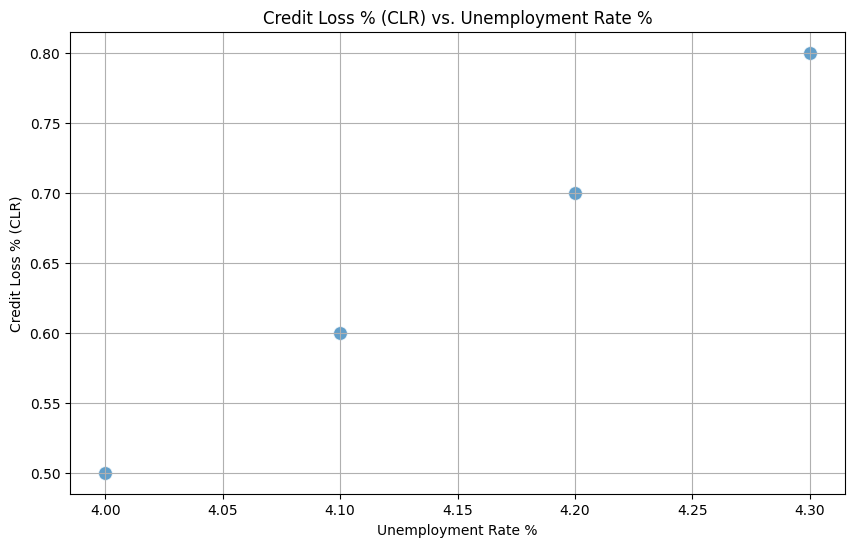

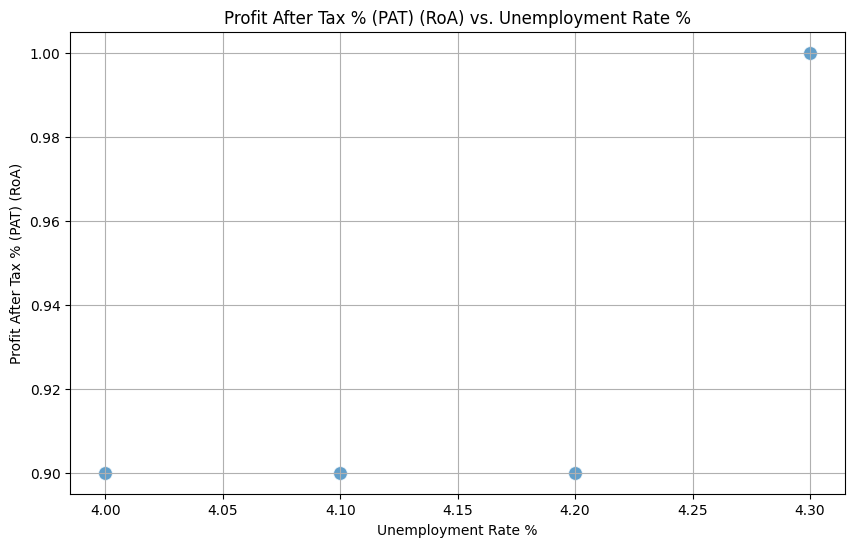

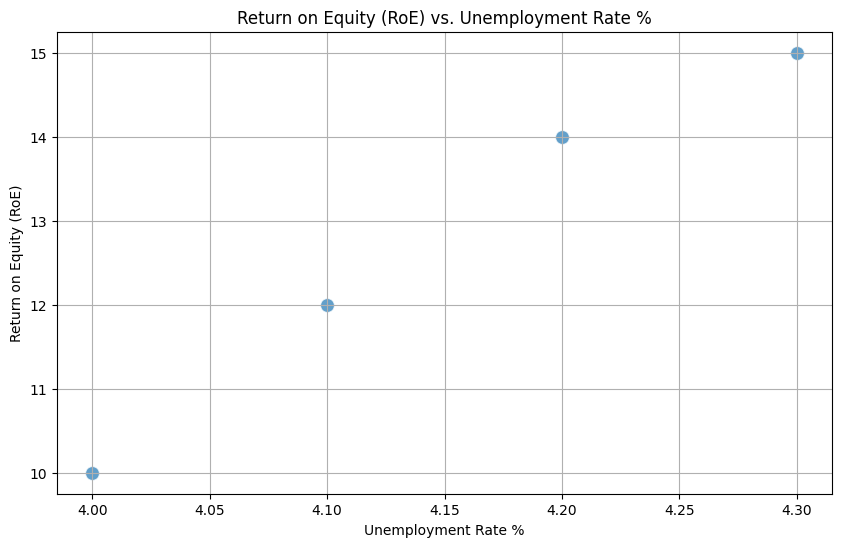

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your original dictionary
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)

# Create a directory to save the plots if it doesn't exist
save_path = 'plots'  # You can change this to your desired path
os.makedirs(save_path, exist_ok=True)

# Correlation Analysis Including External Factors
print("\nCorrelation Matrix Including External Factors:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap for Correlations with External Factors
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including External Factors')
plt.savefig(os.path.join(save_path, 'correlation_heatmap.png'))  # Save the heatmap
plt.show()

# Pairplot for Metrics vs. External Factors
external_factors = ['GDP Growth %', 'Inflation %', 'Unemployment Rate %']
metrics = ['Interest Income %', 'Net Interest Income Margin (NIM)', 'Credit Loss % (CLR)',
           'Profit After Tax % (PAT) (RoA)', 'Return on Equity (RoE)']

data_for_pairplot = df[metrics + external_factors]
pairplot = sns.pairplot(data_for_pairplot, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Metrics and External Factors', y=1.02)
pairplot.savefig(os.path.join(save_path, 'pairplot.png'))  # Save the pairplot
plt.show()

# Scatterplots for Metrics vs. External Factors
for factor in external_factors:
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[factor], y=df[metric], s=100, alpha=0.7)
        plt.title(f'{metric} vs. {factor}')
        plt.xlabel(factor)
        plt.ylabel(metric)
        plt.grid()
        plt.savefig(os.path.join(save_path, f'{metric}_vs_{factor}.png'))  # Save each scatterplot
        plt.show()


Comparison with Industry Benchmarks:
                                      Company Average  Benchmark  Difference
Interest Income %                               5.250        5.0       0.250
Interest Expense %                              2.275        2.5      -0.225
Net Interest Income Margin (NIM)                2.975        2.8       0.175
Credit Loss % (CLR)                             0.650        0.6       0.050
Risk Adjusted Interest Income (RAII)            2.325        2.4      -0.075
Non-Interest Revenue % (NIR)                    1.775        1.8      -0.025
Operating Cost % (Opex)                         1.950        2.0      -0.050
Profit Before Tax % (PBT)                       1.375        1.5      -0.125
Tax %                                           0.450        0.4       0.050
Profit After Tax % (PAT) (RoA)                  0.925        1.0      -0.075
Equity Funding %                               57.500       55.0       2.500
Return on Equity (RoE)                

<Figure size 1200x600 with 0 Axes>

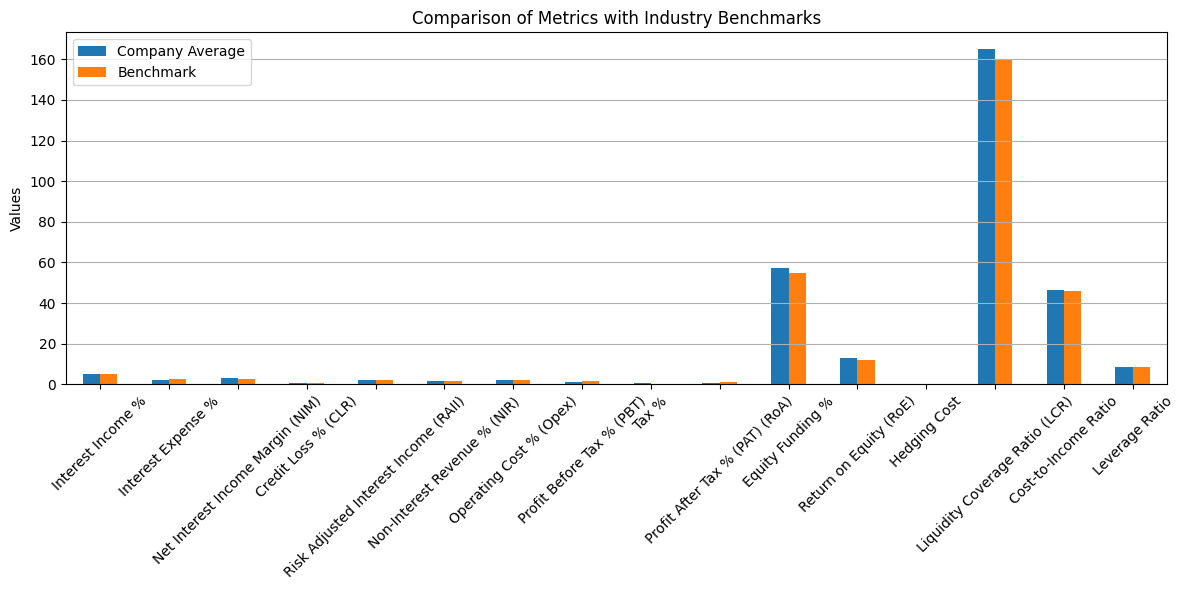


Metrics with Large Deviations from Benchmarks:
                                Company Average  Benchmark  Difference
Equity Funding %                          57.50       55.0        2.50
Return on Equity (RoE)                    12.75       12.0        0.75
Liquidity Coverage Ratio (LCR)           165.00      160.0        5.00


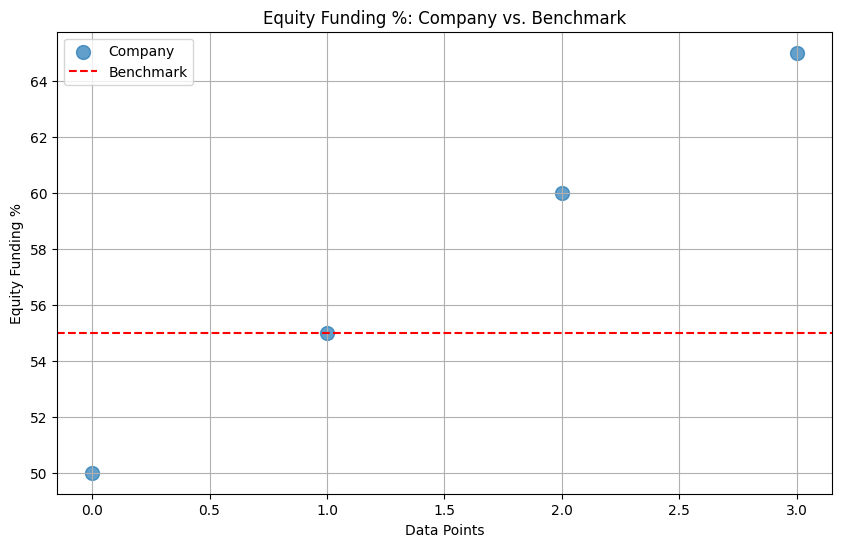

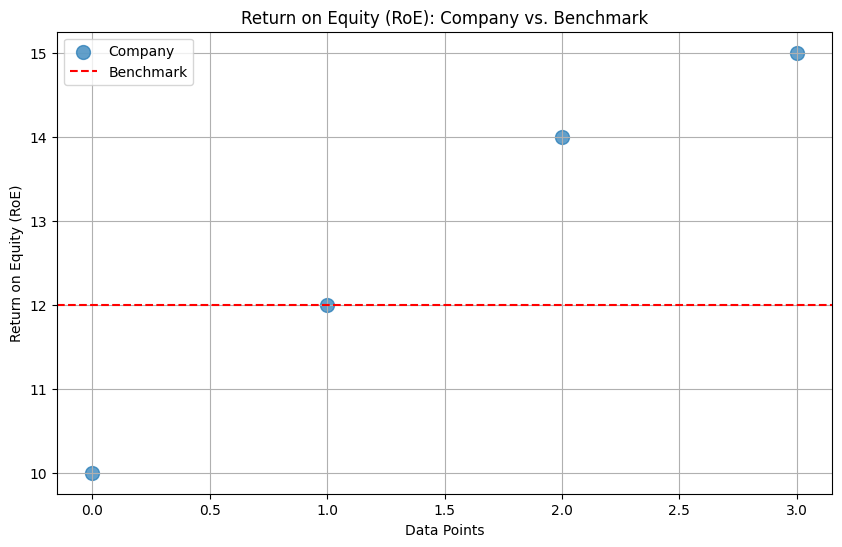

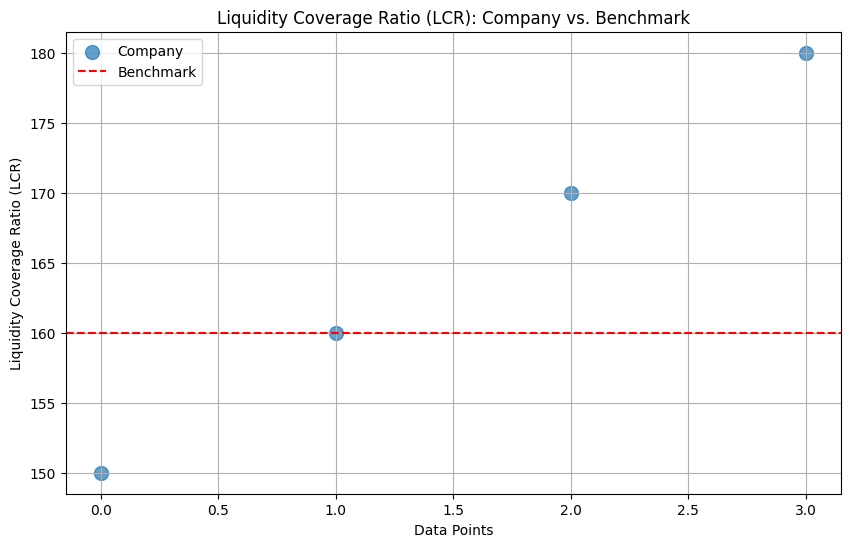

In [ ]:
# Industry Benchmarks
industry_benchmarks = {
    'Interest Income %': 5.0,
    'Interest Expense %': 2.5,
    'Net Interest Income Margin (NIM)': 2.8,
    'Credit Loss % (CLR)': 0.6,
    'Risk Adjusted Interest Income (RAII)': 2.4,
    'Non-Interest Revenue % (NIR)': 1.8,
    'Operating Cost % (Opex)': 2.0,
    'Profit Before Tax % (PBT)': 1.5,
    'Tax %': 0.4,
    'Profit After Tax % (PAT) (RoA)': 1.0,
    'Equity Funding %': 55,
    'Return on Equity (RoE)': 12,
    'Hedging Cost': 0.3,
    'Liquidity Coverage Ratio (LCR)': 160,
    'Cost-to-Income Ratio': 46,
    'Leverage Ratio': 8.5
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
benchmarks = pd.DataFrame(industry_benchmarks, index=['Benchmark']).T

# Compare Metrics with Benchmarks
comparison = df.mean().to_frame(name='Company Average').join(benchmarks, how='inner')
comparison['Difference'] = comparison['Company Average'] - comparison['Benchmark']
print("\nComparison with Industry Benchmarks:")
print(comparison)

# Bar Plot for Comparison
plt.figure(figsize=(12, 6))
comparison[['Company Average', 'Benchmark']].plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Comparison of Metrics with Industry Benchmarks')
plt.ylabel('Values')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Highlight Metrics with Large Deviations
deviation_threshold = comparison['Difference'].abs().mean()
high_deviation = comparison[comparison['Difference'].abs() > deviation_threshold]
print("\nMetrics with Large Deviations from Benchmarks:")
print(high_deviation)

# Scatterplots for Metrics with Large Deviations
for metric in high_deviation.index:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(df)), df[metric], alpha=0.7, s=100, label='Company')
    plt.axhline(y=industry_benchmarks[metric], color='red', linestyle='--', label='Benchmark')
    plt.title(f'{metric}: Company vs. Benchmark')
    plt.xlabel('Data Points')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
!pip install openpyxl
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from openpyxl import Workbook
from openpyxl.drawing.image import Image

# Assuming 'data' and 'industry_benchmarks' are your dictionaries
df = pd.DataFrame(data)
benchmarks = pd.DataFrame(industry_benchmarks, index=['Benchmark']).T

# Create a directory to save the plots if it doesn't exist
save_path = 'plots'
os.makedirs(save_path, exist_ok=True)

# ... (Your code for calculating comparison and high_deviation) ...

# Create a new Excel workbook
wb = Workbook()
ws = wb.active
ws.title = "Data and Comparison"

# Write data to the worksheet
ws.append(list(df.columns))  # Write column headers
for row in df.values.tolist():
    ws.append(row)

# Write benchmarks to the worksheet
ws.append([])  # Add an empty row for separation
ws.append(list(benchmarks.index) + ['Benchmark'])  # Write benchmark header
for row in benchmarks.reset_index().values.tolist():
    ws.append(row)

# Write comparison to the worksheet
ws.append([])  # Add an empty row for separation
ws.append(list(comparison.columns))  # Write comparison header
for row in comparison.reset_index().values.tolist():
    ws.append(row)

# ... (Your code for creating plots) ...

# Save the plots to files
plt.savefig(os.path.join(save_path, 'comparison_bar_plot.png'))
# ... (Save other plots similarly) ...

# Add plots to the worksheet
img = Image(os.path.join(save_path, 'comparison_bar_plot.png'))
ws.add_image(img, 'G2')  # Adjust cell position as needed
# ... (Add other plots similarly) ...

# Save the Excel file
wb.save("industry_benchmark_analysis.xlsx")

<Figure size 640x480 with 0 Axes>


Comparison with Industry Benchmarks:
                                      Company Average  Benchmark  Difference
Interest Income %                               5.250        5.0       0.250
Interest Expense %                              2.275        2.5      -0.225
Net Interest Income Margin (NIM)                2.975        2.8       0.175
Credit Loss % (CLR)                             0.650        0.6       0.050
Risk Adjusted Interest Income (RAII)            2.325        2.4      -0.075
Non-Interest Revenue % (NIR)                    1.775        1.8      -0.025
Operating Cost % (Opex)                         1.950        2.0      -0.050
Profit Before Tax % (PBT)                       1.375        1.5      -0.125
Tax %                                           0.450        0.4       0.050
Profit After Tax % (PAT) (RoA)                  0.925        1.0      -0.075
Equity Funding %                               57.500       55.0       2.500
Return on Equity (RoE)                

<Figure size 1200x600 with 0 Axes>

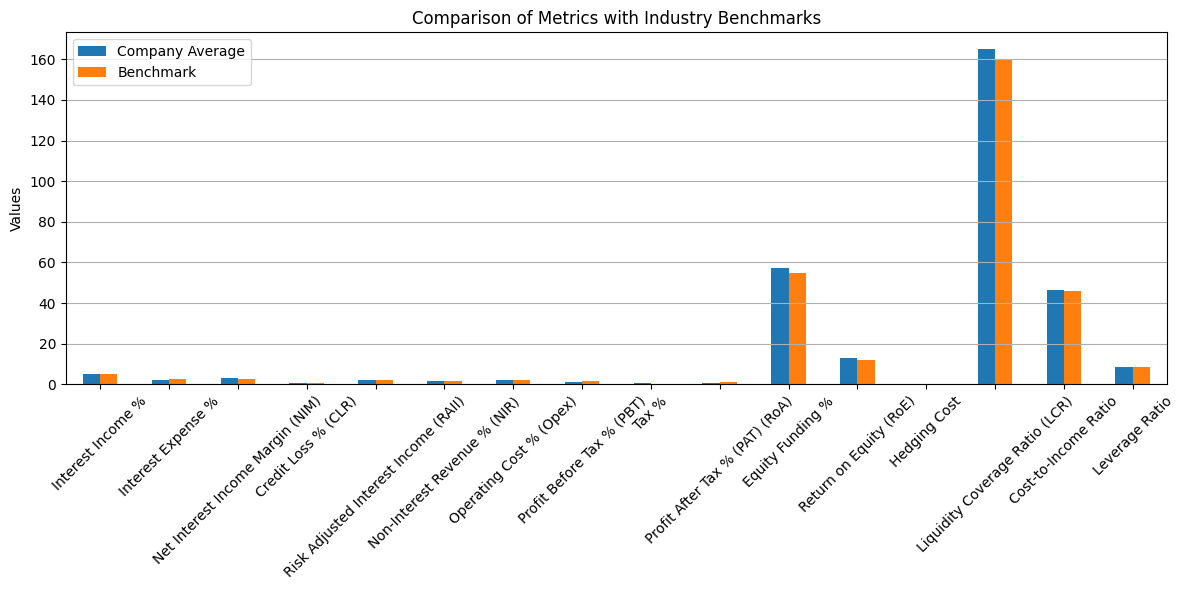


Metrics with Large Deviations from Benchmarks:
                                Company Average  Benchmark  Difference
Equity Funding %                          57.50       55.0        2.50
Return on Equity (RoE)                    12.75       12.0        0.75
Liquidity Coverage Ratio (LCR)           165.00      160.0        5.00


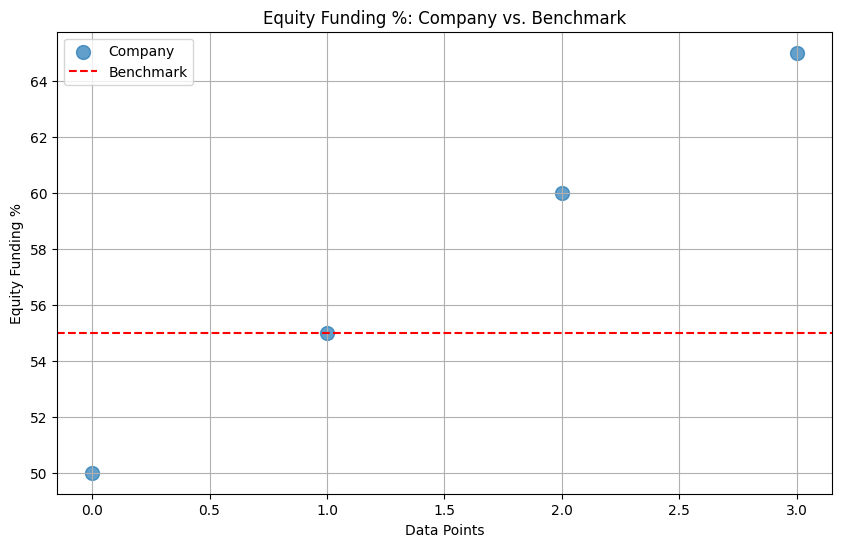

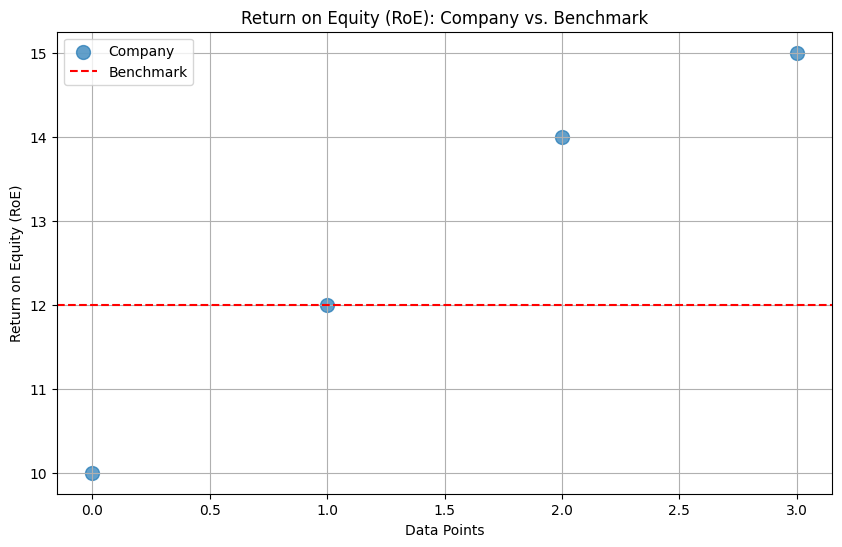

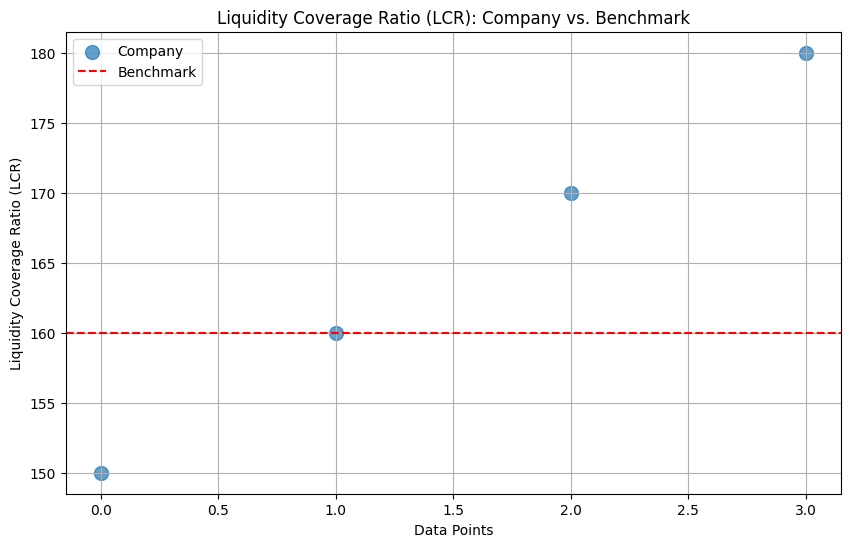


Correlation Matrix Including External Factors:
                                      Interest Income %  Interest Expense %  \
Interest Income %                              1.000000            0.989778   
Interest Expense %                             0.989778            1.000000   
Net Interest Income Margin (NIM)               0.997257            0.976506   
Credit Loss % (CLR)                            1.000000            0.989778   
Risk Adjusted Interest Income (RAII)           0.994377            0.969109   
Non-Interest Revenue % (NIR)                   0.989778            1.000000   
Operating Cost % (Opex)                        1.000000            0.989778   
Profit Before Tax % (PBT)                      0.982708            0.946256   
Tax %                                          1.000000            0.989778   
Profit After Tax % (PAT) (RoA)                 0.774597            0.676481   
Equity Funding %                               1.000000            0.989778   
Retu

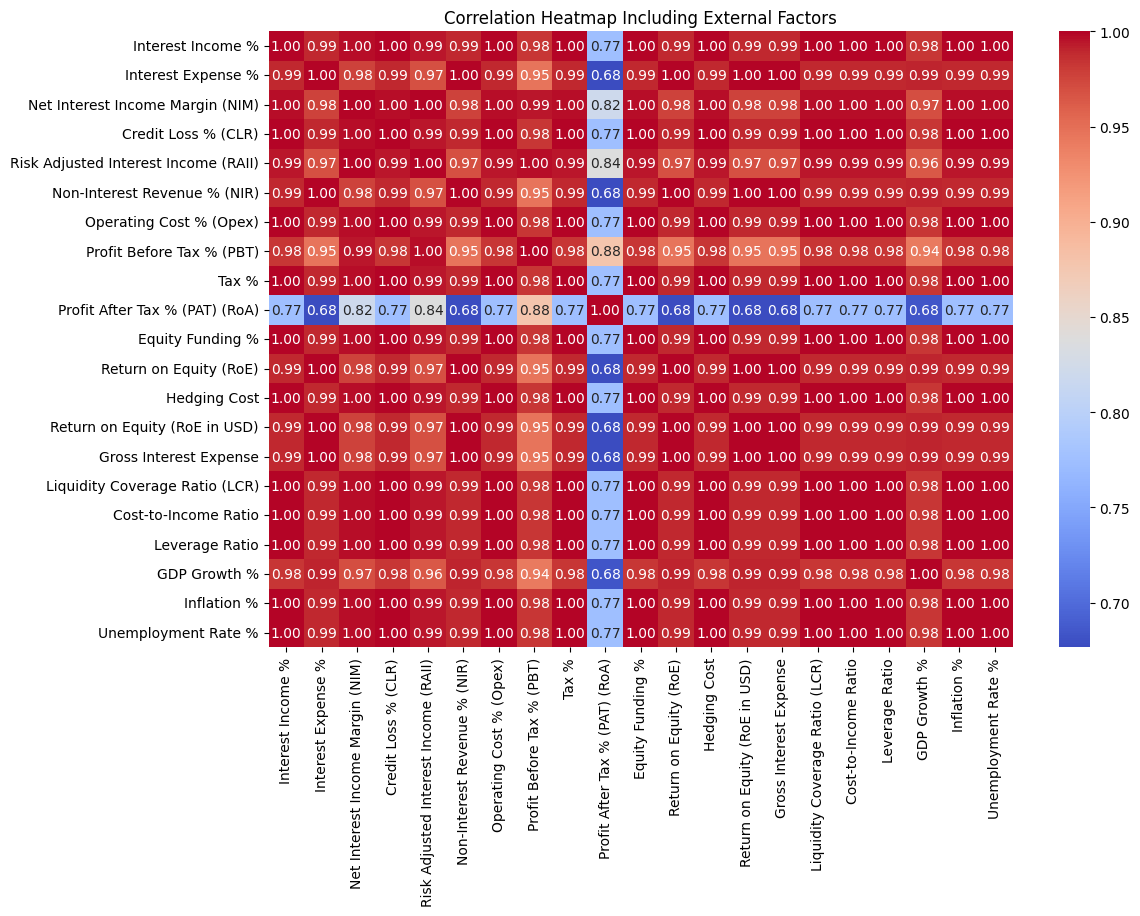

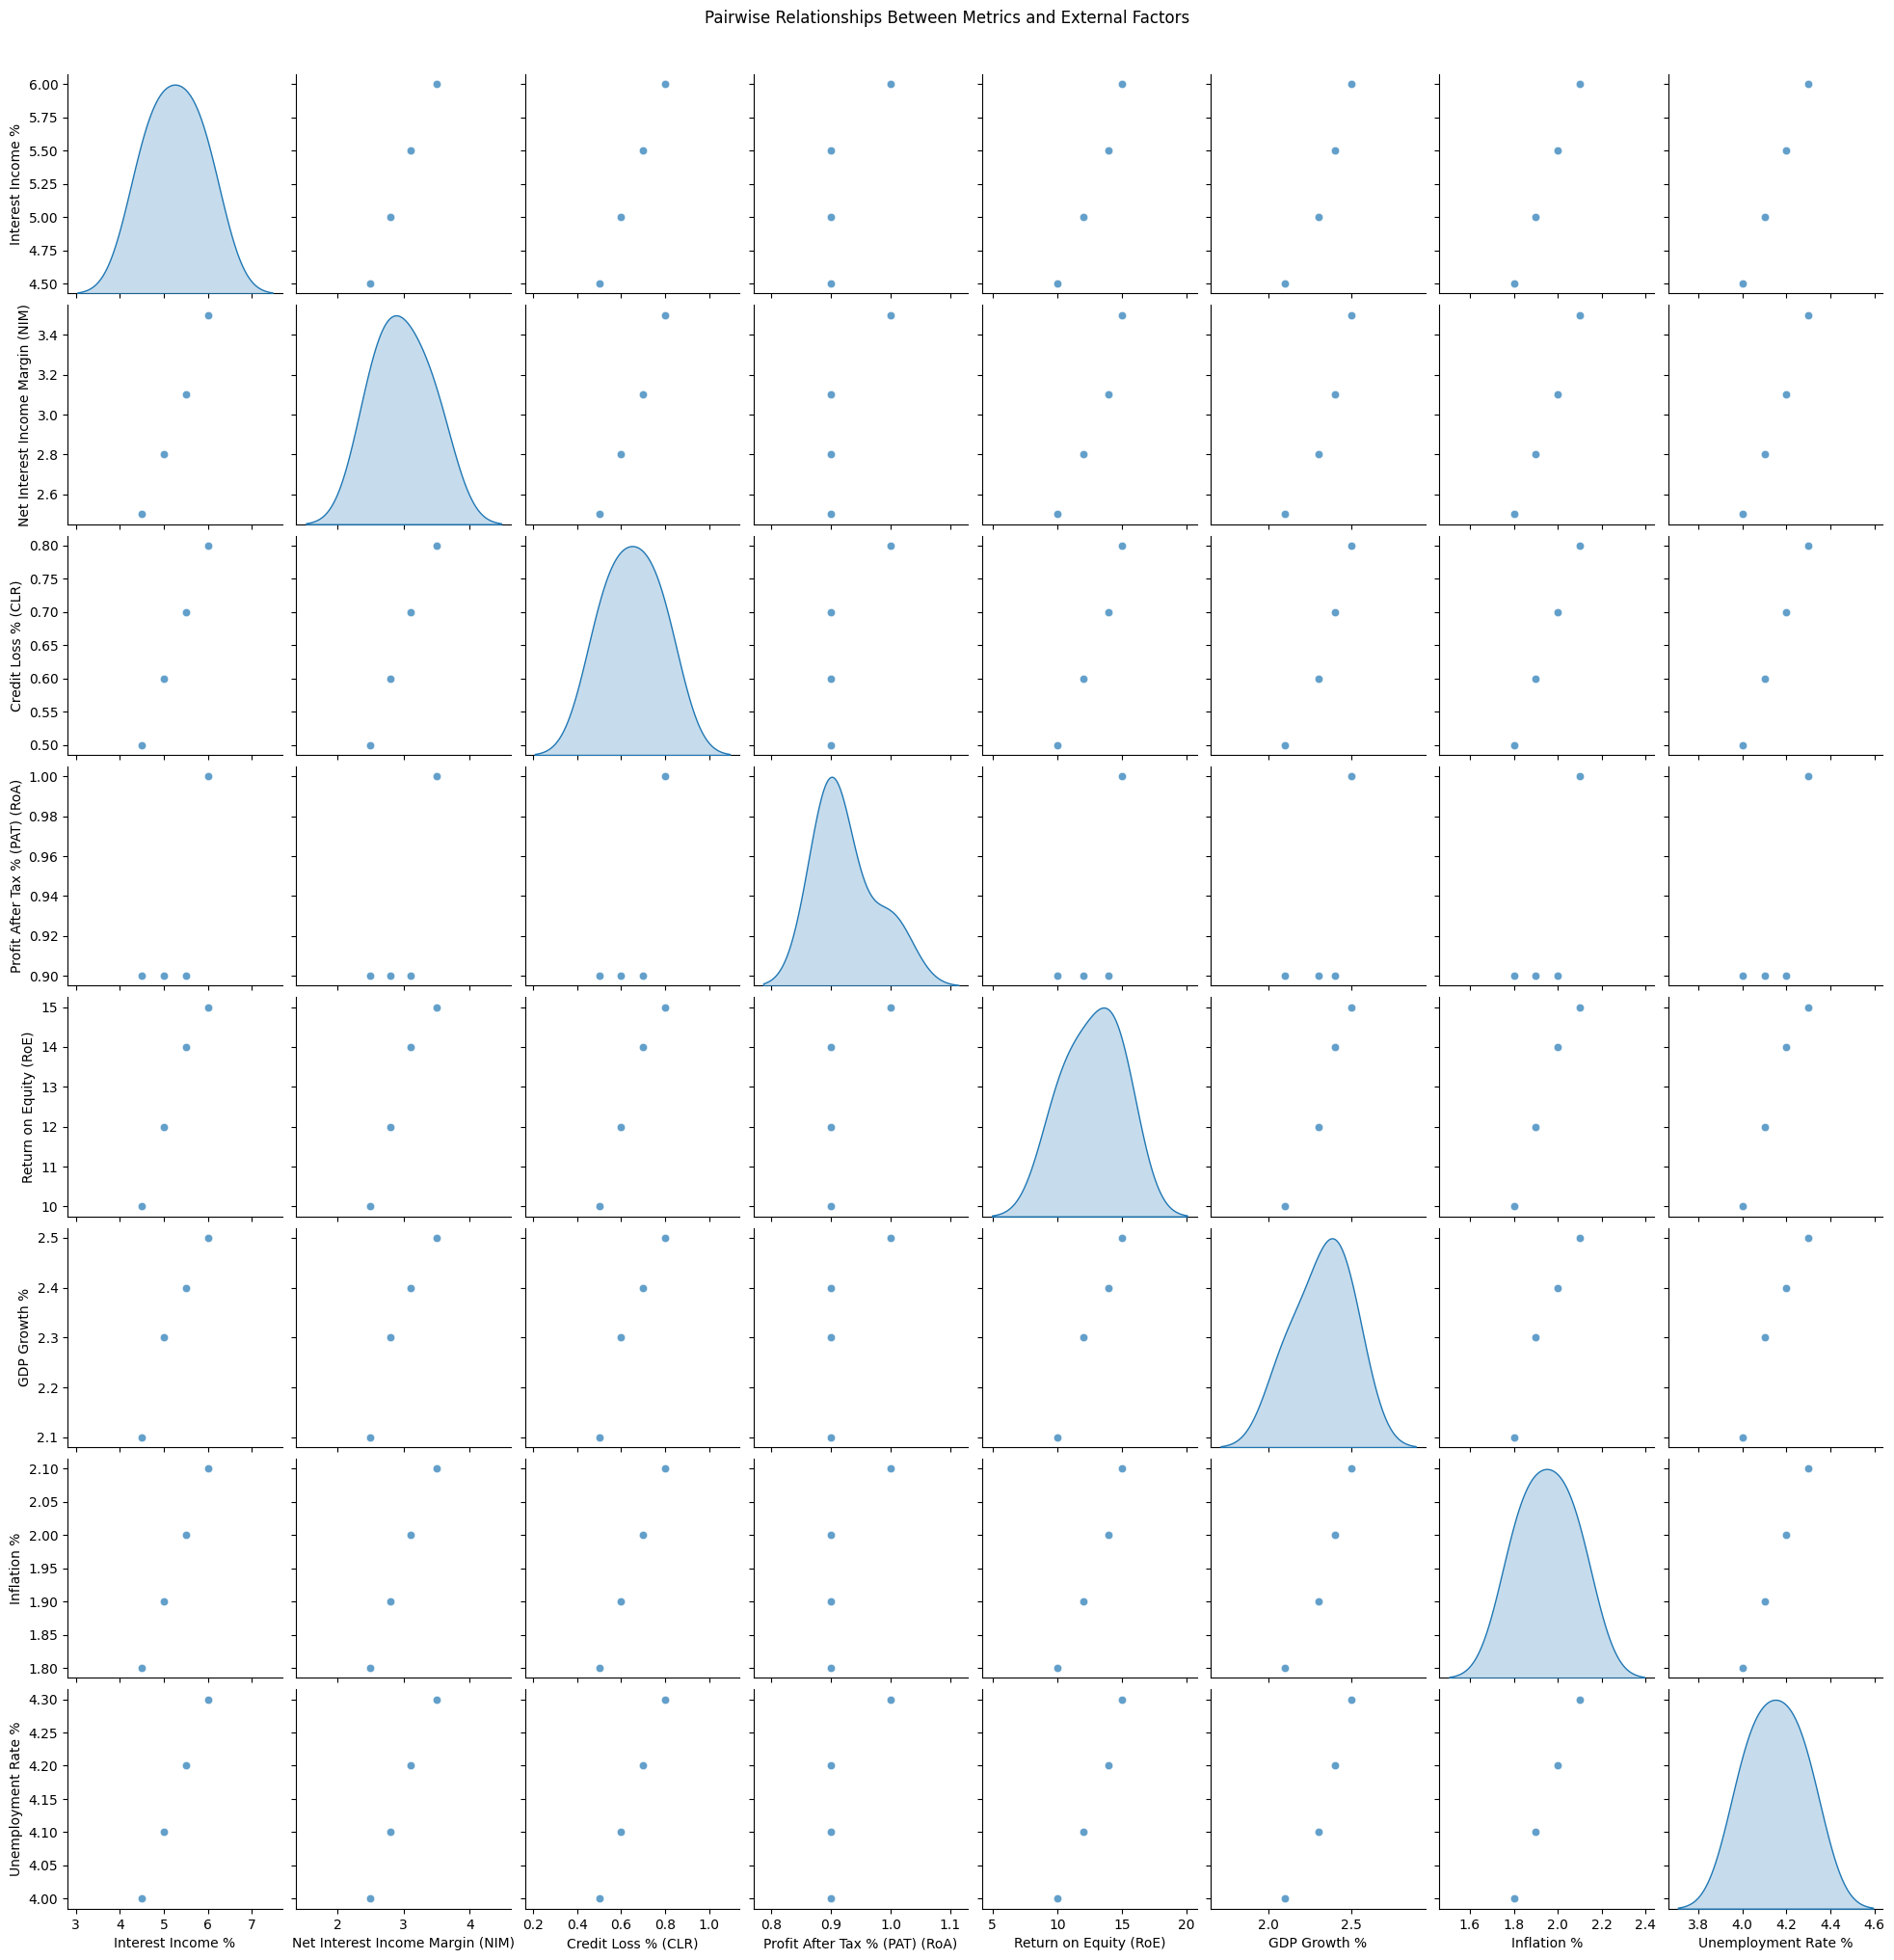

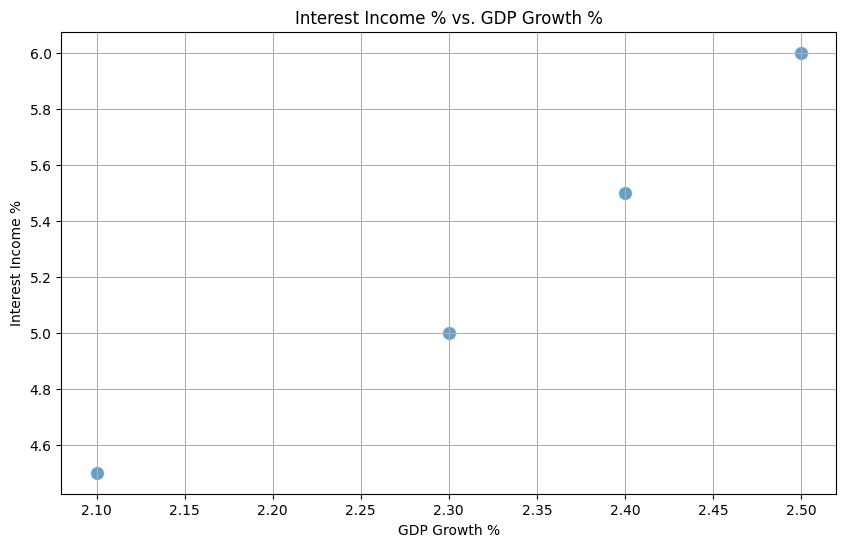

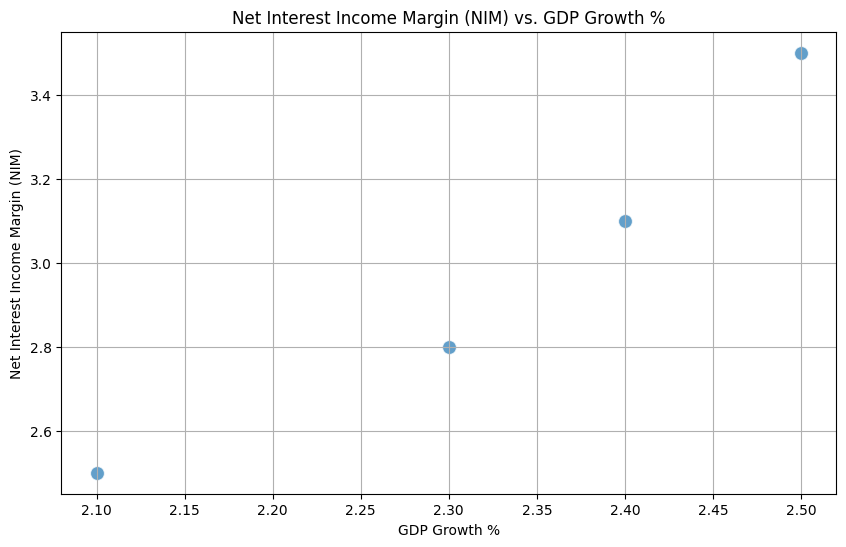

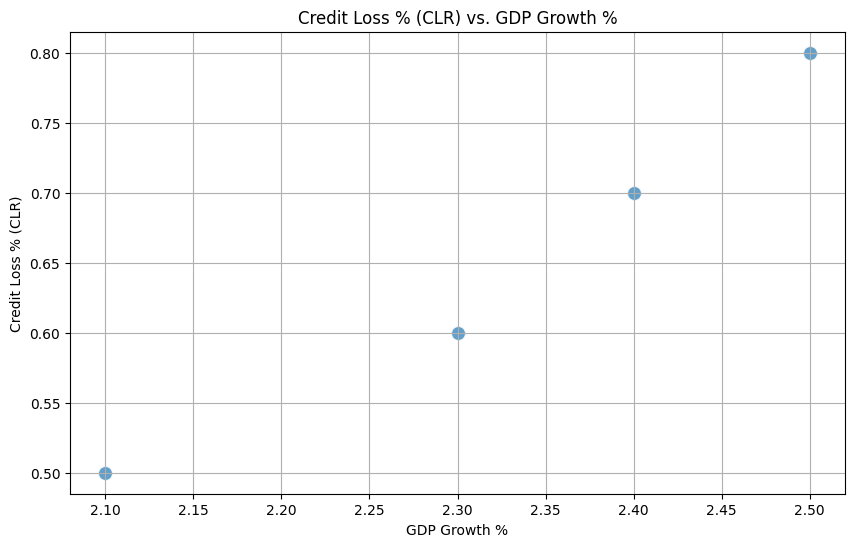

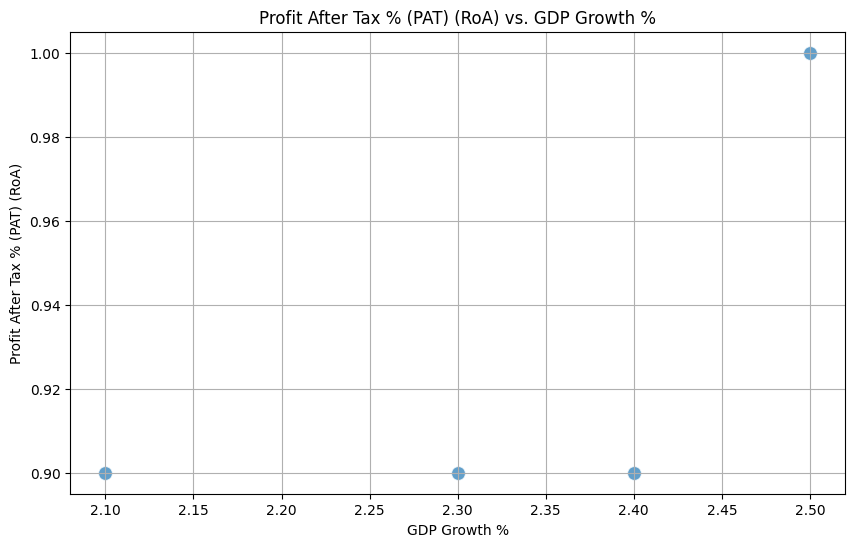

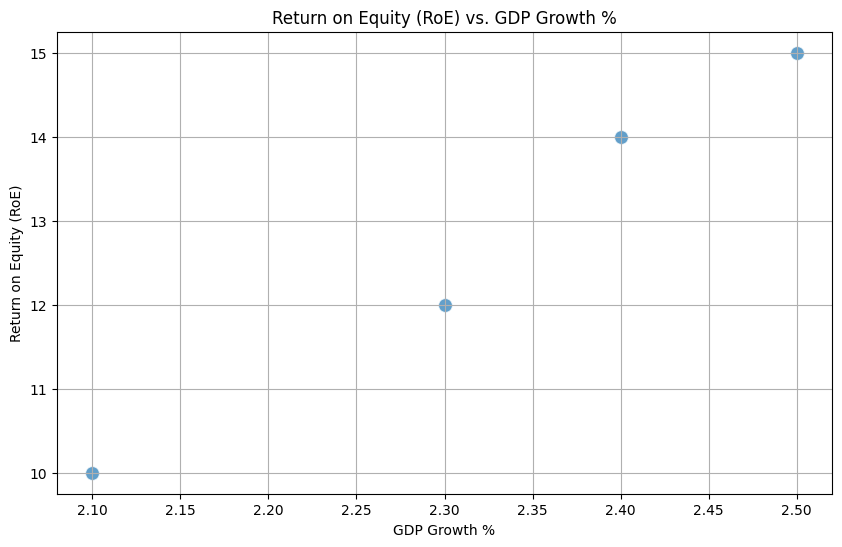

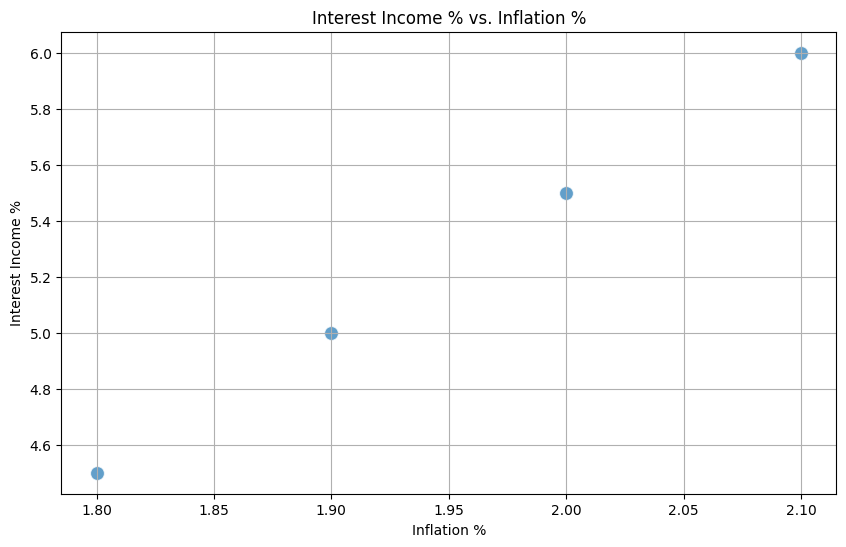

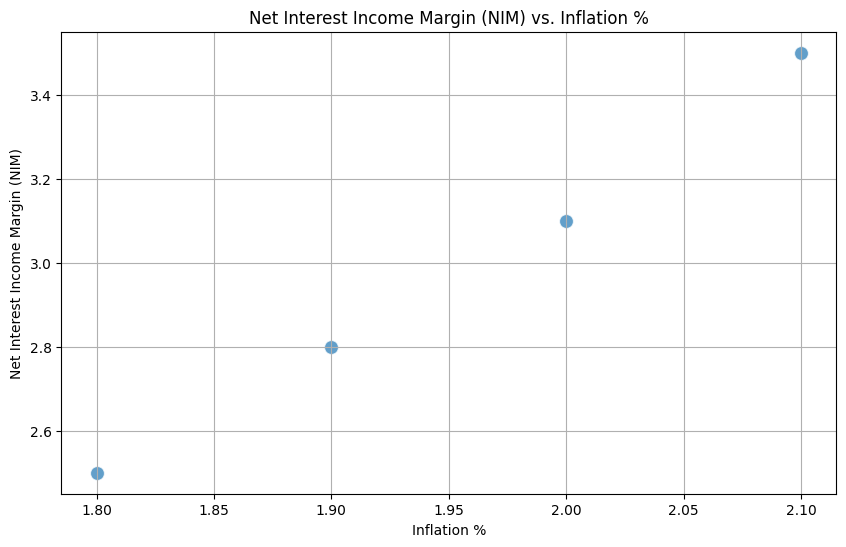

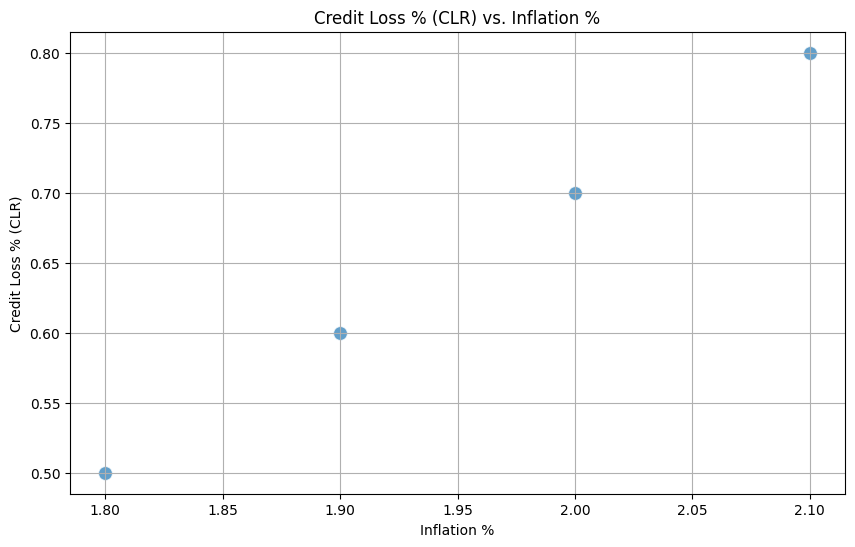

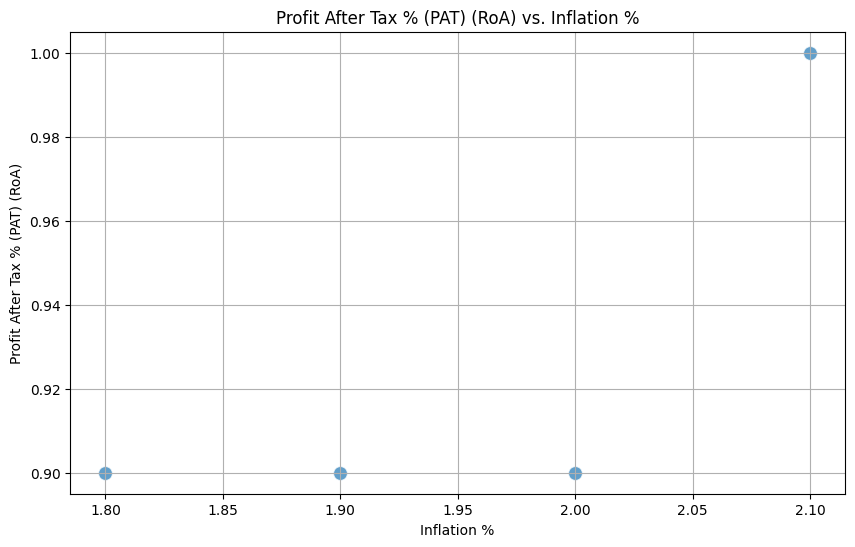

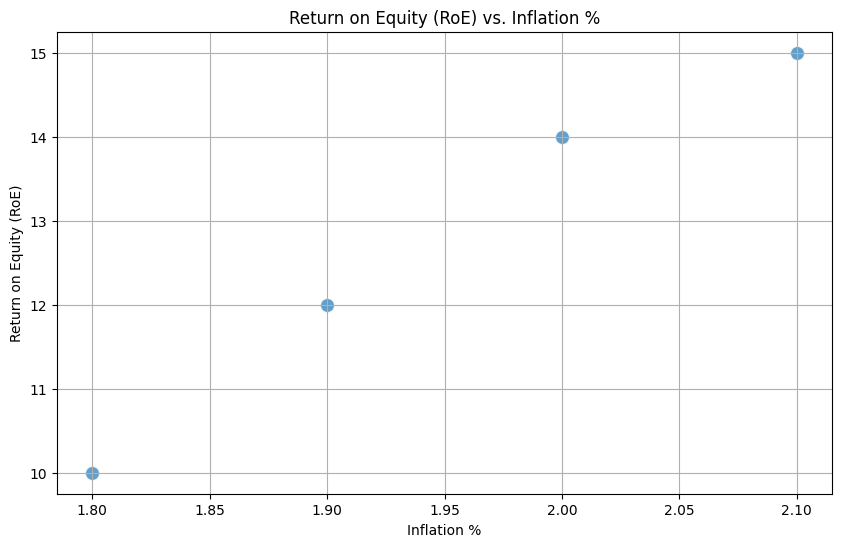

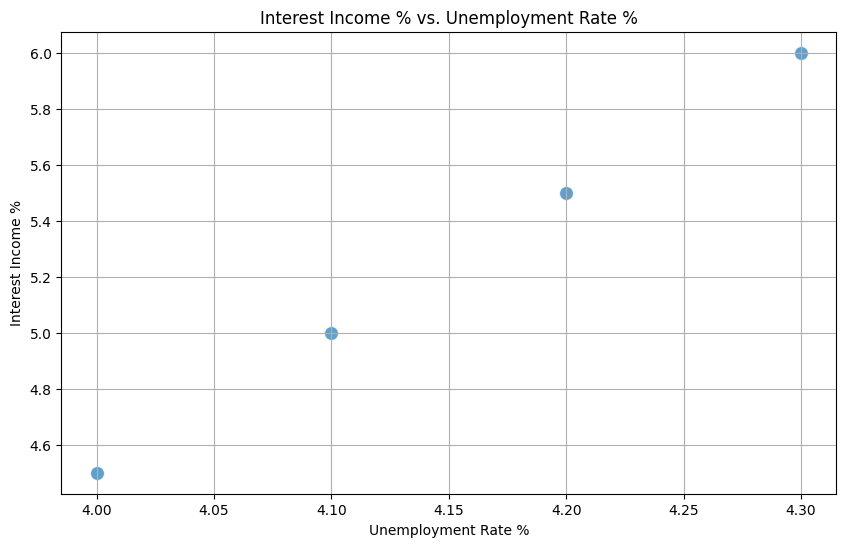

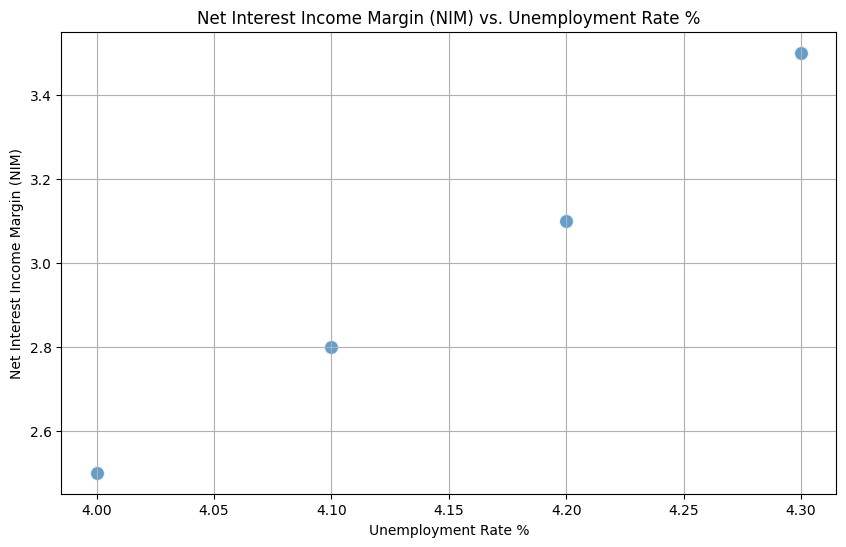

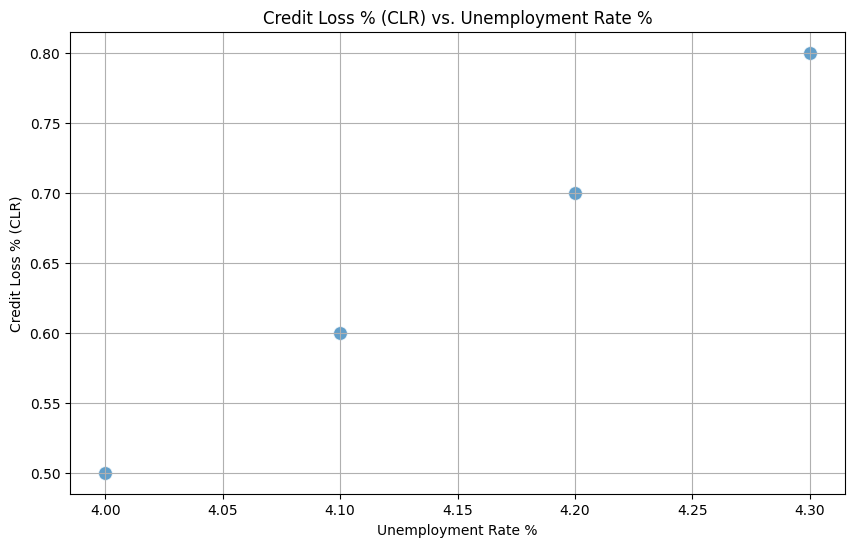

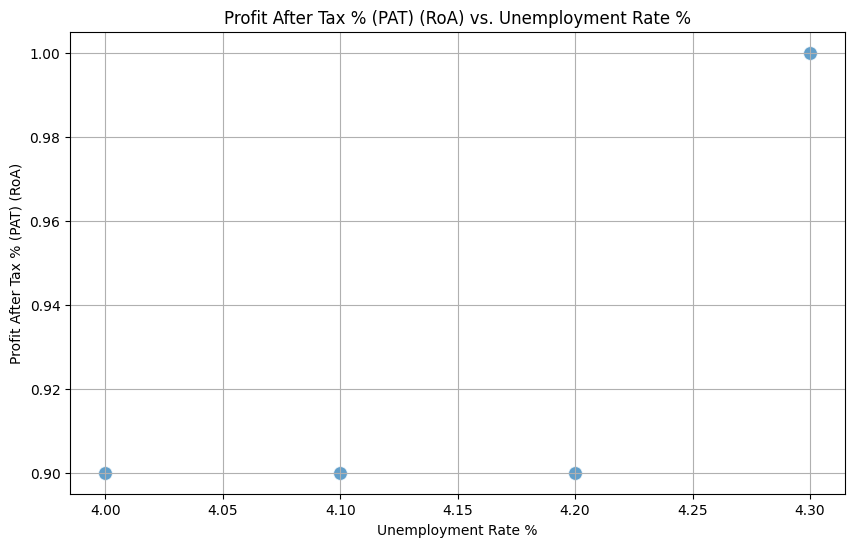

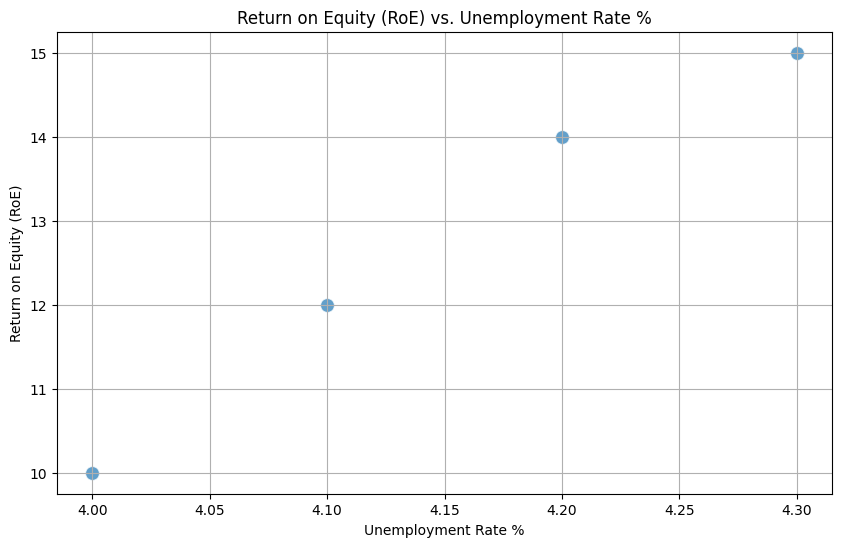

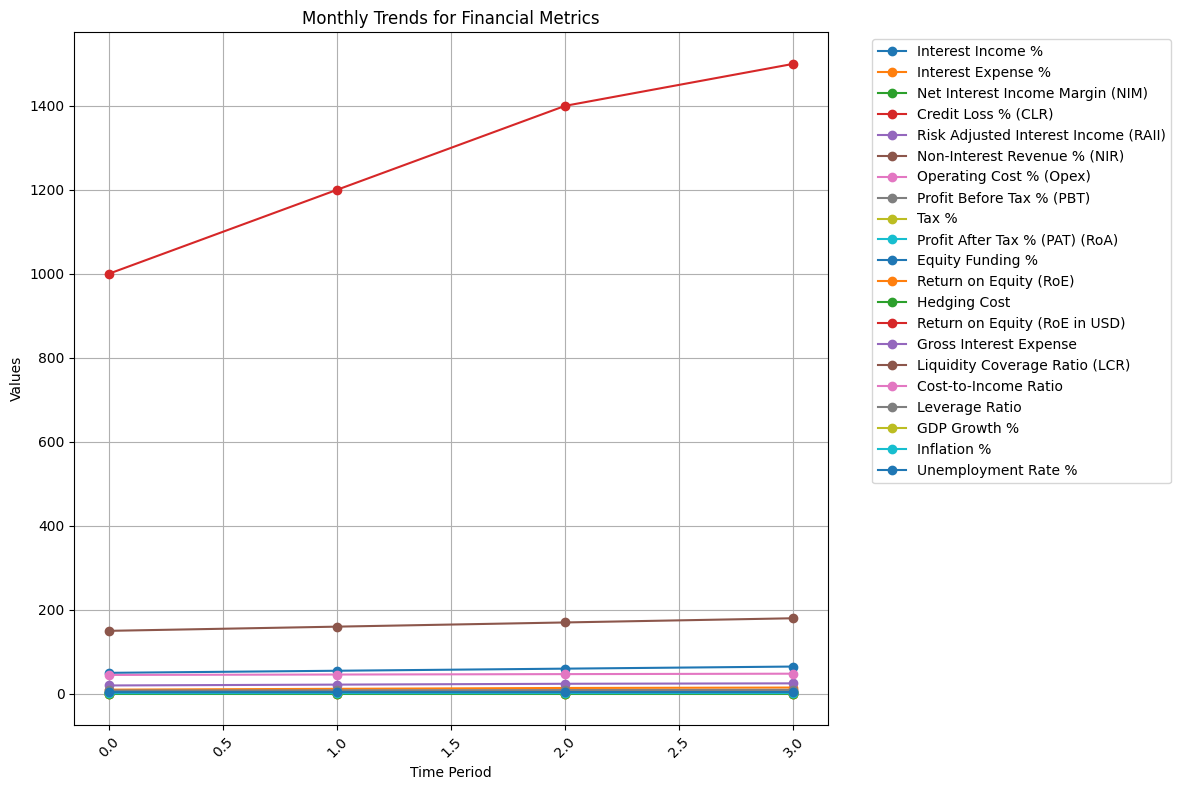

In [ ]:
# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
benchmarks = pd.DataFrame(industry_benchmarks, index=['Benchmark']).T

# Compare Metrics with Benchmarks
comparison = df.mean().to_frame(name='Company Average').join(benchmarks, how='inner')
comparison['Difference'] = comparison['Company Average'] - comparison['Benchmark']
print("\nComparison with Industry Benchmarks:")
print(comparison)

# Bar Plot for Comparison
plt.figure(figsize=(12, 6))
comparison[['Company Average', 'Benchmark']].plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Comparison of Metrics with Industry Benchmarks')
plt.ylabel('Values')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Highlight Metrics with Large Deviations
deviation_threshold = comparison['Difference'].abs().mean()
high_deviation = comparison[comparison['Difference'].abs() > deviation_threshold]
print("\nMetrics with Large Deviations from Benchmarks:")
print(high_deviation)

# Scatterplots for Metrics with Large Deviations
for metric in high_deviation.index:
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(df)), df[metric], alpha=0.7, s=100, label='Company')
    plt.axhline(y=industry_benchmarks[metric], color='red', linestyle='--', label='Benchmark')
    plt.title(f'{metric}: Company vs. Benchmark')
    plt.xlabel('Data Points')
    plt.ylabel(metric)
    plt.legend()
    plt.grid()
    plt.show()

# Correlation Analysis Including External Factors
print("\nCorrelation Matrix Including External Factors:")
correlation_matrix = df.corr()
print(correlation_matrix)

# Heatmap for Correlations with External Factors
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Including External Factors')
plt.show()

# Pairplot for Metrics vs. External Factors
external_factors = ['GDP Growth %', 'Inflation %', 'Unemployment Rate %']
metrics = ['Interest Income %', 'Net Interest Income Margin (NIM)', 'Credit Loss % (CLR)',
           'Profit After Tax % (PAT) (RoA)', 'Return on Equity (RoE)']

data_for_pairplot = df[metrics + external_factors]
sns.pairplot(data_for_pairplot, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairwise Relationships Between Metrics and External Factors', y=1.02)
plt.show()

# Scatterplots for Metrics vs. External Factors
for factor in external_factors:
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[factor], y=df[metric], s=100, alpha=0.7)
        plt.title(f'{metric} vs. {factor}')
        plt.xlabel(factor)
        plt.ylabel(metric)
        plt.grid()
        plt.show()

# Monthly Trend Plot for All Metrics
# Assuming you want to plot trends against the index (which represents time periods)
# If you have a specific 'Month' column, adjust the code accordingly
metrics = [col for col in df.columns if col != 'Month'] # 'Month' column not in the original data

plt.figure(figsize=(12, 8))
for metric in metrics:
    plt.plot(df.index, df[metric], marker='o', label=metric) # Use df.index for x-axis

plt.title('Monthly Trends for Financial Metrics')
plt.xlabel('Time Period') # Change x-axis label if needed
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-29-be82bc74ed5d>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')


<Figure size 1200x800 with 0 Axes>

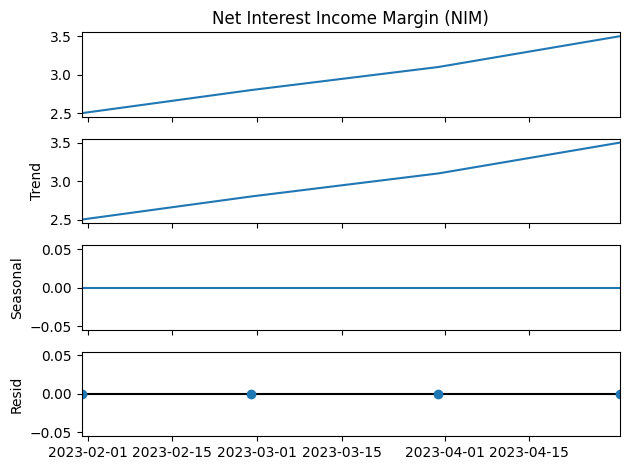

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


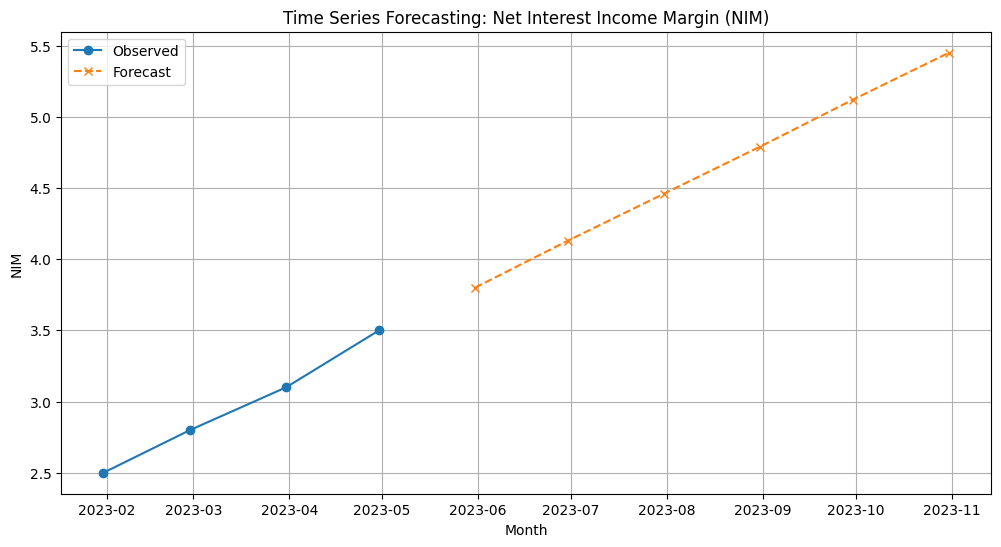


Holt-Winters Forecast:
2023-05-31    3.80
2023-06-30    4.13
2023-07-31    4.46
2023-08-31    4.79
2023-09-30    5.12
2023-10-31    5.45
Freq: ME, dtype: float64


<ipython-input-29-be82bc74ed5d>:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_forecast = pd.DataFrame({'Month': pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecast), freq='M'),


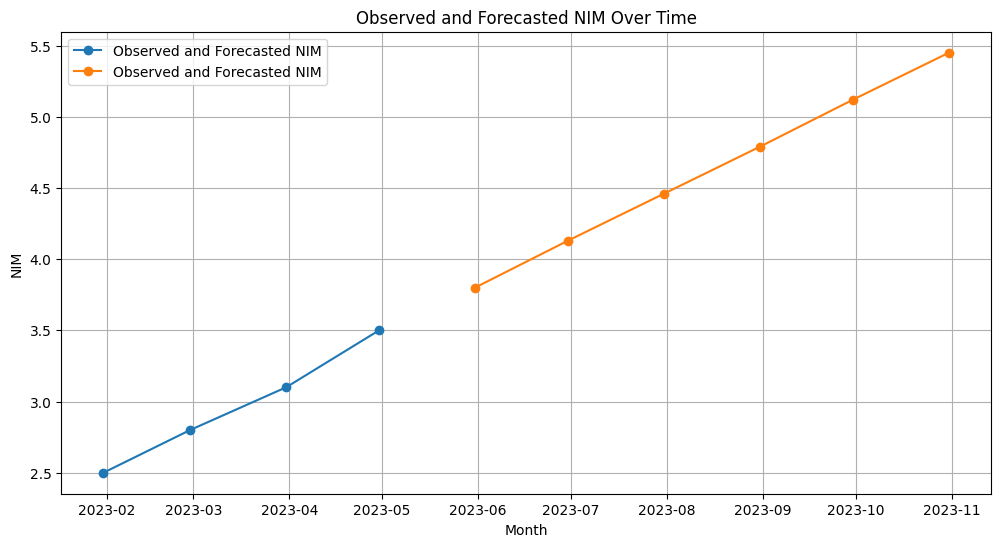

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Linear Regression Performance:
MSE: 0.0647, R^2: nan

Random Forest Regressor Performance:
MSE: 0.0004, R^2: nan

Feature Importances (Random Forest):
Consumer Confidence Index    0.221672
Interest Expense %           0.143034
Interest Rate %              0.123839
Interest Income %            0.107740
Unemployment Rate %          0.104025
GDP Growth %                 0.095975
Credit Loss % (CLR)          0.074303
Exchange Rate (USD)          0.066873
Inflation %                  0.062539
dtype: float64


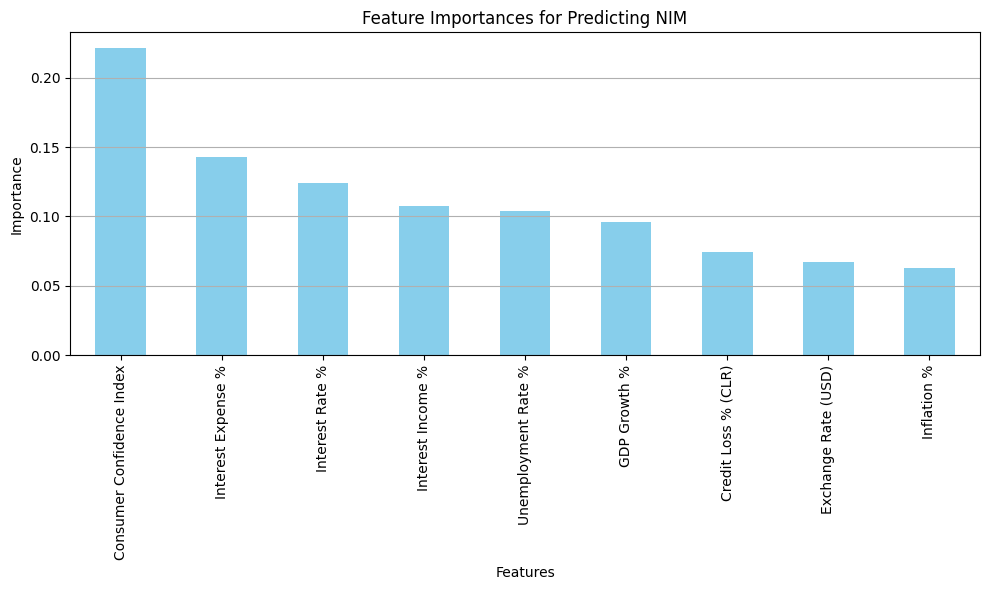

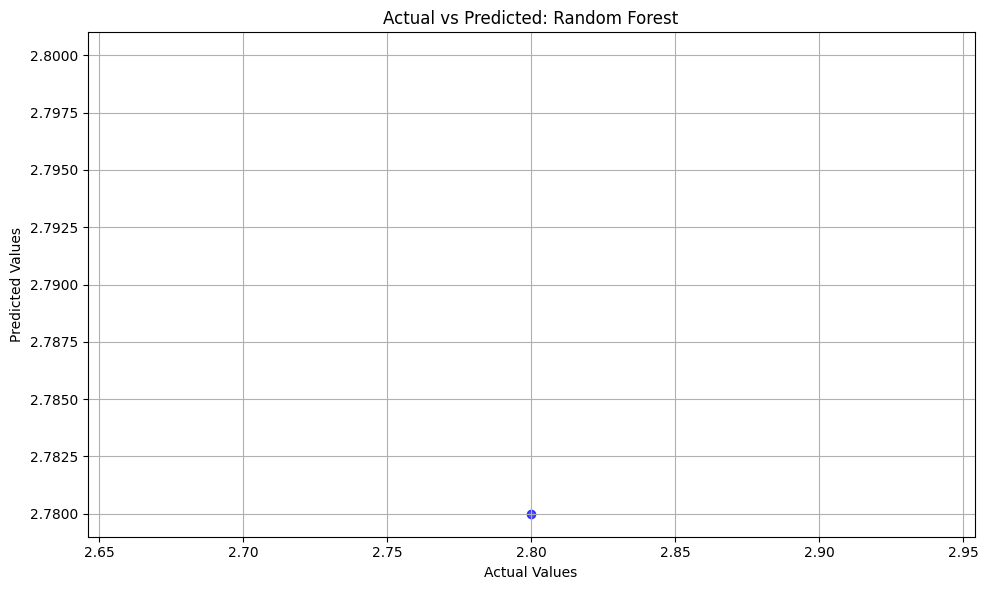

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# Example Data: Simulating financial metrics and external factors for analysis
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Interest Income %': [4.5, 5.0, 5.5, 6.0],
    'Interest Expense %': [2.0, 2.2, 2.4, 2.5],
    'Net Interest Income Margin (NIM)': [2.5, 2.8, 3.1, 3.5],
    'Credit Loss % (CLR)': [0.5, 0.6, 0.7, 0.8],
    'Risk Adjusted Interest Income (RAII)': [2.0, 2.2, 2.4, 2.7],
    'Non-Interest Revenue % (NIR)': [1.5, 1.7, 1.9, 2.0],
    'Operating Cost % (Opex)': [1.8, 1.9, 2.0, 2.1],
    'Profit Before Tax % (PBT)': [1.2, 1.3, 1.4, 1.6],
    'Tax %': [0.3, 0.4, 0.5, 0.6],
    'Profit After Tax % (PAT) (RoA)': [0.9, 0.9, 0.9, 1.0],
    'Equity Funding %': [50, 55, 60, 65],
    'Return on Equity (RoE)': [10, 12, 14, 15],
    'Hedging Cost': [0.2, 0.25, 0.3, 0.35],
    'Return on Equity (RoE in USD)': [1000, 1200, 1400, 1500],
    'Gross Interest Expense': [20, 22, 24, 25],
    'Liquidity Coverage Ratio (LCR)': [150, 160, 170, 180],
    'Cost-to-Income Ratio': [45, 46, 47, 48],
    'Leverage Ratio': [8.0, 8.5, 9.0, 9.5],
    # External factors
    'GDP Growth %': [2.1, 2.3, 2.4, 2.5],
    'Inflation %': [1.8, 1.9, 2.0, 2.1],
    'Unemployment Rate %': [4.0, 4.1, 4.2, 4.3],
    'Exchange Rate (USD)': [100, 102, 101, 103],
    'Interest Rate %': [1.5, 1.6, 1.7, 1.8],
    'Consumer Confidence Index': [98, 99, 97, 96]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

# Time Series Forecasting for 'Net Interest Income Margin (NIM)'
time_series_data = df['Net Interest Income Margin (NIM)']

# Decompose the time series
decomposition = seasonal_decompose(time_series_data, model='additive', period=1)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Apply Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(time_series_data, seasonal=None, trend='additive', seasonal_periods=1).fit()
forecast = hw_model.forecast(steps=6)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Observed', marker='o')
plt.plot(forecast, label='Forecast', marker='x', linestyle='--')
plt.title('Time Series Forecasting: Net Interest Income Margin (NIM)')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend()
plt.grid()
plt.show()

# Forecast Summary
print("\nHolt-Winters Forecast:")
print(forecast)

# Add forecasted values to DataFrame for visualization
df_forecast = pd.DataFrame({'Month': pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecast), freq='M'),
                            'Forecasted NIM': forecast.values})
df_forecast.set_index('Month', inplace=True)

# Combine original and forecasted data
combined_data = pd.concat([df[['Net Interest Income Margin (NIM)']], df_forecast], axis=0)

# Visualize combined data
plt.figure(figsize=(12, 6))
plt.plot(combined_data, marker='o', linestyle='-', label='Observed and Forecasted NIM')
plt.title('Observed and Forecasted NIM Over Time')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend()
plt.grid()
plt.show()

# Predictive Analysis: Forecasting Metrics (e.g., 'Net Interest Income Margin (NIM)')
# Define features (X) and target (y)
target = 'Net Interest Income Margin (NIM)'
features = ['Interest Income %', 'Interest Expense %', 'Credit Loss % (CLR)',
            'GDP Growth %', 'Inflation %', 'Unemployment Rate %',
            'Exchange Rate (USD)', 'Interest Rate %', 'Consumer Confidence Index']

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nLinear Regression Performance:")
print(f"MSE: {linear_mse:.4f}, R^2: {linear_r2:.4f}")

print("\nRandom Forest Regressor Performance:")
print(f"MSE: {rf_mse:.4f}, R^2: {rf_r2:.4f}")

# Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importances (Random Forest):")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances for Predicting NIM')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_preds, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted: Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()


<ipython-input-31-77c38d637710>:44: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')


<Figure size 1200x800 with 0 Axes>

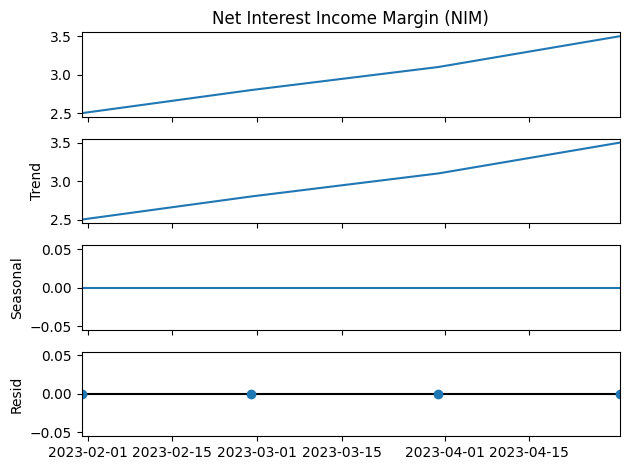

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


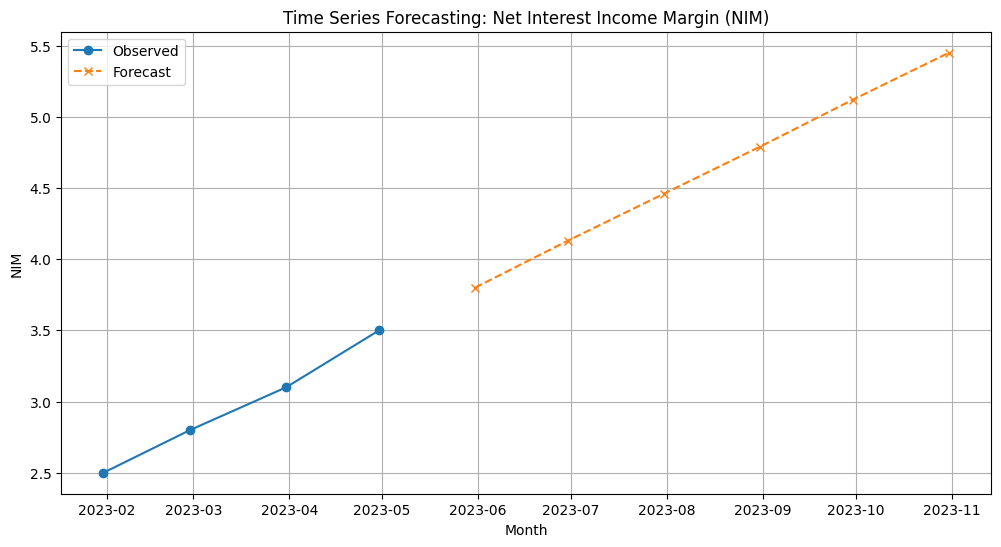


Holt-Winters Forecast:
2023-05-31    3.80
2023-06-30    4.13
2023-07-31    4.46
2023-08-31    4.79
2023-09-30    5.12
2023-10-31    5.45
Freq: ME, dtype: float64


<ipython-input-31-77c38d637710>:76: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_forecast = pd.DataFrame({'Month': pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecast), freq='M'),


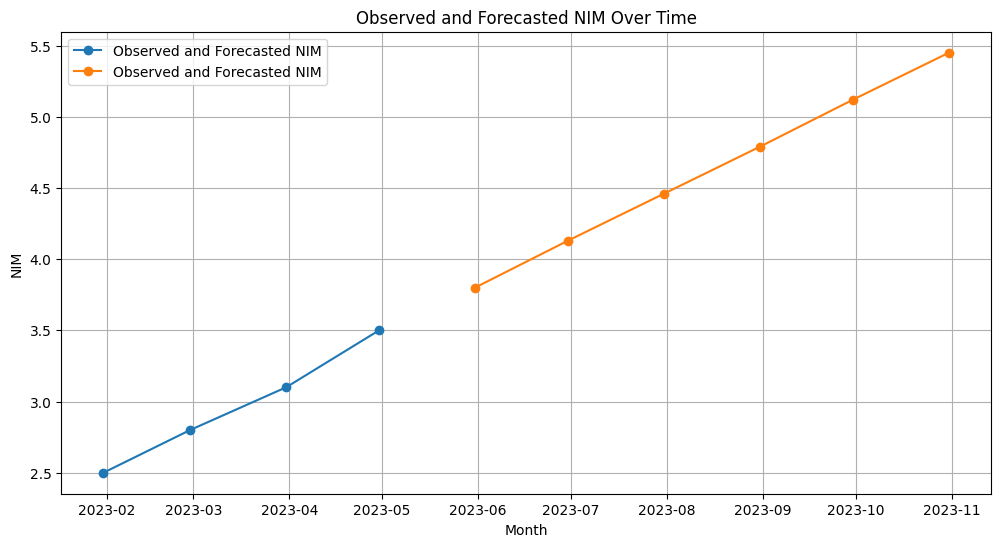

<Figure size 1200x600 with 0 Axes>

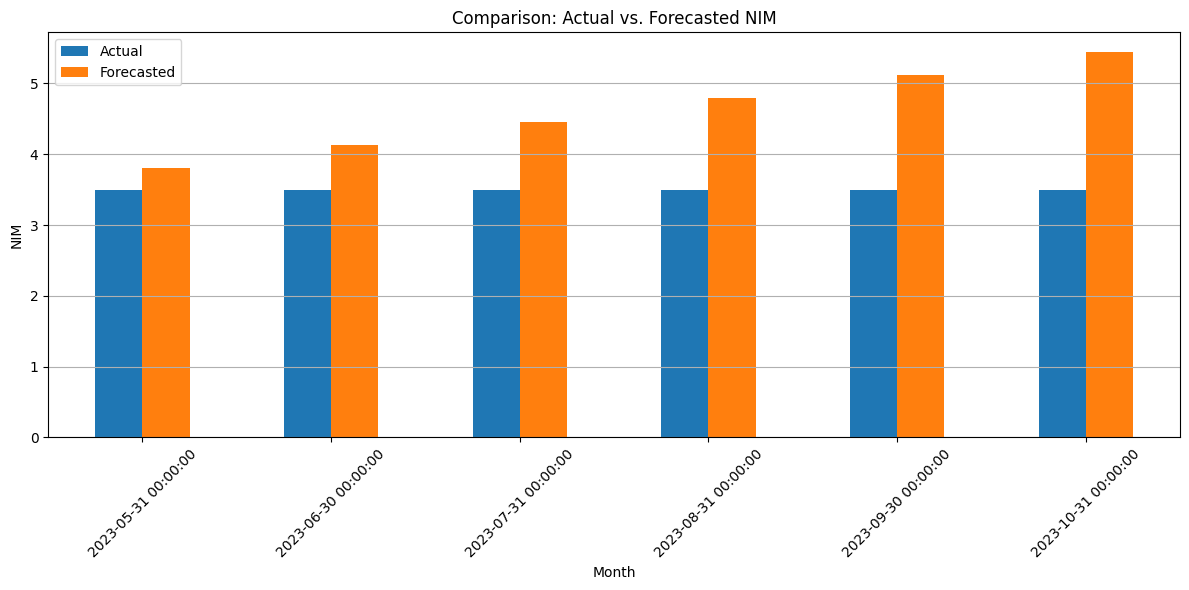


Forecast Accuracy Metrics:
Mean Absolute Error (MAE): 1.1250
Mean Absolute Percentage Error (MAPE): 32.14%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

# Example Data: Simulating financial metrics and external factors for analysis
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Interest Income %': [4.5, 5.0, 5.5, 6.0],
    'Interest Expense %': [2.0, 2.2, 2.4, 2.5],
    'Net Interest Income Margin (NIM)': [2.5, 2.8, 3.1, 3.5],
    'Credit Loss % (CLR)': [0.5, 0.6, 0.7, 0.8],
    'Risk Adjusted Interest Income (RAII)': [2.0, 2.2, 2.4, 2.7],
    'Non-Interest Revenue % (NIR)': [1.5, 1.7, 1.9, 2.0],
    'Operating Cost % (Opex)': [1.8, 1.9, 2.0, 2.1],
    'Profit Before Tax % (PBT)': [1.2, 1.3, 1.4, 1.6],
    'Tax %': [0.3, 0.4, 0.5, 0.6],
    'Profit After Tax % (PAT) (RoA)': [0.9, 0.9, 0.9, 1.0],
    'Equity Funding %': [50, 55, 60, 65],
    'Return on Equity (RoE)': [10, 12, 14, 15],
    'Hedging Cost': [0.2, 0.25, 0.3, 0.35],
    'Return on Equity (RoE in USD)': [1000, 1200, 1400, 1500],
    'Gross Interest Expense': [20, 22, 24, 25],
    'Liquidity Coverage Ratio (LCR)': [150, 160, 170, 180],
    'Cost-to-Income Ratio': [45, 46, 47, 48],
    'Leverage Ratio': [8.0, 8.5, 9.0, 9.5],
    # External factors
    'GDP Growth %': [2.1, 2.3, 2.4, 2.5],
    'Inflation %': [1.8, 1.9, 2.0, 2.1],
    'Unemployment Rate %': [4.0, 4.1, 4.2, 4.3],
    'Exchange Rate (USD)': [100, 102, 101, 103],
    'Interest Rate %': [1.5, 1.6, 1.7, 1.8],
    'Consumer Confidence Index': [98, 99, 97, 96]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

# Time Series Forecasting for 'Net Interest Income Margin (NIM)'
time_series_data = df['Net Interest Income Margin (NIM)']

# Decompose the time series
decomposition = seasonal_decompose(time_series_data, model='additive', period=1)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Apply Holt-Winters Exponential Smoothing
hw_model = ExponentialSmoothing(time_series_data, seasonal=None, trend='additive', seasonal_periods=1).fit()
forecast = hw_model.forecast(steps=6)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Observed', marker='o')
plt.plot(forecast, label='Forecast', marker='x', linestyle='--')
plt.title('Time Series Forecasting: Net Interest Income Margin (NIM)')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend()
plt.grid()
plt.show()

# Forecast Summary
print("\nHolt-Winters Forecast:")
print(forecast)

# Add forecasted values to DataFrame for visualization
df_forecast = pd.DataFrame({'Month': pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(forecast), freq='M'),
                            'Forecasted NIM': forecast.values})
df_forecast.set_index('Month', inplace=True)

# Combine original and forecasted data
combined_data = pd.concat([df[['Net Interest Income Margin (NIM)']], df_forecast], axis=0)

# Visualize combined data
plt.figure(figsize=(12, 6))
plt.plot(combined_data, marker='o', linestyle='-', label='Observed and Forecasted NIM')
plt.title('Observed and Forecasted NIM Over Time')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend()
plt.grid()
plt.show()

# Compare Actual vs. Forecasted Metrics
actual_data = df['Net Interest Income Margin (NIM)']
forecasted_data = forecast

# Align the indices of the actual and forecasted data
# This will ensure that both series have the same index length
actual_data = actual_data.reindex(forecast.index, method='ffill')

# Now create the comparison dataframe
comparison_df = pd.DataFrame({
    'Actual': actual_data.values,
    'Forecasted': forecasted_data.values
}, index=forecast.index)  # Use the index from 'forecast'

# Plot Actual vs. Forecasted Metrics
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', figsize=(12, 6), rot=45)
plt.title('Comparison: Actual vs. Forecasted NIM')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend(['Actual', 'Forecasted'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Calculate Forecast Accuracy
difference = comparison_df['Actual'] - comparison_df['Forecasted']
mae = difference.abs().mean()
mape = (difference.abs() / comparison_df['Actual']).mean() * 100
print("\nForecast Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


<ipython-input-35-7fffac8de0c5>:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')


<Figure size 1200x800 with 0 Axes>

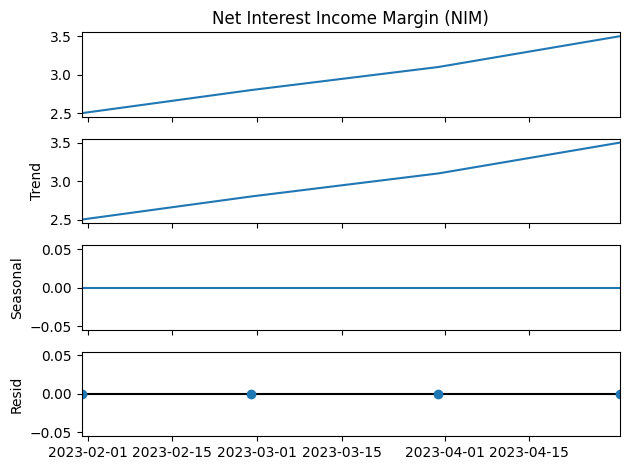


ADF Test Statistic: 1.7320508075688965
p-value: 0.9982042849867909
The series is not stationary. Differencing is required.


<Figure size 1200x600 with 0 Axes>

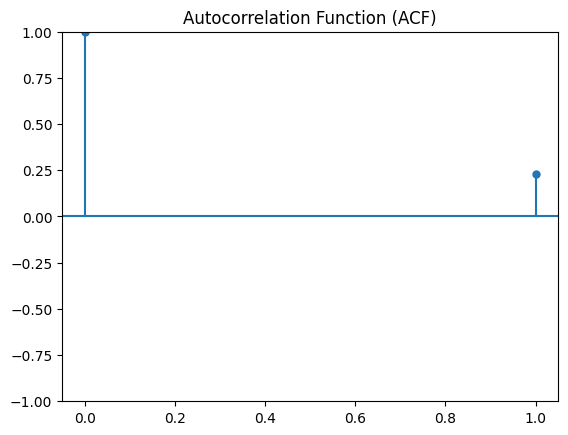

<Figure size 1200x600 with 0 Axes>

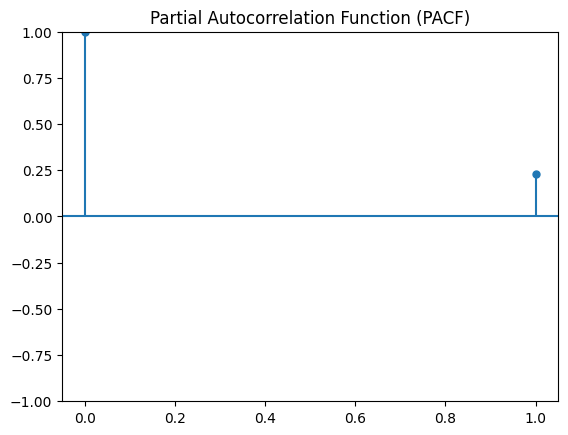

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: UserWarning: E

                                      SARIMAX Results                                       
Dep. Variable:     Net Interest Income Margin (NIM)   No. Observations:                    4
Model:                               ARIMA(1, 1, 1)   Log Likelihood                   2.100
Date:                              Sun, 29 Dec 2024   AIC                              1.801
Time:                                      16:12:30   BIC                             -0.903
Sample:                                  01-31-2023   HQIC                            -3.635
                                       - 04-30-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9836     87.665      0.011      0.991    -170.837     172.805
ma.L1         -0.10

<ipython-input-35-7fffac8de0c5>:90: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='M'),


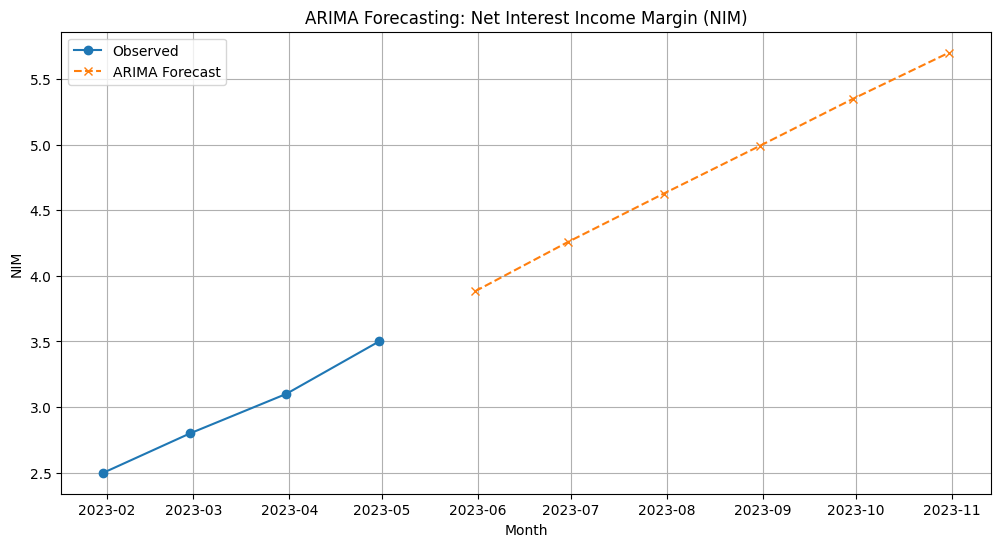

<ipython-input-35-7fffac8de0c5>:100: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  arima_forecast_df = pd.DataFrame({'Month': pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(arima_forecast), freq='M'),


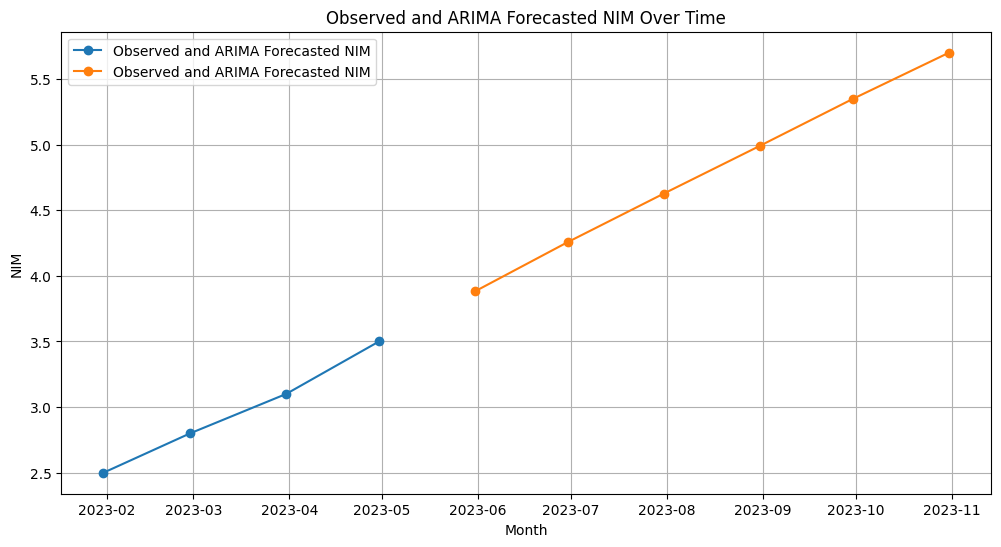

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)



Linear Regression Performance:
MSE: 0.0647, R^2: nan

Random Forest Regressor Performance:
MSE: 0.0004, R^2: nan

Feature Importances (Random Forest):
Consumer Confidence Index    0.221672
Interest Expense %           0.143034
Interest Rate %              0.123839
Interest Income %            0.107740
Unemployment Rate %          0.104025
GDP Growth %                 0.095975
Credit Loss % (CLR)          0.074303
Exchange Rate (USD)          0.066873
Inflation %                  0.062539
dtype: float64


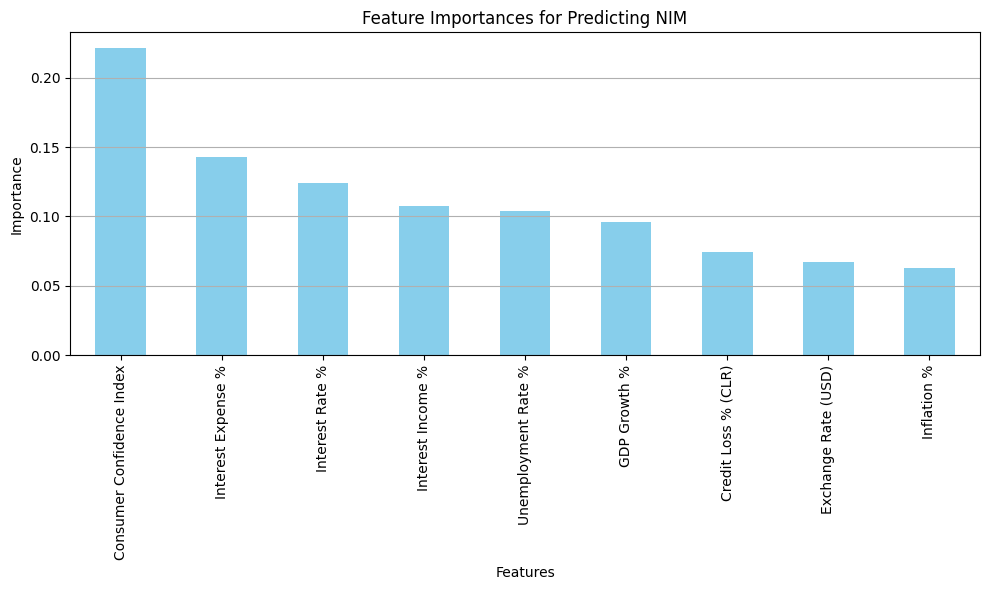

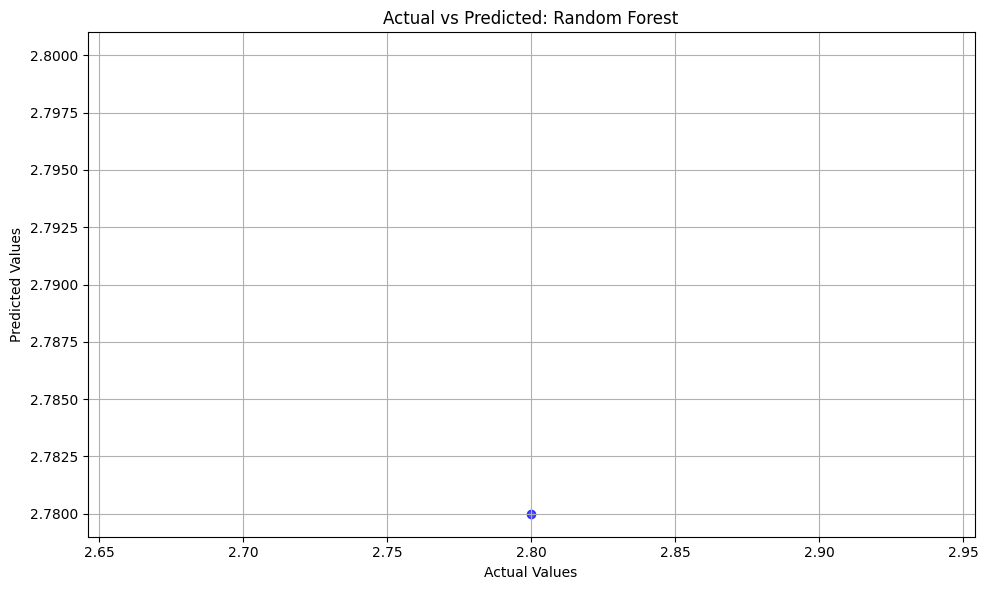

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Example Data: Simulating financial metrics and external factors for analysis
data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr'],
    'Interest Income %': [4.5, 5.0, 5.5, 6.0],
    'Interest Expense %': [2.0, 2.2, 2.4, 2.5],
    'Net Interest Income Margin (NIM)': [2.5, 2.8, 3.1, 3.5],
    'Credit Loss % (CLR)': [0.5, 0.6, 0.7, 0.8],
    'Risk Adjusted Interest Income (RAII)': [2.0, 2.2, 2.4, 2.7],
    'Non-Interest Revenue % (NIR)': [1.5, 1.7, 1.9, 2.0],
    'Operating Cost % (Opex)': [1.8, 1.9, 2.0, 2.1],
    'Profit Before Tax % (PBT)': [1.2, 1.3, 1.4, 1.6],
    'Tax %': [0.3, 0.4, 0.5, 0.6],
    'Profit After Tax % (PAT) (RoA)': [0.9, 0.9, 0.9, 1.0],
    'Equity Funding %': [50, 55, 60, 65],
    'Return on Equity (RoE)': [10, 12, 14, 15],
    'Hedging Cost': [0.2, 0.25, 0.3, 0.35],
    'Return on Equity (RoE in USD)': [1000, 1200, 1400, 1500],
    'Gross Interest Expense': [20, 22, 24, 25],
    'Liquidity Coverage Ratio (LCR)': [150, 160, 170, 180],
    'Cost-to-Income Ratio': [45, 46, 47, 48],
    'Leverage Ratio': [8.0, 8.5, 9.0, 9.5],
    # External factors
    'GDP Growth %': [2.1, 2.3, 2.4, 2.5],
    'Inflation %': [1.8, 1.9, 2.0, 2.1],
    'Unemployment Rate %': [4.0, 4.1, 4.2, 4.3],
    'Exchange Rate (USD)': [100, 102, 101, 103],
    'Interest Rate %': [1.5, 1.6, 1.7, 1.8],
    'Consumer Confidence Index': [98, 99, 97, 96]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')
df.set_index('Month', inplace=True)

# Time Series Forecasting for 'Net Interest Income Margin (NIM)'
time_series_data = df['Net Interest Income Margin (NIM)']

# Decompose the time series
decomposition = seasonal_decompose(time_series_data, model='additive', period=1)
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

# Apply ARIMA Model
# Test for stationarity
adf_test = adfuller(time_series_data)
print("\nADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary. Differencing is required.")

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plot_acf(time_series_data, lags=1)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(time_series_data, lags=1)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Fit ARIMA Model
arima_model = ARIMA(time_series_data, order=(1, 1, 1)).fit()
print(arima_model.summary())

# Forecast with ARIMA
arima_forecast = arima_model.forecast(steps=6)

# Plot the original data and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Observed', marker='o')
plt.plot(pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=6, freq='M'),
         arima_forecast, label='ARIMA Forecast', marker='x', linestyle='--')
plt.title('ARIMA Forecasting: Net Interest Income Margin (NIM)')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend()
plt.grid()
plt.show()

# Combine ARIMA Forecast with Actual Data
arima_forecast_df = pd.DataFrame({'Month': pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=len(arima_forecast), freq='M'),
                                  'ARIMA Forecasted NIM': arima_forecast.values})
arima_forecast_df.set_index('Month', inplace=True)
combined_arima_data = pd.concat([df[['Net Interest Income Margin (NIM)']], arima_forecast_df], axis=0)

# Visualize Combined Data
plt.figure(figsize=(12, 6))
plt.plot(combined_arima_data, marker='o', linestyle='-', label='Observed and ARIMA Forecasted NIM')
plt.title('Observed and ARIMA Forecasted NIM Over Time')
plt.xlabel('Month')
plt.ylabel('NIM')
plt.legend()
plt.grid()
plt.show()

# Predictive Analysis: Forecasting Metrics (e.g., 'Net Interest Income Margin (NIM)')
# Define features (X) and target (y)
target = 'Net Interest Income Margin (NIM)'
features = ['Interest Income %', 'Interest Expense %', 'Credit Loss % (CLR)',
            'GDP Growth %', 'Inflation %', 'Unemployment Rate %',
            'Exchange Rate (USD)', 'Interest Rate %', 'Consumer Confidence Index']

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predictions
linear_preds = linear_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Evaluate models
linear_mse = mean_squared_error(y_test, linear_preds)
linear_r2 = r2_score(y_test, linear_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\nLinear Regression Performance:")
print(f"MSE: {linear_mse:.4f}, R^2: {linear_r2:.4f}")

print("\nRandom Forest Regressor Performance:")
print(f"MSE: {rf_mse:.4f}, R^2: {rf_r2:.4f}")

# Feature Importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importances (Random Forest):")
print(feature_importances)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importances for Predicting NIM')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_preds, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs Predicted: Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.tight_layout()
plt.show()